# Clustering

Clustering o agrupamiento es una estrategia de aprendizaje no supervisado en el cual se agrupan elementos que presentan características **similares**.

### Ejemplo:

Tenemos los siguientes serer vivos:
* vaca
* calamar
* perro
* sepia
* petunia
* ornitorrinco
* abeto
* naranjo

Queremos clasificarlos en **3 grupos** basándonos en sus características. Una posible clasificación sería:
* Grupo 1: vaca, perro, ornitorrinco
* Grupo 2: calamar, sepia
* Grupo 3: abeto, naranjo, petunia

Podemos hacer una clasificación jerárquica basada en similitudes:


![](img/organismos.png)

## Distancias

Antes de podes agrupar elementos por su similitud tenemos que definir la *similitud*. Para ello vamos a crear una media de la diferencia, de como de separados están dos elementos del grupo. Ejemplos de distancias:
* Distancia Euclídea: $L_2$=$\left \|  \vec{a}-\vec{b} \right \|_2 = \sqrt{\sum_i \left ( a_i-b_i \right )^2}$
* Distancia Manhattan: $L_1$=$\left \|  \vec{a}-\vec{b} \right \| =  \sum_i \left \| a_i-b_i \right \| $
* Distancia Minkowsky: $\left \|  \vec{a}-\vec{b} \right \|_p = \left ( \sum_i \mid a_i-b_i \mid^p \right )^\frac{1}{p}$
![](img/distancia.png)

Distancia con textos:
* Distancia Hamming: La distancia de hamming entre dos cadenas de igual longitud es el número de posiciones en el cual los simbolos son diferentes.
* Distancia Levenshtein: La distancia Levenshtein entre dos palabras es el mínimo número de ediciones de un solo caracter (inserción, eliminación o sustitución) para que las dos palabras sean iguales.

In [ ]:
case 

casa -> 1
hola -> 3


## Métodos de clustering

### Particionado

#### K-means

Se basa en centroides. El centroide o centro geométrico es el punto resultante de la media aritmética de la posición de todos los puntos.


```
1 - elige k centroides al azar
2 - asigna el elemento al centroide más cercano
3 - recalcular centroides
4 - Repetir desde 2 mientras los centroides se sigan actualizando.
```

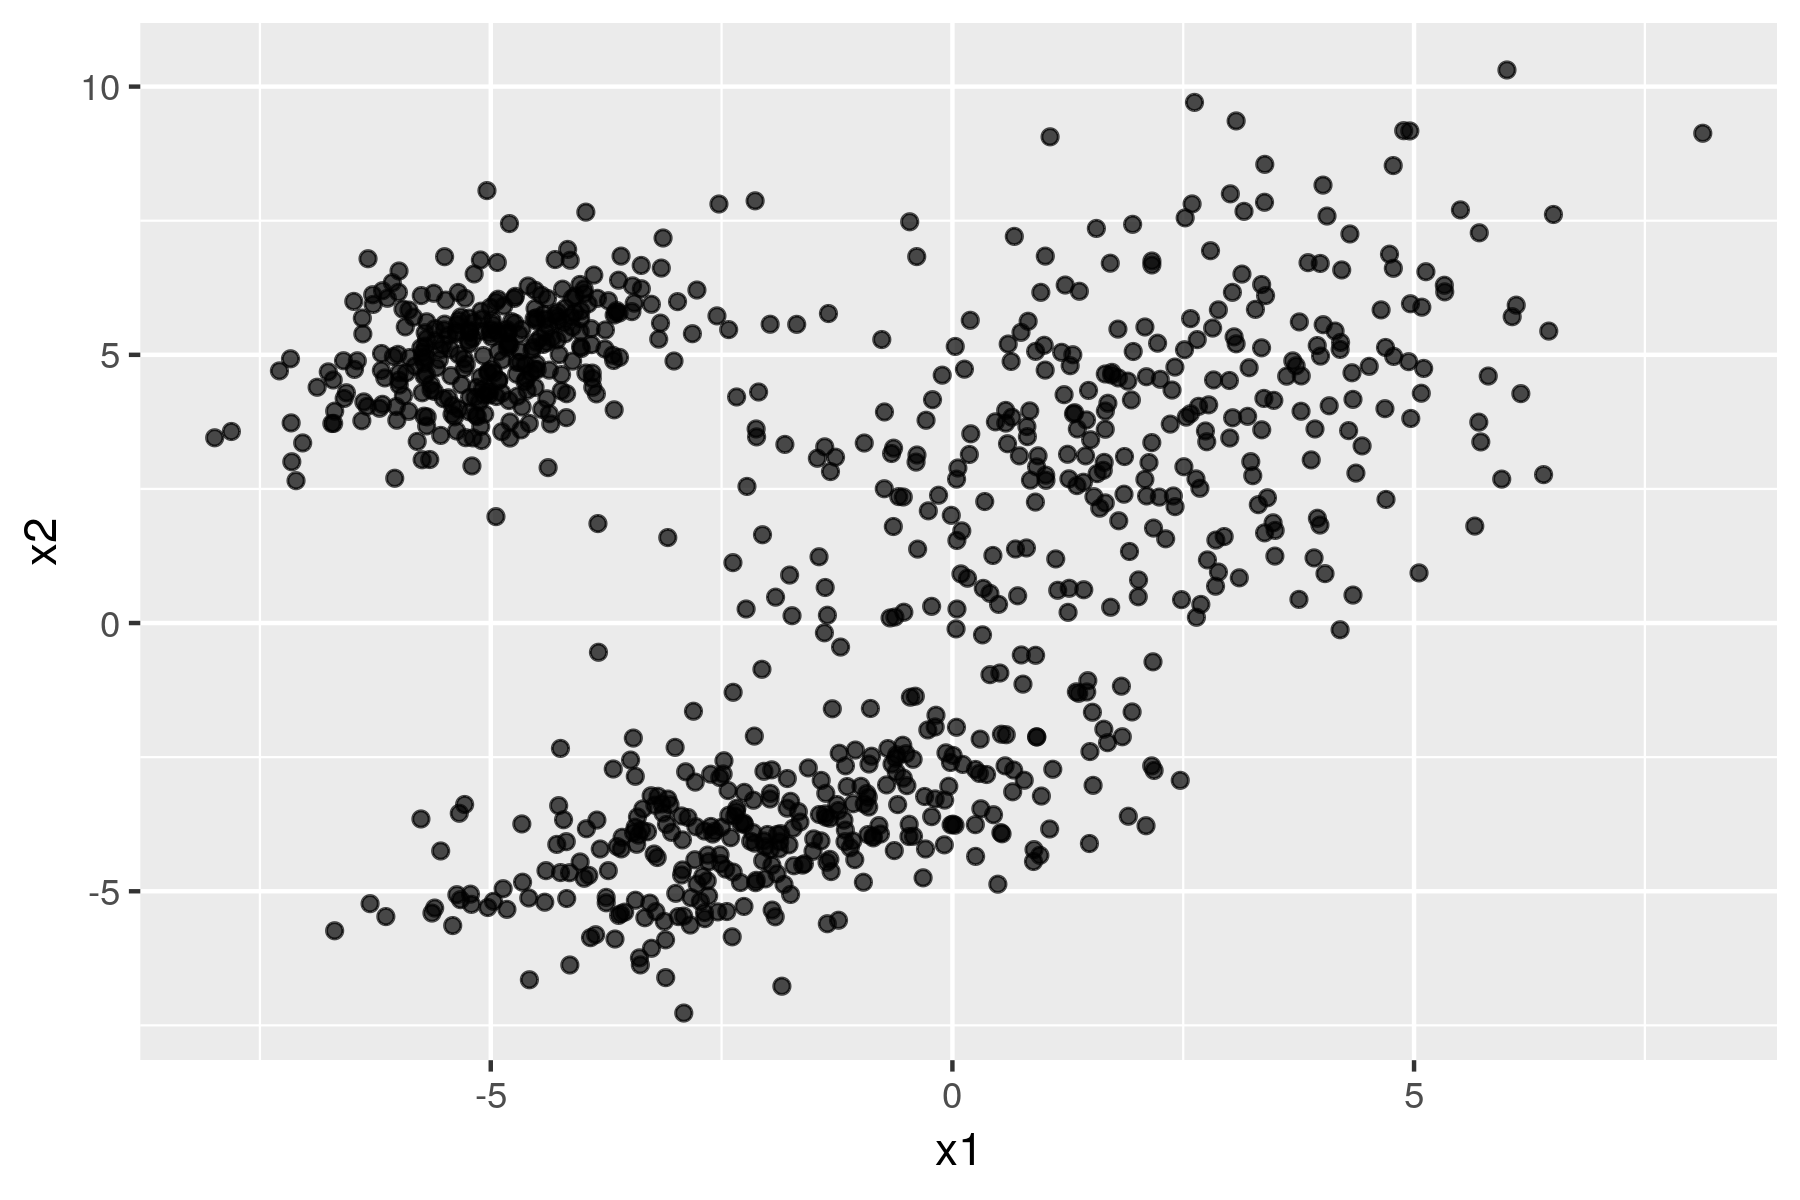

In [1]:
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 300)


N<-300
x1<-c(rnorm(N,mean=2,sd=2),rnorm(N,mean=-2,sd=2),rnorm(N,mean=-5,sd=1))
x2<-c(0.4*x1+c(rnorm(N,mean=3,sd=2),rnorm(N,mean=-3,sd=1),rnorm(N,mean=7,sd=1)))
df<-data.frame(x1,x2)

library(ggplot2)
ggplot(data=df, aes(x=x1,y=x2))+geom_point(alpha=0.7)

In [4]:
head(df)

x1         x2      
1 -0.7380135 2.503546
2  3.7784490 4.606621
3  1.6568624 3.952247
4  5.0842988 5.888108
5 -0.3936924 3.000287
6  4.1997344 5.100496

In [3]:
which(c(TRUE,FALSE,FALSE,FALSE,TRUE,TRUE))

[1] 1 5 6

x1        x2       
1 -4.825448  4.972459
2 -1.741918 -3.442691
3  2.525195  4.163559

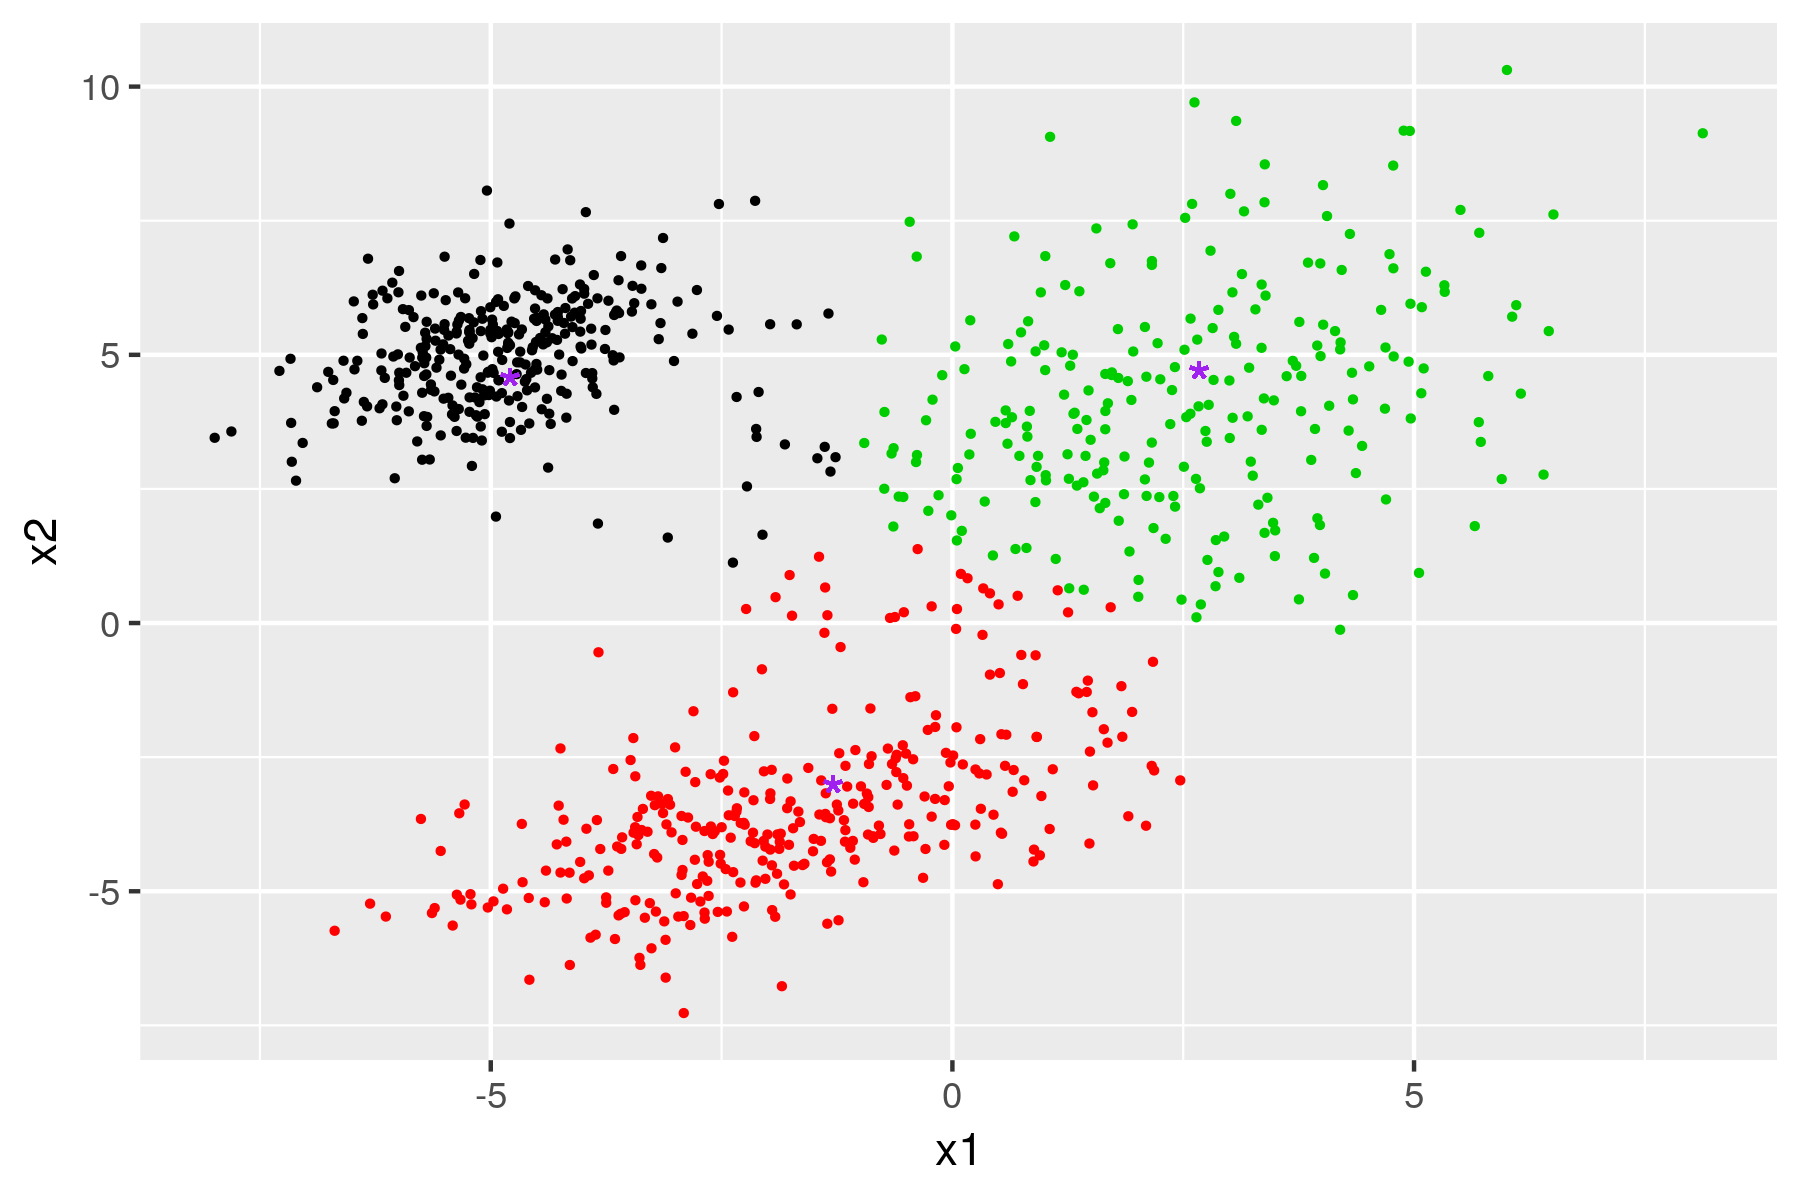

In [34]:
mydistance<-function(v1,v2){
        sqrt((v1[1]-v2[1])^2+(v1[2]-v2[2])^2)
}

assign_points_to_centroid<-function(mydata,centroids){        
    group<-rep(NA,nrow(mydata))
    for (i in 1:nrow(mydata)){
        distance_to_centroids<-rep(NA,nrow(centroids))
        for (j in 1:nrow(centroids)){
            distance_to_centroids[j]<-mydistance(mydata[i,],centroids[j,])
        }        
        group[i]<-which.min(distance_to_centroids)
    }   
    group
}

get_new_centroids<-function(mydata,group){
    k<-length(unique(group))
    centroids<-data.frame(x1=rep(NA,k),x2=rep(NA,k))
    for (i in 1:k){
        idx<-which(i == group)
        centroids[i,]<-colMeans(mydata[idx,])
    }
    centroids
}

plot_all<-function(mydata,centroids,group){
    mydata$group<-factor(group)
    mydata$centroidx1<-centroids$x1[group]
    mydata$centroidx2<-centroids$x2[group]
    ggplot(data=mydata,aes(x=x1,y=x2))+geom_point(color=group,size=0.5)+
        geom_point(aes(x=centroidx1,y=centroidx2),shape="*",size=5,color="purple")
}


#centroids<-data.frame(x1=c(1,2),x2=c(1,1))
#centroids<-data.frame(x1=c(-1,-2),x2=c(5,3))
#centroids<-data.frame(x1=c(1,2,3),x2=c(1,1,1))
#centroids
group<-assign_points_to_centroid(df,centroids)
plot_all(df,centroids,group)

centroids<-get_new_centroids(df,group)
centroids

Este algorimo lo implementa R:
```
kmeans(data.frame, k)
```

In [46]:
myclust<-kmeans(df,3)
print("Los centroides son")
myclust$centers
#myclust$cluster

[1] "Los centroides son"


x1        x2       
1  2.391414  3.986939
2 -4.858804  4.990609
3 -1.827525 -3.592115

In [47]:
myclust$centers[,"x1"]
myclust$centers[,"x2"]

1         2         3 
 2.391414 -4.858804 -1.827525

1         2         3 
 3.986939  4.990609 -3.592115

In [42]:
str(myclust)

List of 9
 $ cluster     : int [1:900] 1 1 1 1 1 1 1 1 1 1 ...
 $ centers     : num [1:3, 1:2] 2.39 -4.86 -1.83 3.99 4.99 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:3] "1" "2" "3"
  .. ..$ : chr [1:2] "x1" "x2"
 $ totss       : num 25954
 $ withinss    : num [1:3] 2102 745 1759
 $ tot.withinss: num 4605
 $ betweenss   : num 21349
 $ size        : int [1:3] 263 315 322
 $ iter        : int 3
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


In [48]:
myclust$cluster

[1] 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 2 3 1 1 1 3 1 1 3 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 3 1 1 1 1 1
[112] 1 1 1 1 1 3 1 1 2 1 2 1 2 1 1 1 1 3 1 3 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 3
[149] 1 3 1 3 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 3 1 2 1
[186] 1 1 1 1 1 3 1 1 2 3 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 2 1 1 1 1
[223] 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 3 3 1 1 1 2 1 1 1 1 1 1 3 1 1 1 1 1 1 1
[260] 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[297] 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[334] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[371] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[408] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[445] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[482] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[519] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[556] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[593] 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[630] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[667] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[704] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[741] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[778] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[815] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[852] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[889] 2 2 2 2 2 2 2 2 2 2 2 2

       x1                x2         group     centroidx1       centroidx2    
 Min.   :-7.9900   Min.   :-7.270   1:263   Min.   :-4.859   Min.   :-3.592  
 1st Qu.:-4.5237   1st Qu.:-3.034   2:315   1st Qu.:-4.859   1st Qu.:-3.592  
 Median :-2.1431   Median : 3.409   3:322   Median :-1.828   Median : 3.987  
 Mean   :-1.6556   Mean   : 1.627           Mean   :-1.462   Mean   : 2.271  
 3rd Qu.: 0.9125   3rd Qu.: 5.132           3rd Qu.: 2.391   3rd Qu.: 4.991  
 Max.   : 8.1270   Max.   :10.310           Max.   : 2.391   Max.   : 4.991  

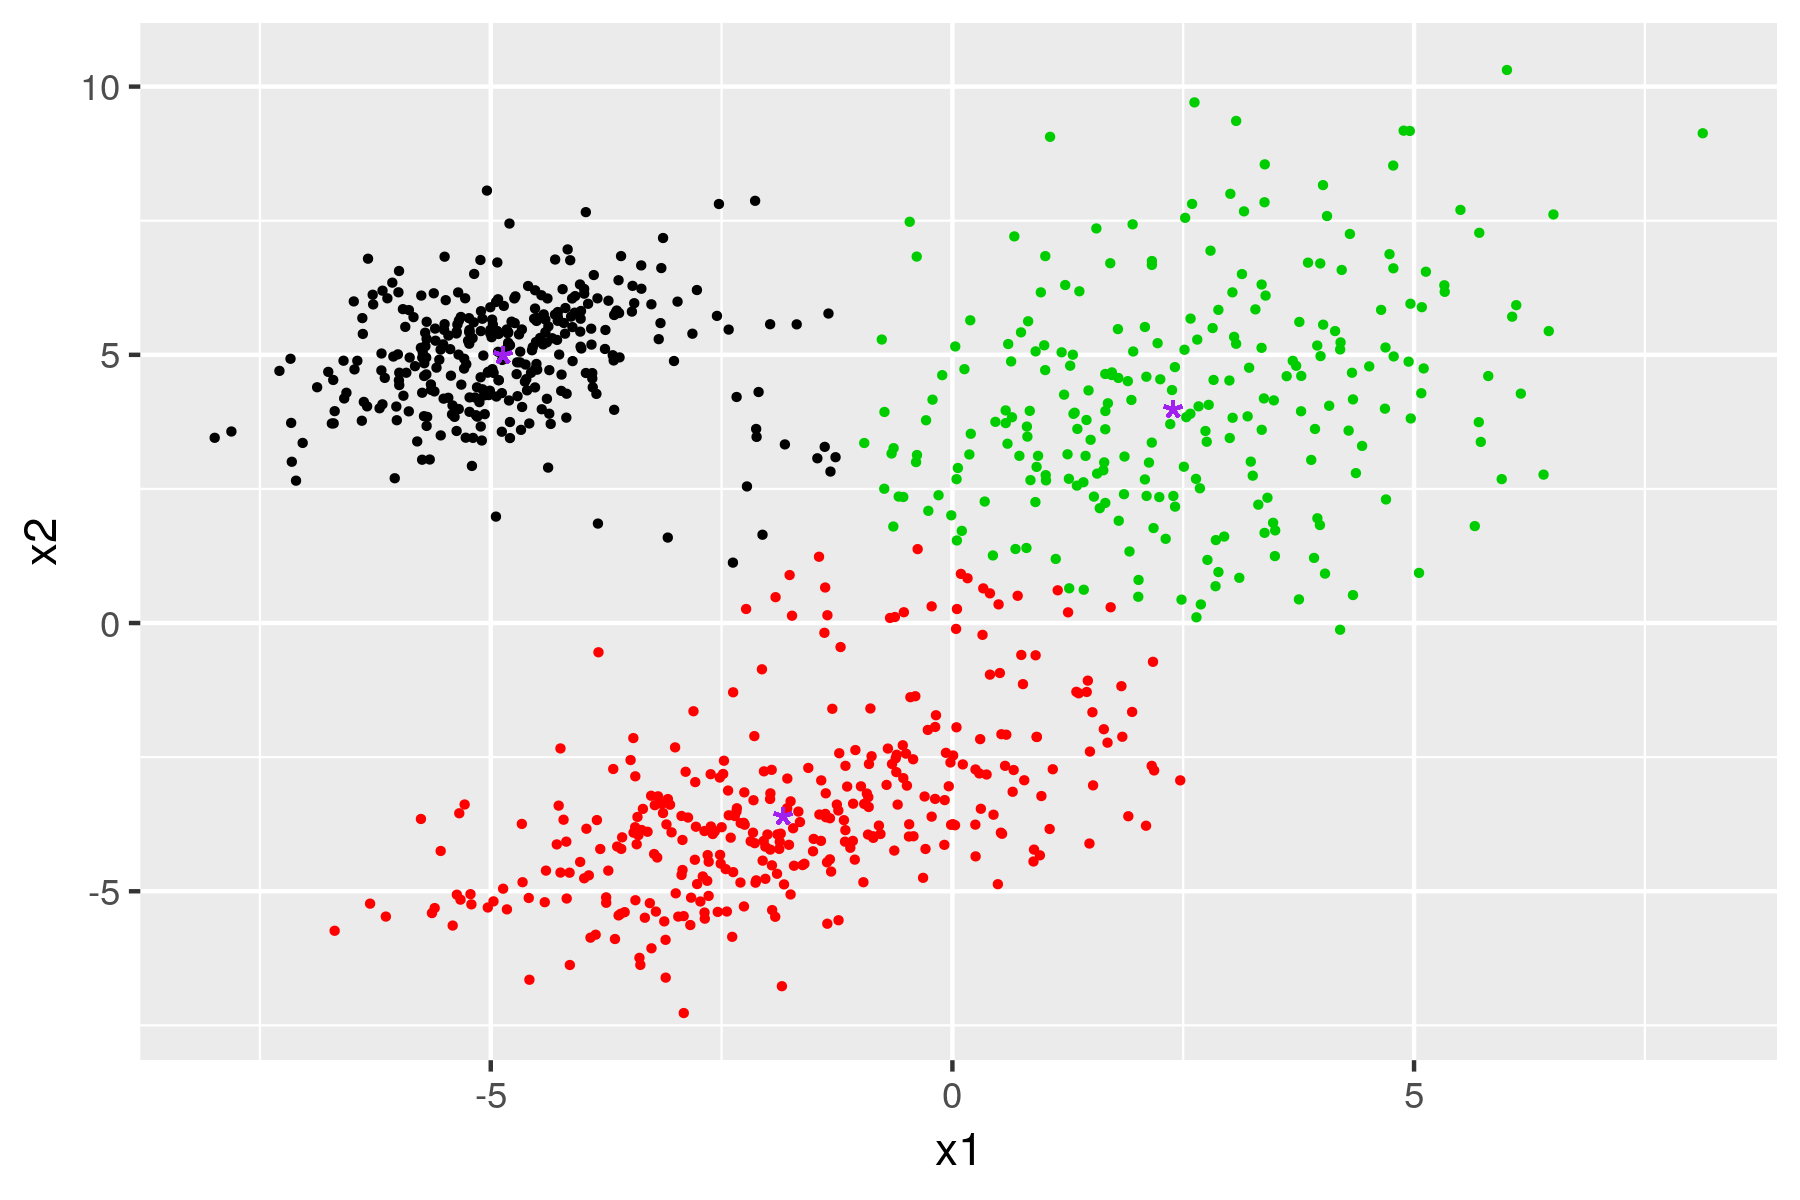

In [49]:
cl<-factor(myclust$cluster)

clustered<-cbind(df,group=cl)
clustered$centroidx1<-myclust$centers[group,"x1"]
clustered$centroidx2<-myclust$centers[group,"x2"]
ggplot(data=clustered,aes(x=x1,y=x2))+geom_point(color=group,size=0.5)+
    geom_point(aes(x=centroidx1,y=centroidx2),shape="*",size=5,color="purple")

summary(clustered)

### Medidas de la calidad de un cluster

Un cluster tiene que cumplir dos propiedades:
* Los elementos dentro de un mismo grupo tienen que estar lo más cerca posible entre si. La distancia media *intracluster* tiene que ser baja.
![](img/intragrupo.png)

* Los elementos de distintos grupos tienen que estar lo más lejos posibles uno de otro. La distancia media *intercluster* tiene que ser alta.
![](img/intergrupo.png)


Una forma de medirlo es con el SSE (Sum Square Errors).

* $SSE_{intra}$: Se define para cada grupo. Es la suma de distancias al cuadrado entre los puntos de un cluster y el centroide.
* $SSE_{inter}$: Se define para todos. Es la suma de las distancias al cuadrado entre los centroides de un cluster (ponderado al número de elementos del cluster) y el centroide de los centroides.
* $SSE_{total}$: $SSE_{inter}$+$\sum SSE_{intra}$

Una forma de medir la calidad de un cluster es el ratio:
\\[
\frac{SSE_{inter}}{SSE_{total}}
\\]
Cuanto más cercano a 1, mejor es la división entre clusters

In [50]:
paste("SSE intra:", paste(round(myclust$withinss),collapse=", "))
paste("SSE inter:", myclust$betweenss)
paste("SSE total:", myclust$totss)
paste("SSE total:", sum(myclust$withinss)+myclust$betweenss)

[1] "SSE intra: 2102, 745, 1759"

[1] "SSE inter: 21348.6883832445"

[1] "SSE total: 25954.1550519888"

[1] "SSE total: 25954.1550519888"

In [51]:
sse_per_cluser<-function(mydata_all,group,centroids){
    ssq<-rep(NA,nrow(centroids))
    for (k in 1:nrow(centroids)){
        mydata<-mydata_all[group==k,]
        h<-0
        for (i in 1:nrow(mydata)){            
            h<-h+sum((mydata[i,]-centroids[k,])^2)
        }        
        ssq[k]<-h
    }
    ssq
}
sse_per_cluser(df,group,centroids)
sse_per_cluser(df,myclust$cluster,myclust$centers)

[1]  793.599 2037.684 1851.191

[1] 2101.5881  745.3352 1758.5433

In [52]:
sse_betweeness<-function(group,centroids){
    sum((centroids[group,1]-mean(centroids[group,1]))^2)+
    sum((centroids[group,2]-mean(centroids[group,2]))^2)
}
sse_betweeness(group,centroids)
sse_betweeness(myclust$cluster,myclust$centers)

[1] 21271.68

[1] 21348.69

### Determinando el número óptimo de clusters para k-means

No existe una regla fija para determinar el número de grupos. Podemos pintar como evoluciona el error cuadrádico y cuando deje de mejorar rápidamente establecer como el número de clusters.

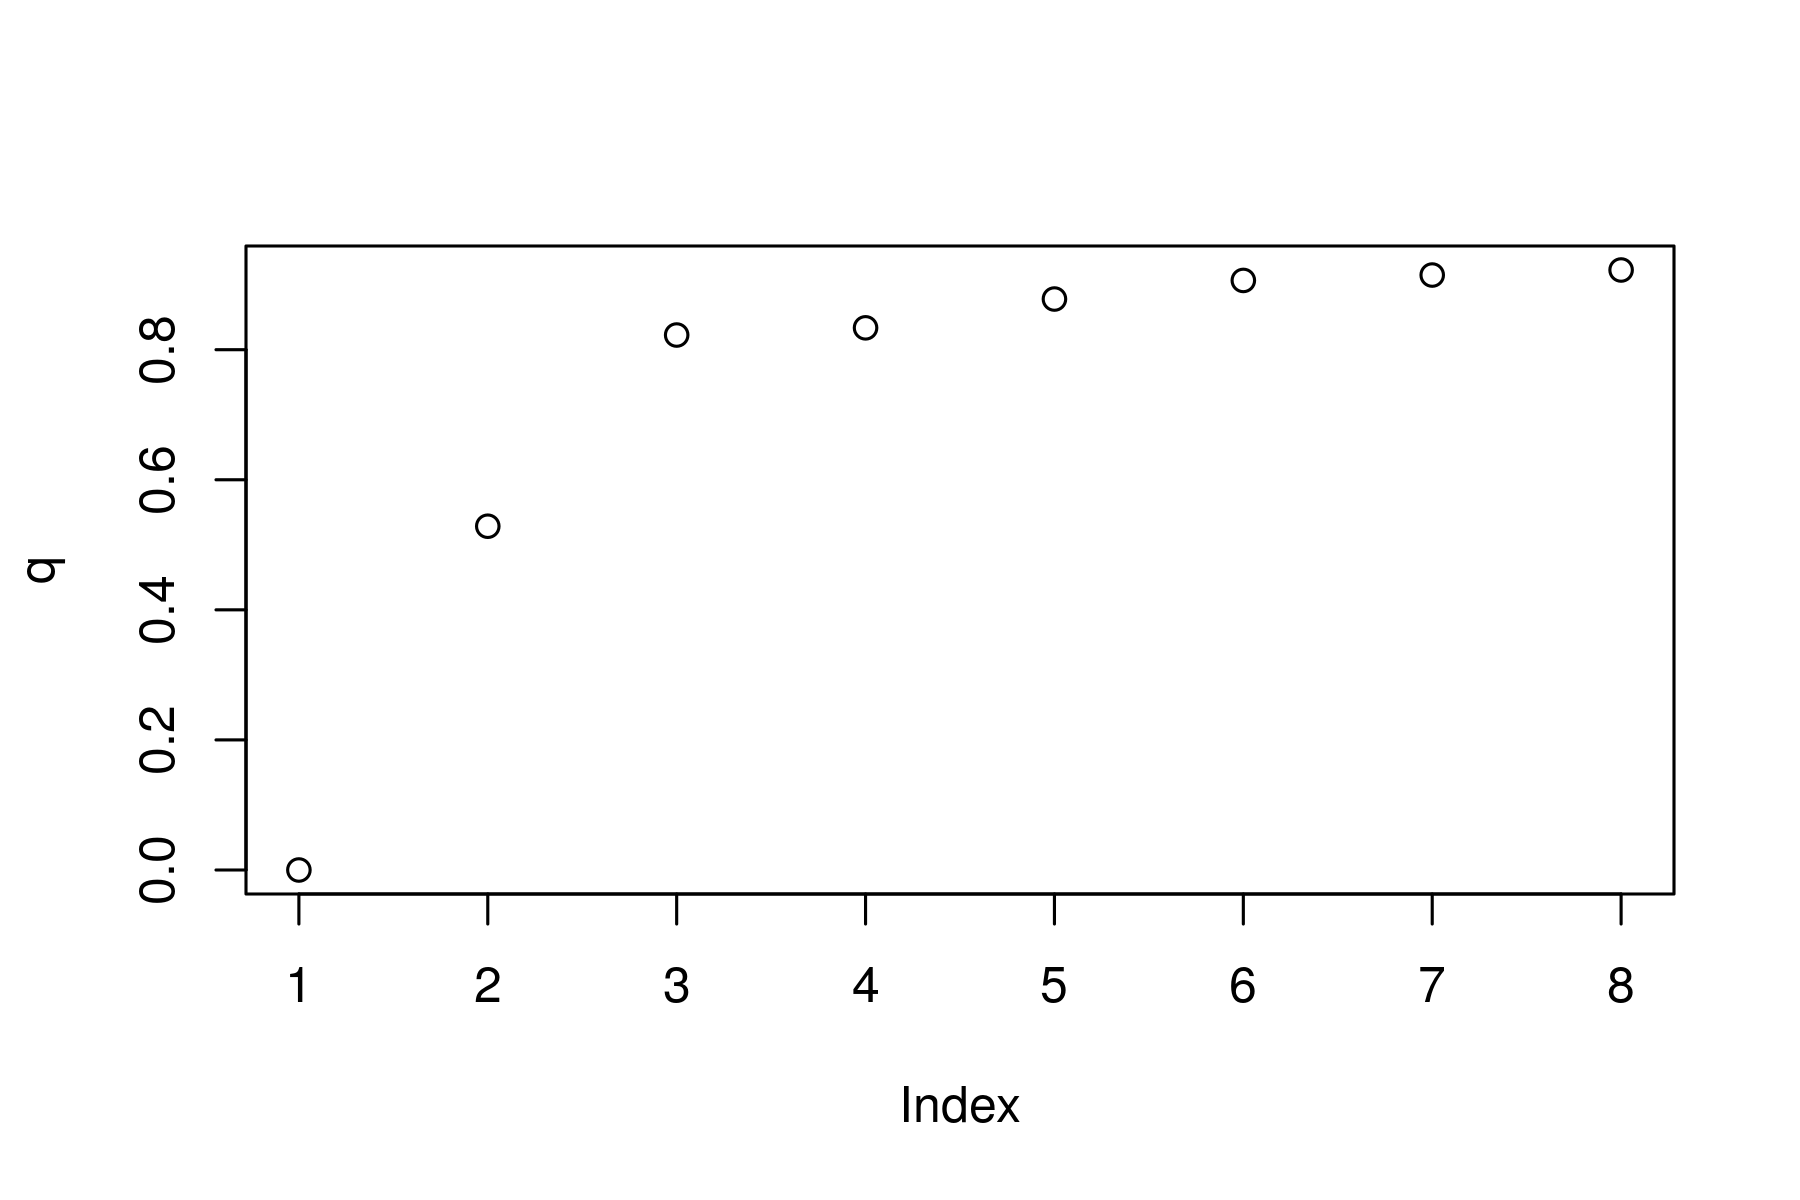

In [53]:
q<-c()
for (k in 1:8){
    myclust<-kmeans(df,k)
    q[k]<-myclust$betweenss/myclust$totss
}
plot(q)

Otra forma es mirando $\sum SSE_{intra}$:

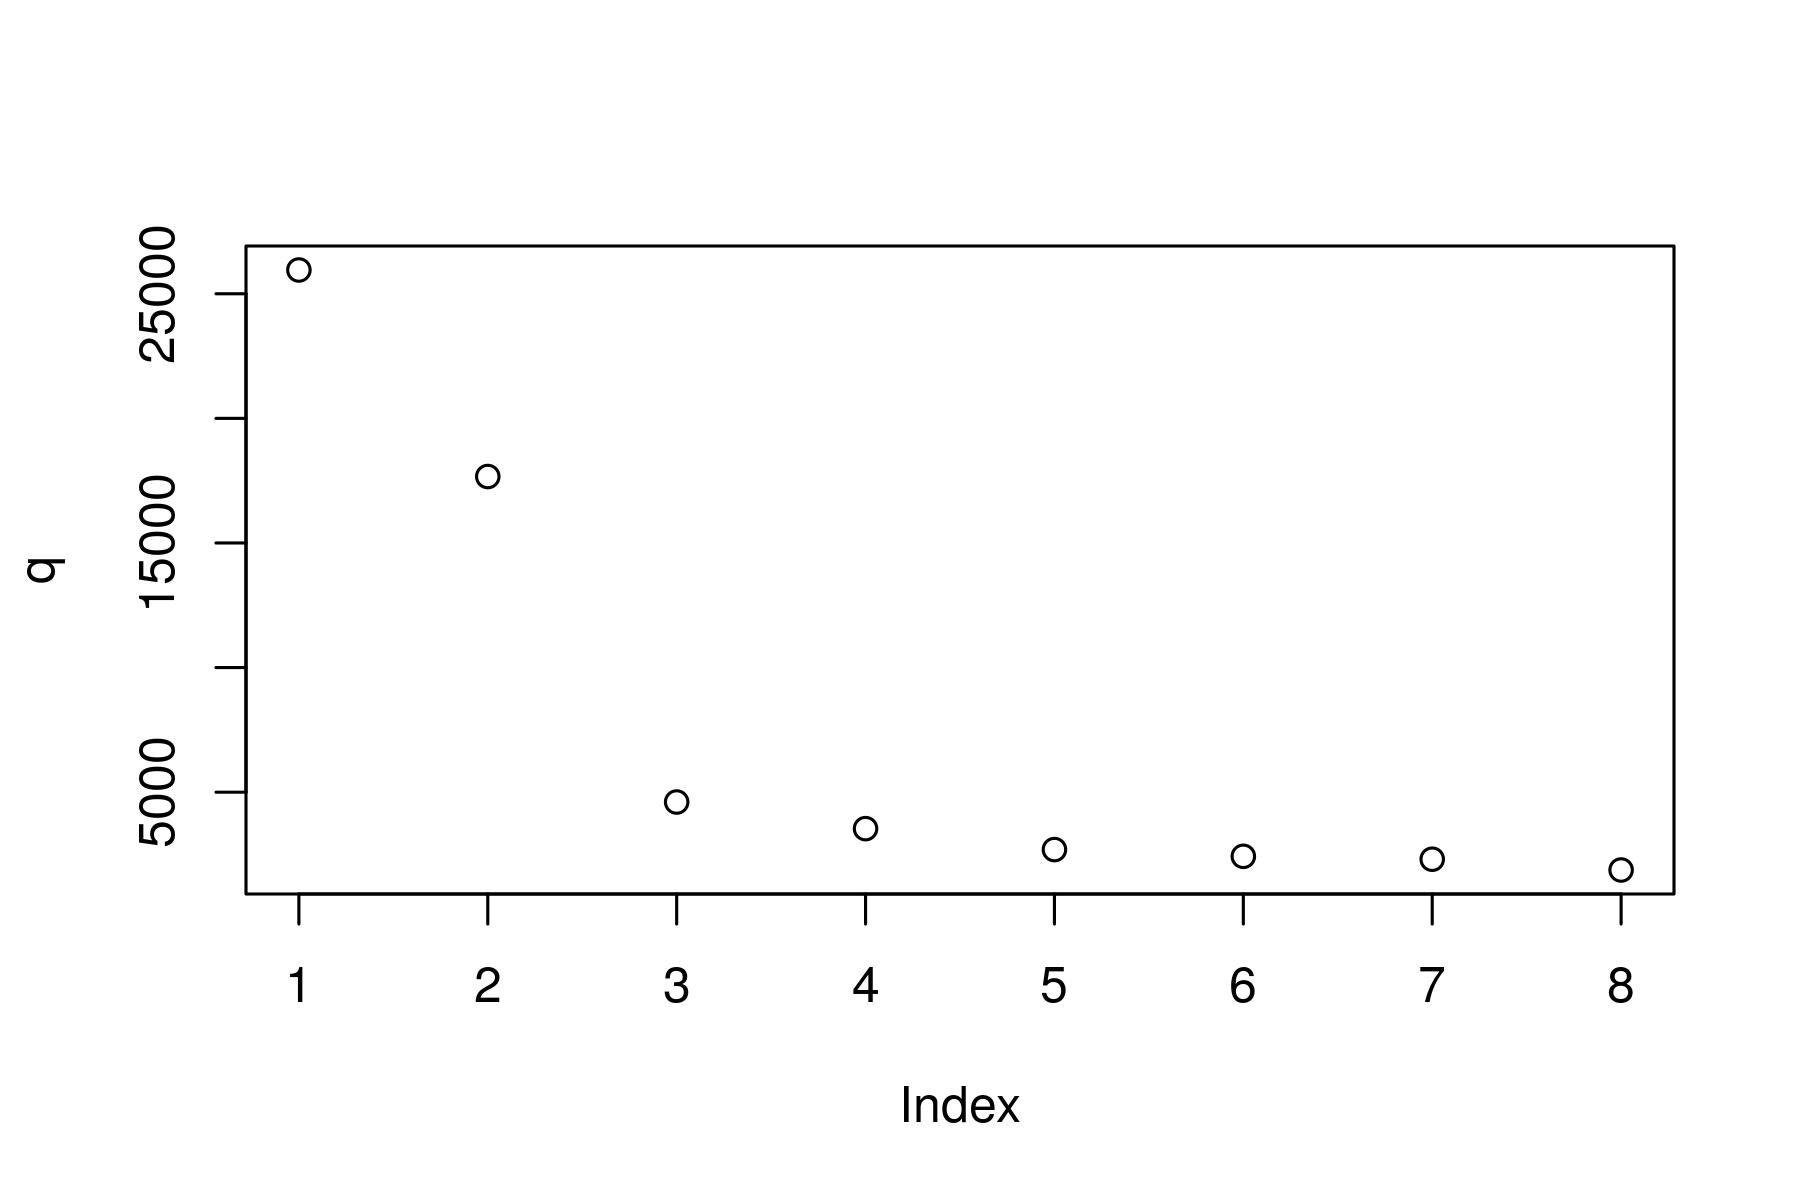

In [54]:
q<-c()
for (k in 1:8){
    myclust<-kmeans(df,k)
    q[k]<-sum(myclust$withinss)
}
plot(q)

#### Ejemplo Iris

Conjunto de datos de iris (de Fisher o Anderson) da las medidas en centímetros de las variables longitud y ancho del sépalo y longitud y ancho del pétalo, respectivamente, para 50 flores de cada una de las 3 especies de iris. Las especies son Iris setosa, versicolor y virginica.

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1 5.1          3.5         1.4          0.2         setosa 
2 4.9          3.0         1.4          0.2         setosa 
3 4.7          3.2         1.3          0.2         setosa 
4 4.6          3.1         1.5          0.2         setosa 
5 5.0          3.6         1.4          0.2         setosa 
6 5.4          3.9         1.7          0.4         setosa

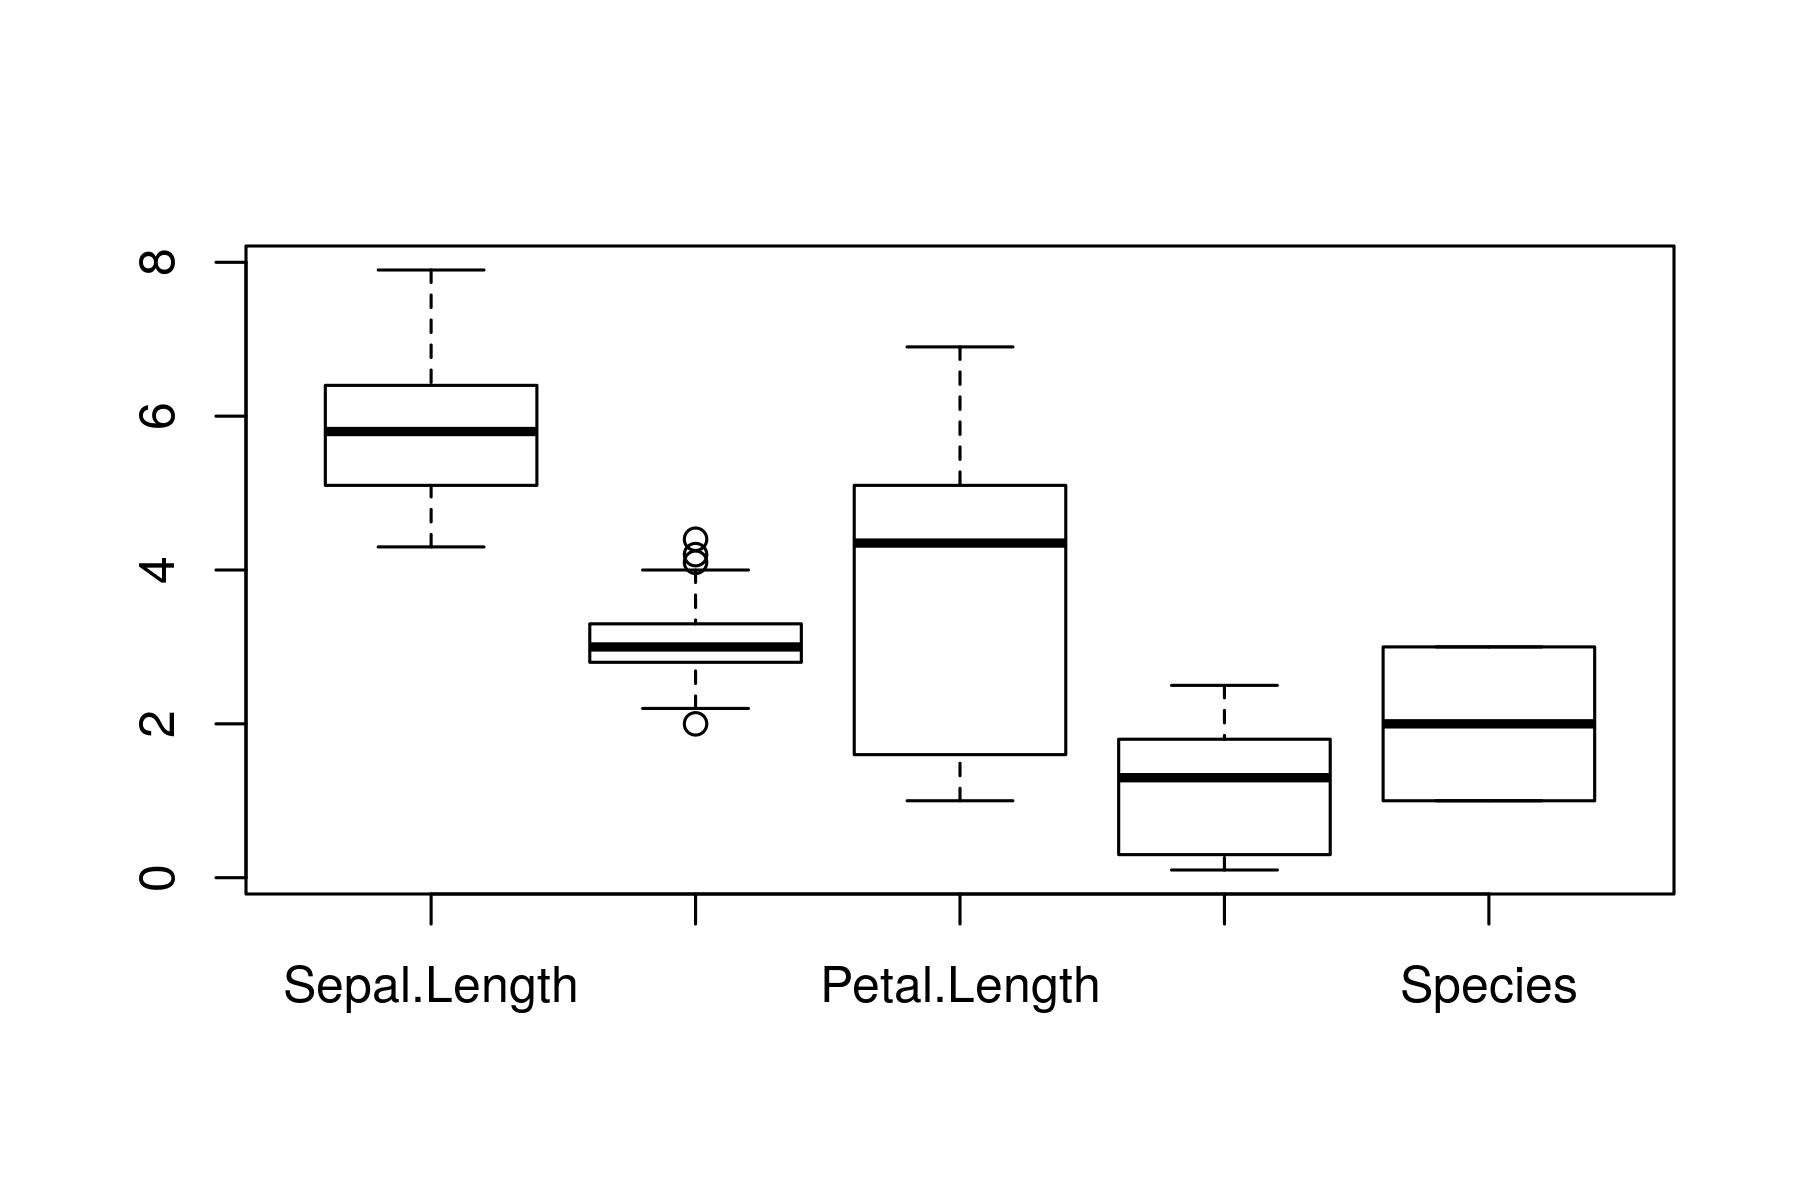

In [63]:
boxplot(iris)
summary(iris)
head(iris)

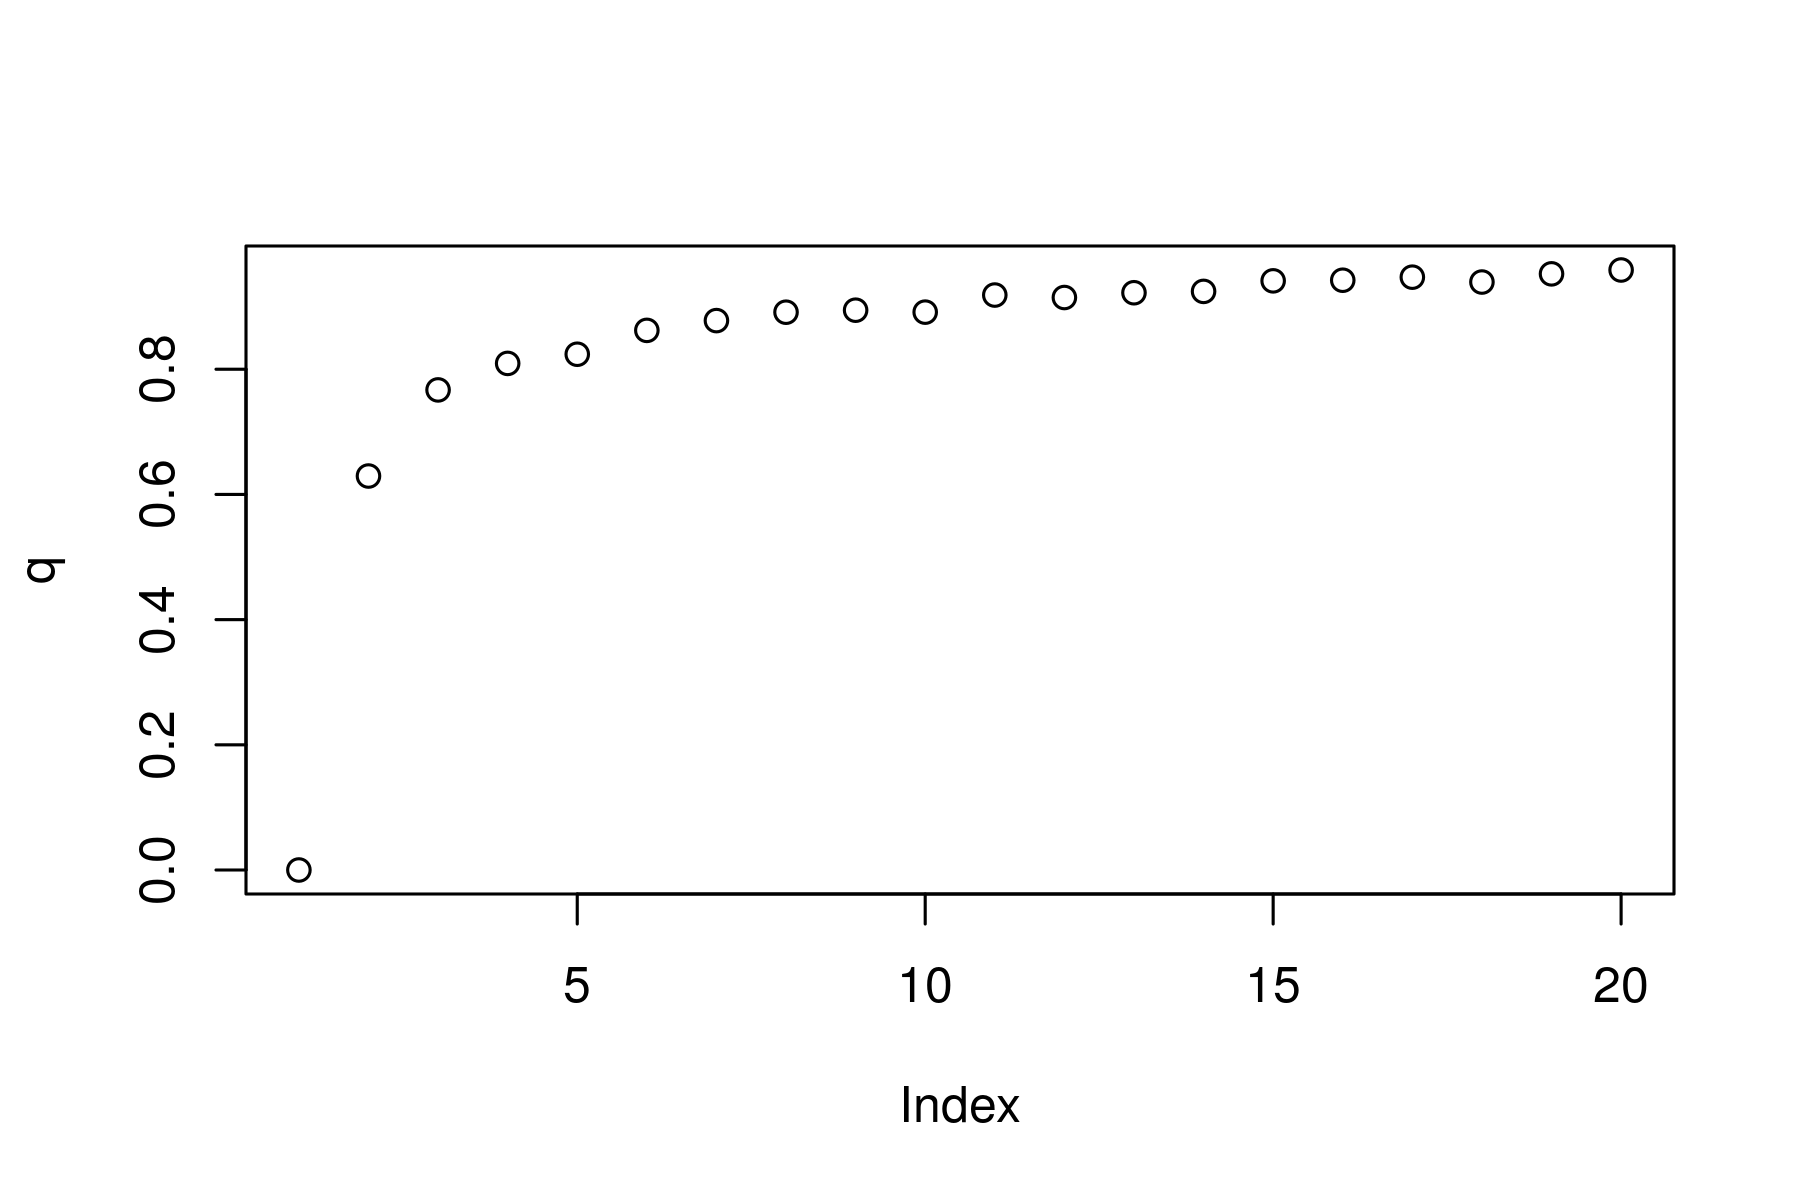

In [56]:
iris_data<-iris[,1:4]

for (i in 1:ncol(iris_data)){     
    mn<-mean(iris_data[,i],na.rm = T)
    sd<-sd(iris_data[,i],na.rm = T)
    
    iris_data[,i]<-(iris_data[,i]-mn)/sd    
}
q<-c()
for (k in 1:20){
    myclust<-kmeans(iris_data,k)
    q[k]<-myclust$betweenss/myclust$totss
}
plot(q)

In [64]:
myclust<-kmeans(iris_data,5)

In [65]:
table(myclust$cluster)


 1  2  3  4  5 
49 27 35 21 18 

In [66]:
table(iris$Species,myclust$cluster)

            
              1  2  3  4  5
  setosa     49  0  0  1  0
  versicolor  0  0 27 19  4
  virginica   0 27  8  1 14

#### Ejemplo proteinas


https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression

El conjunto de datos consiste en los niveles de expresión de 77 proteínas / modificaciones de proteínas que produjeron señales detectables en la fracción nuclear de la corteza. Hay 38 ratones de control y 34 ratones trisómicos (síndrome de Down), para un total de 72 ratones. En los experimentos, se registraron 15 mediciones de cada proteína por muestra / ratón. Por lo tanto, para los ratones de control, hay 38x15, o 570 mediciones, y para los ratones trisómicos, hay 34x15, o 510 mediciones. El conjunto de datos contiene un total de 1080 mediciones por proteína. Cada medida puede considerarse como una muestra / ratón independiente.

Las ocho clases de ratones se describen en función de características como el genotipo, el comportamiento y el tratamiento. Según el genotipo, los ratones pueden ser de control o trisómicos. Según el comportamiento, algunos ratones han sido estimulados para aprender (shock de contexto) y otros no (contexto de shock) y para evaluar el efecto del medicamento memantina en la recuperación de la capacidad de aprender en ratones trisómicos, algunos ratones han sido inyectado con la droga y otros no.

Clases
* c-CS-s: ratones de control, estimulados para aprender, inyectados con solución salina (9 ratones)
* c-CS-m: ratones de control, estimulados para aprender, inyectados con memantina (10 ratones)
* c-SC-s: ratones de control, no estimulados para aprender, inyectados con solución salina (9 ratones)
* c-SC-m: ratones de control, no estimulados para aprender, inyectados con memantina (10 ratones)

* t-CS-s: ratones con trisomía, estimulados para aprender, inyectados con solución salina (7 ratones)
* t-CS-m: ratones con trisomía, estimulados para aprender, inyectados con memantina (9 ratones)
* t-SC-s: ratones con trisomía, no estimulados para aprender, inyectados con solución salina (9 ratones)
* t-SC-m: ratones con trisomía, no estimulados para aprender, inyectados con memantina (9 ratones)



In [58]:
mouse<-read.csv("data/Data_Cortex_Nuclear.csv")
mouse_data<-mouse[,2:78]

In [59]:
head(mouse)

MouseID DYRK1A_N  ITSN1_N   BDNF_N    NR1_N    NR2A_N   pAKT_N    pBRAF_N  
1 309_1   0.5036439 0.7471932 0.4301753 2.816329 5.990152 0.2188300 0.1775655
2 309_2   0.5146171 0.6890635 0.4117703 2.789514 5.685038 0.2116362 0.1728170
3 309_3   0.5091831 0.7302468 0.4183088 2.687201 5.622059 0.2090109 0.1757222
4 309_4   0.4421067 0.6170762 0.3586263 2.466947 4.979503 0.2228858 0.1764626
5 309_5   0.4349402 0.6174298 0.3588022 2.365785 4.718679 0.2131059 0.1736270
6 309_6   0.4475064 0.6281758 0.3673881 2.385939 4.807635 0.2185778 0.1762334
  pCAMKII_N pCREB_N   ⋯ pCFOS_N   SYP_N     H3AcK18_N EGR1_N    H3MeK4_N 
1 2.373744  0.2322238 ⋯ 0.1083359 0.4270992 0.1147832 0.1317900 0.1281856
2 2.292150  0.2269721 ⋯ 0.1043154 0.4415813 0.1119735 0.1351030 0.1311187
3 2.283337  0.2302468 ⋯ 0.1062193 0.4357769 0.1118829 0.1333618 0.1274311
4 2.152301  0.2070042 ⋯ 0.1112620 0.3916910 0.1304053 0.1474442 0.1469011
5 2.134014  0.1921579 ⋯ 0.1106939 0.4341538 0.1184814 0.1403143 0.1483799
6 2.141282  0.1951875 ⋯ 0.1094457 0.4398331 0.1166572 0.1407664 0.1421804
  CaNA_N   Genotype Treatment Behavior class 
1 1.675652 Control  Memantine C/S      c-CS-m
2 1.743610 Control  Memantine C/S      c-CS-m
3 1.926427 Control  Memantine C/S      c-CS-m
4 1.700563 Control  Memantine C/S      c-CS-m
5 1.839730 Control  Memantine C/S      c-CS-m
6 1.816389 Control  Memantine C/S      c-CS-m

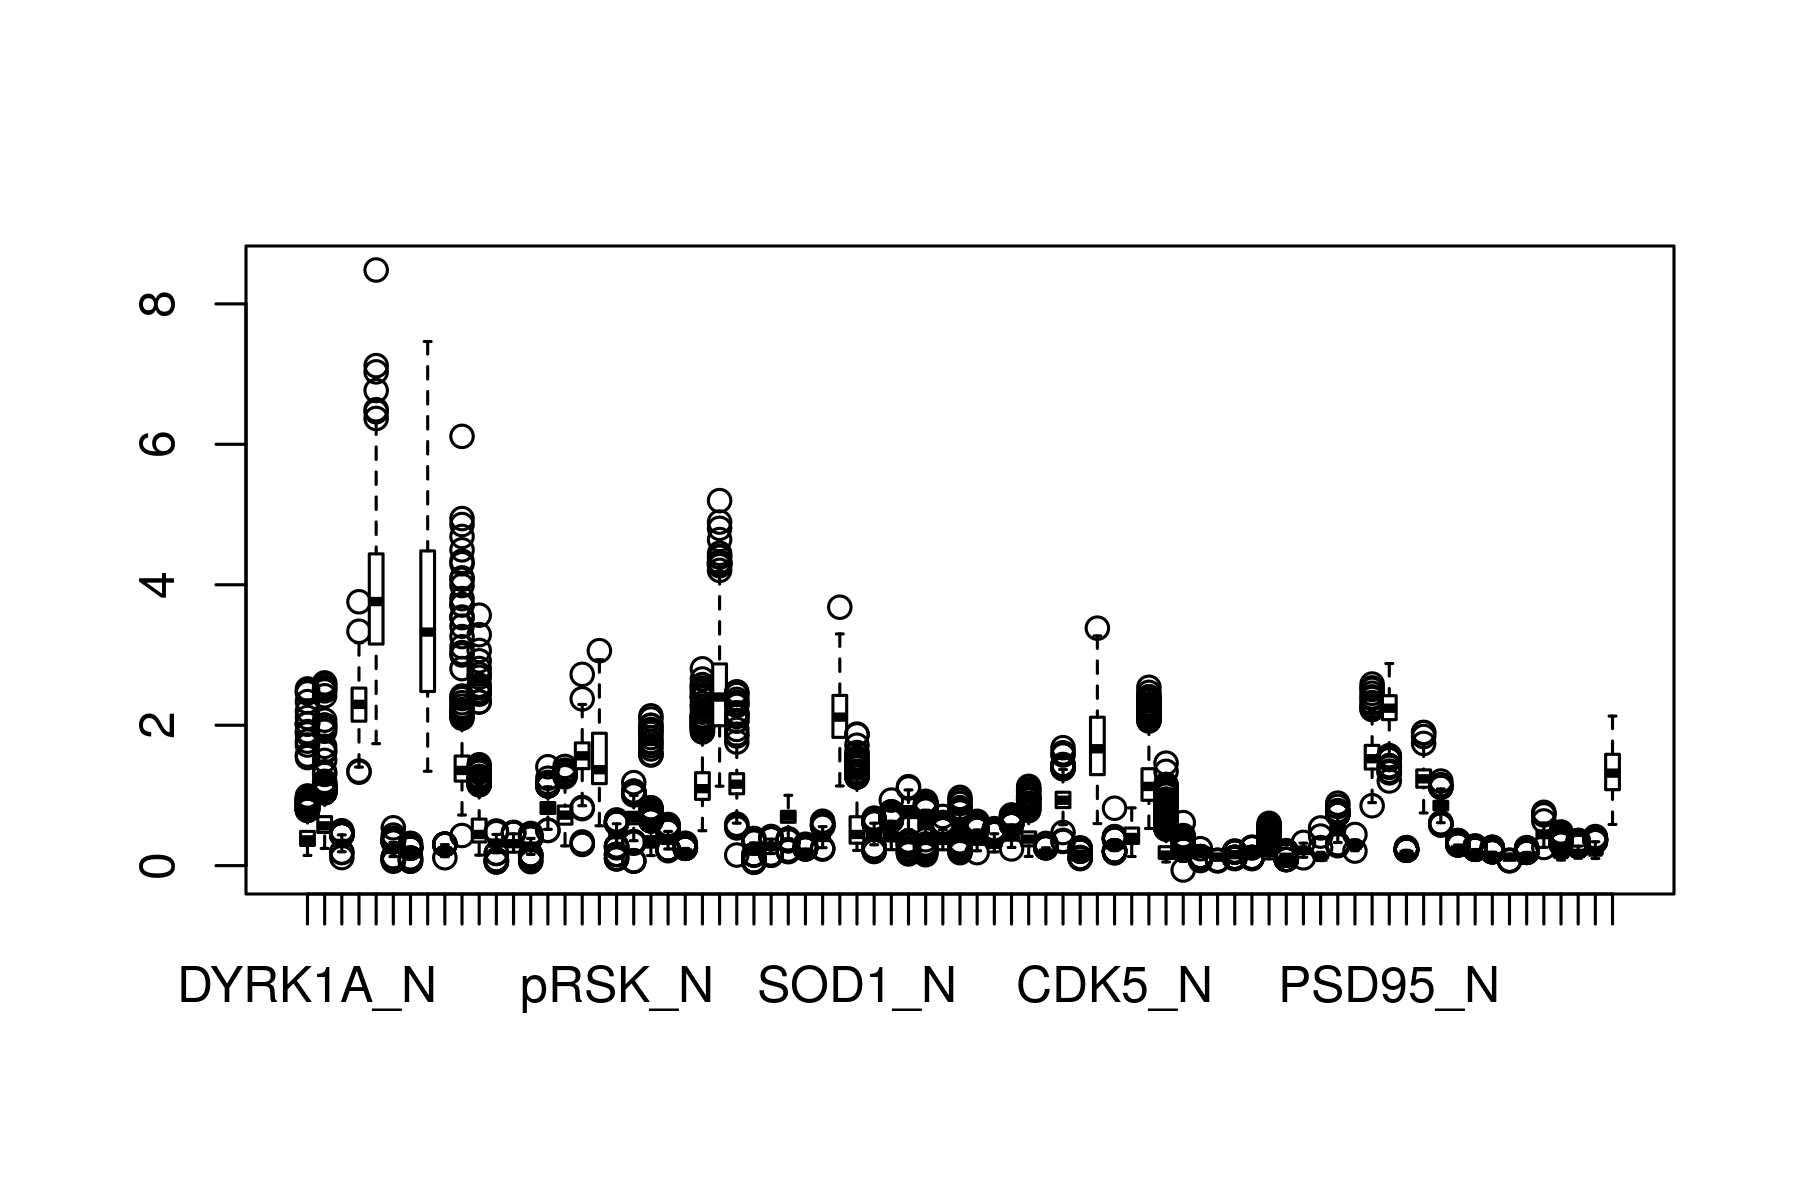

In [60]:
boxplot(mouse_data)

In [61]:
head(mouse_data)

DYRK1A_N  ITSN1_N   BDNF_N    NR1_N    NR2A_N   pAKT_N    pBRAF_N   pCAMKII_N
1 0.5036439 0.7471932 0.4301753 2.816329 5.990152 0.2188300 0.1775655 2.373744 
2 0.5146171 0.6890635 0.4117703 2.789514 5.685038 0.2116362 0.1728170 2.292150 
3 0.5091831 0.7302468 0.4183088 2.687201 5.622059 0.2090109 0.1757222 2.283337 
4 0.4421067 0.6170762 0.3586263 2.466947 4.979503 0.2228858 0.1764626 2.152301 
5 0.4349402 0.6174298 0.3588022 2.365785 4.718679 0.2131059 0.1736270 2.134014 
6 0.4475064 0.6281758 0.3673881 2.385939 4.807635 0.2185778 0.1762334 2.141282 
  pCREB_N   pELK_N   ⋯ SHH_N     BAD_N     BCL2_N pS6_N     pCFOS_N   SYP_N    
1 0.2322238 1.750936 ⋯ 0.1888517 0.1226520 NA     0.1063052 0.1083359 0.4270992
2 0.2269721 1.596377 ⋯ 0.2004036 0.1166822 NA     0.1065922 0.1043154 0.4415813
3 0.2302468 1.561316 ⋯ 0.1936845 0.1185082 NA     0.1083031 0.1062193 0.4357769
4 0.2070042 1.595086 ⋯ 0.1921119 0.1327812 NA     0.1031838 0.1112620 0.3916910
5 0.1921579 1.504230 ⋯ 0.2056042 0.1299541 NA     0.1047838 0.1106939 0.4341538
6 0.1951875 1.442398 ⋯ 0.1904695 0.1315752 NA     0.1064762 0.1094457 0.4398331
  H3AcK18_N EGR1_N    H3MeK4_N  CaNA_N  
1 0.1147832 0.1317900 0.1281856 1.675652
2 0.1119735 0.1351030 0.1311187 1.743610
3 0.1118829 0.1333618 0.1274311 1.926427
4 0.1304053 0.1474442 0.1469011 1.700563
5 0.1184814 0.1403143 0.1483799 1.839730
6 0.1166572 0.1407664 0.1421804 1.816389

In [62]:
for (i in 1:ncol(mouse_data)){
        
    mn<-mean(mouse_data[,i],na.rm = T)
    sd<-sd(mouse_data[,i],na.rm = T)
    mouse_data[is.na(mouse_data[,i]),i]<-mn
    
    mouse_data[,i]<-(mouse_data[,i]-mn)/sd    
}

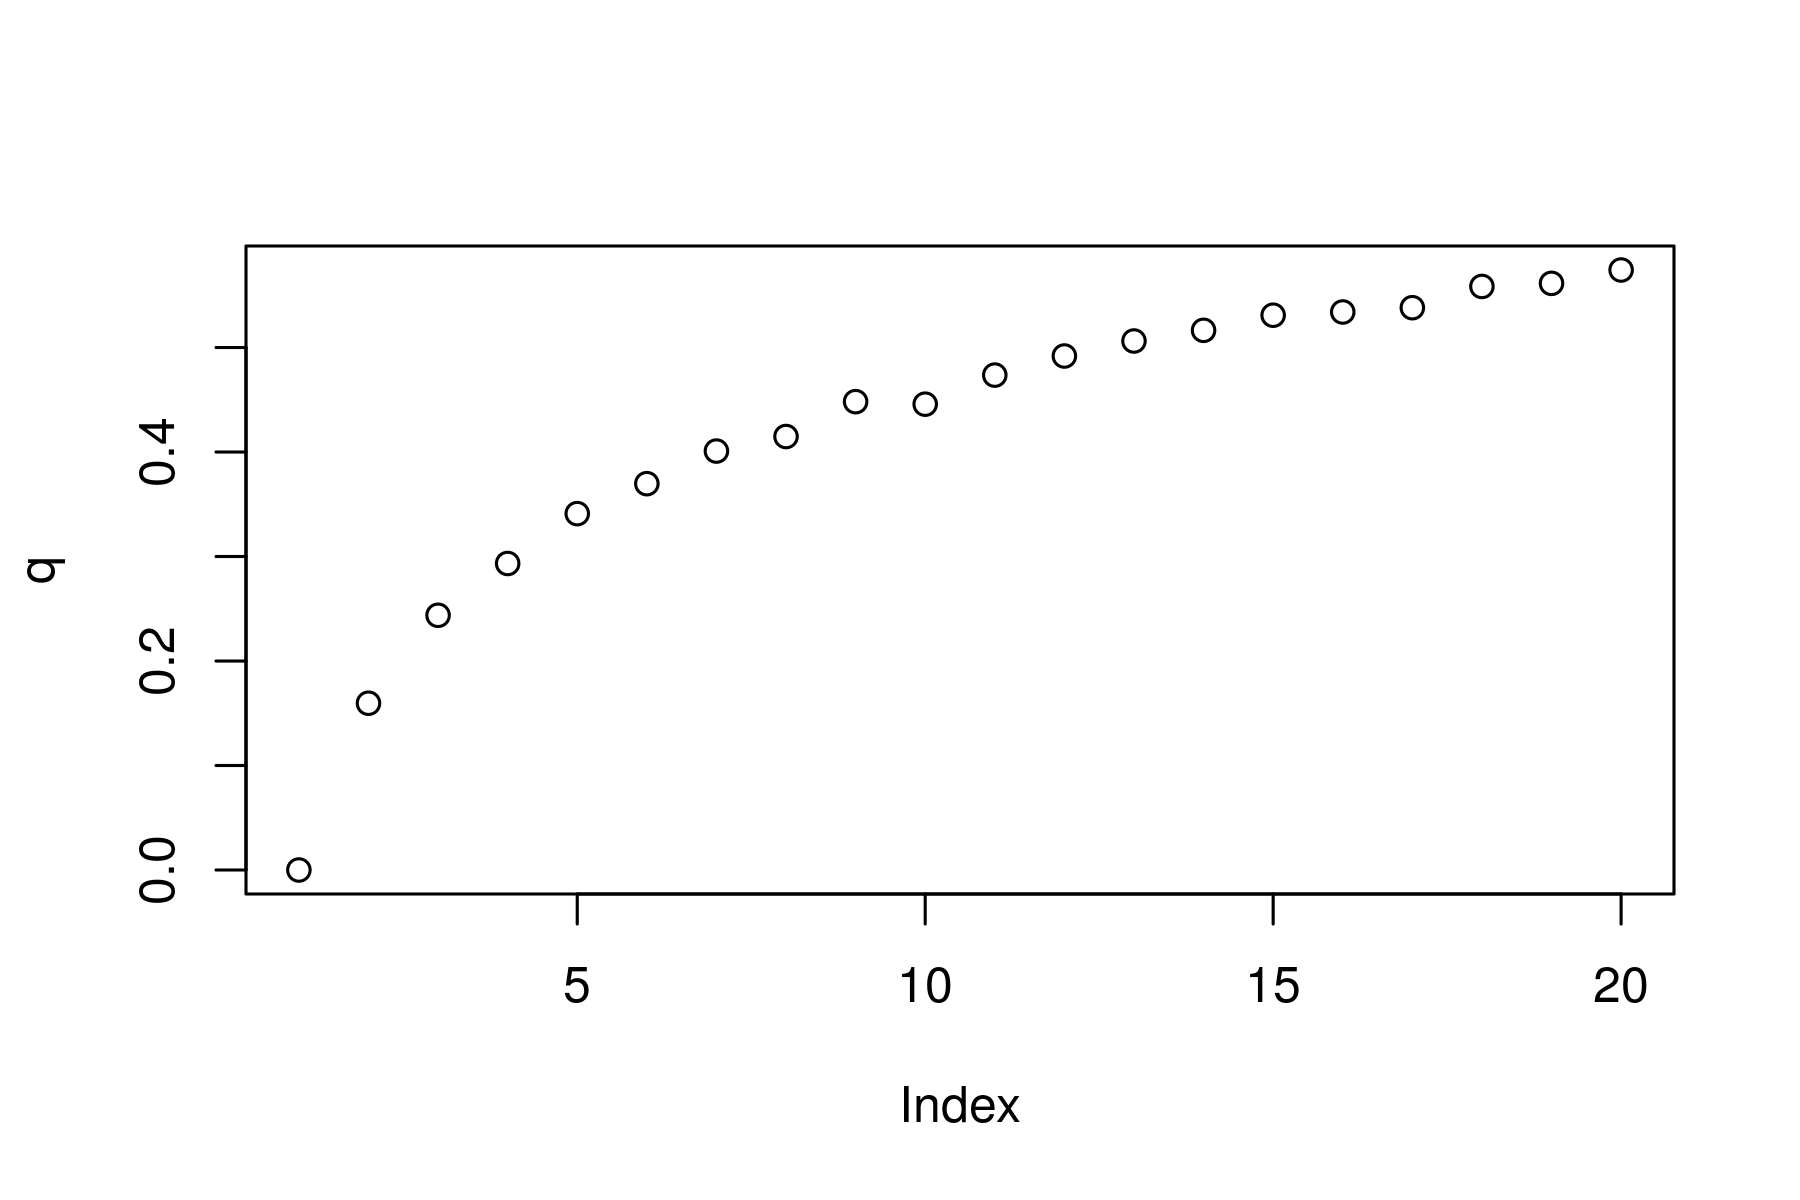

In [63]:
q<-c()
for (k in 1:20){
    myclust<-kmeans(mouse_data,k)
    q[k]<-myclust$betweenss/myclust$totss
}
plot(q)

In [73]:
myclust<-kmeans(mouse_data,8)
table(mouse$class,myclust$cluster)

        
          1  2  3  4  5  6  7  8
  c-CS-m 43  7 18  0 13 14 37 18
  c-CS-s 42  0 34  0  3  0 30 26
  c-SC-m  0 34  0 11 36 60  0  9
  c-SC-s  0 12  1 18 26 73  2  3
  t-CS-m 69  0  9  0  2  0 11 44
  t-CS-s 52  3 11  3  0  0 14 22
  t-SC-m  0 35 10 10 21 55  4  0
  t-SC-s 12  9 23 45  4 13 20  9

In [75]:
myclust<-kmeans(mouse_data,9)
table(mouse$class,myclust$cluster)
table(mouse$Genotype,myclust$cluster)
table(mouse$Treatment,myclust$cluster)
table(mouse$Behavior,myclust$cluster)

        
          1  2  3  4  5  6  7  8  9
  c-CS-m 18  0 28 12 42 22  1 11 16
  c-CS-s 21  0 36  0 28 26  5 19  0
  c-SC-m 24  1  0 67  0  0 14  2 42
  c-SC-s  9  0  0 72  5  0 20  4 25
  t-CS-m 14  0 51  0 13 34 23  0  0
  t-CS-s 10  0 43  0 11 26  7  5  3
  t-SC-m  7 15  0 50  6  0  0 23 34
  t-SC-s  1 37  0  6 19 22 23 26  1

         
            1   2   3   4   5   6   7   8   9
  Control  72   1  64 151  75  48  40  36  83
  Ts65Dn   32  52  94  56  49  82  53  54  38

           
              1   2   3   4   5   6   7   8   9
  Memantine  63  16  79 129  61  56  38  36  92
  Saline     41  37  79  78  63  74  55  54  29

     
        1   2   3   4   5   6   7   8   9
  C/S  63   0 158  12  94 108  36  35  19
  S/C  41  53   0 195  30  22  57  55 102

### Más medidas de calidad de un cluster (ASW)

Average silhouette width (ASW)

La medida de *silhouette* nos dice como de imilar es un objeto a su propio cluster (cohesión) comparado con otros clusters (separación).

Su valor va entre:
* -1 : La muestra no se parece demasiado a sus vecinos y se diferencia poco de las de otro cluster
* 1  : La muestra se parece mucho a sus vecinos y muy poco a las de otro cluster

Se da un valor por muestra, si la mayor parte de las muestras tienen un valor alto entonces la configuración del cluster es buena.

Su valor s(i) se calcula como:


\\[
s(i)=\frac{b(i)-a(i)}{max \left ( a(i), b(i) \right )}
\\]

donde a(i) es la media de la distancia entre i y todos los puntos de su mismo cluster: 

\\[
a(i)=\frac{1}{\mid C(i) \mid -1 } \sum_{x \in C(i)} d(x_i,x)
\\]


y b(i) es la distancia media de *i* al cluster más parecido (el que tiene una menor distancia media):

\\[
b(i)=min_{j \notin C(i)} \frac{1}{\mid C(j) \mid } \sum_{x \in C(i)} d(x_i,x)
\\]

$C(i)$ es el cluster al cual *i* pertenece y $\mid C(i) \mid$ es el número de elementos en ese cluster.



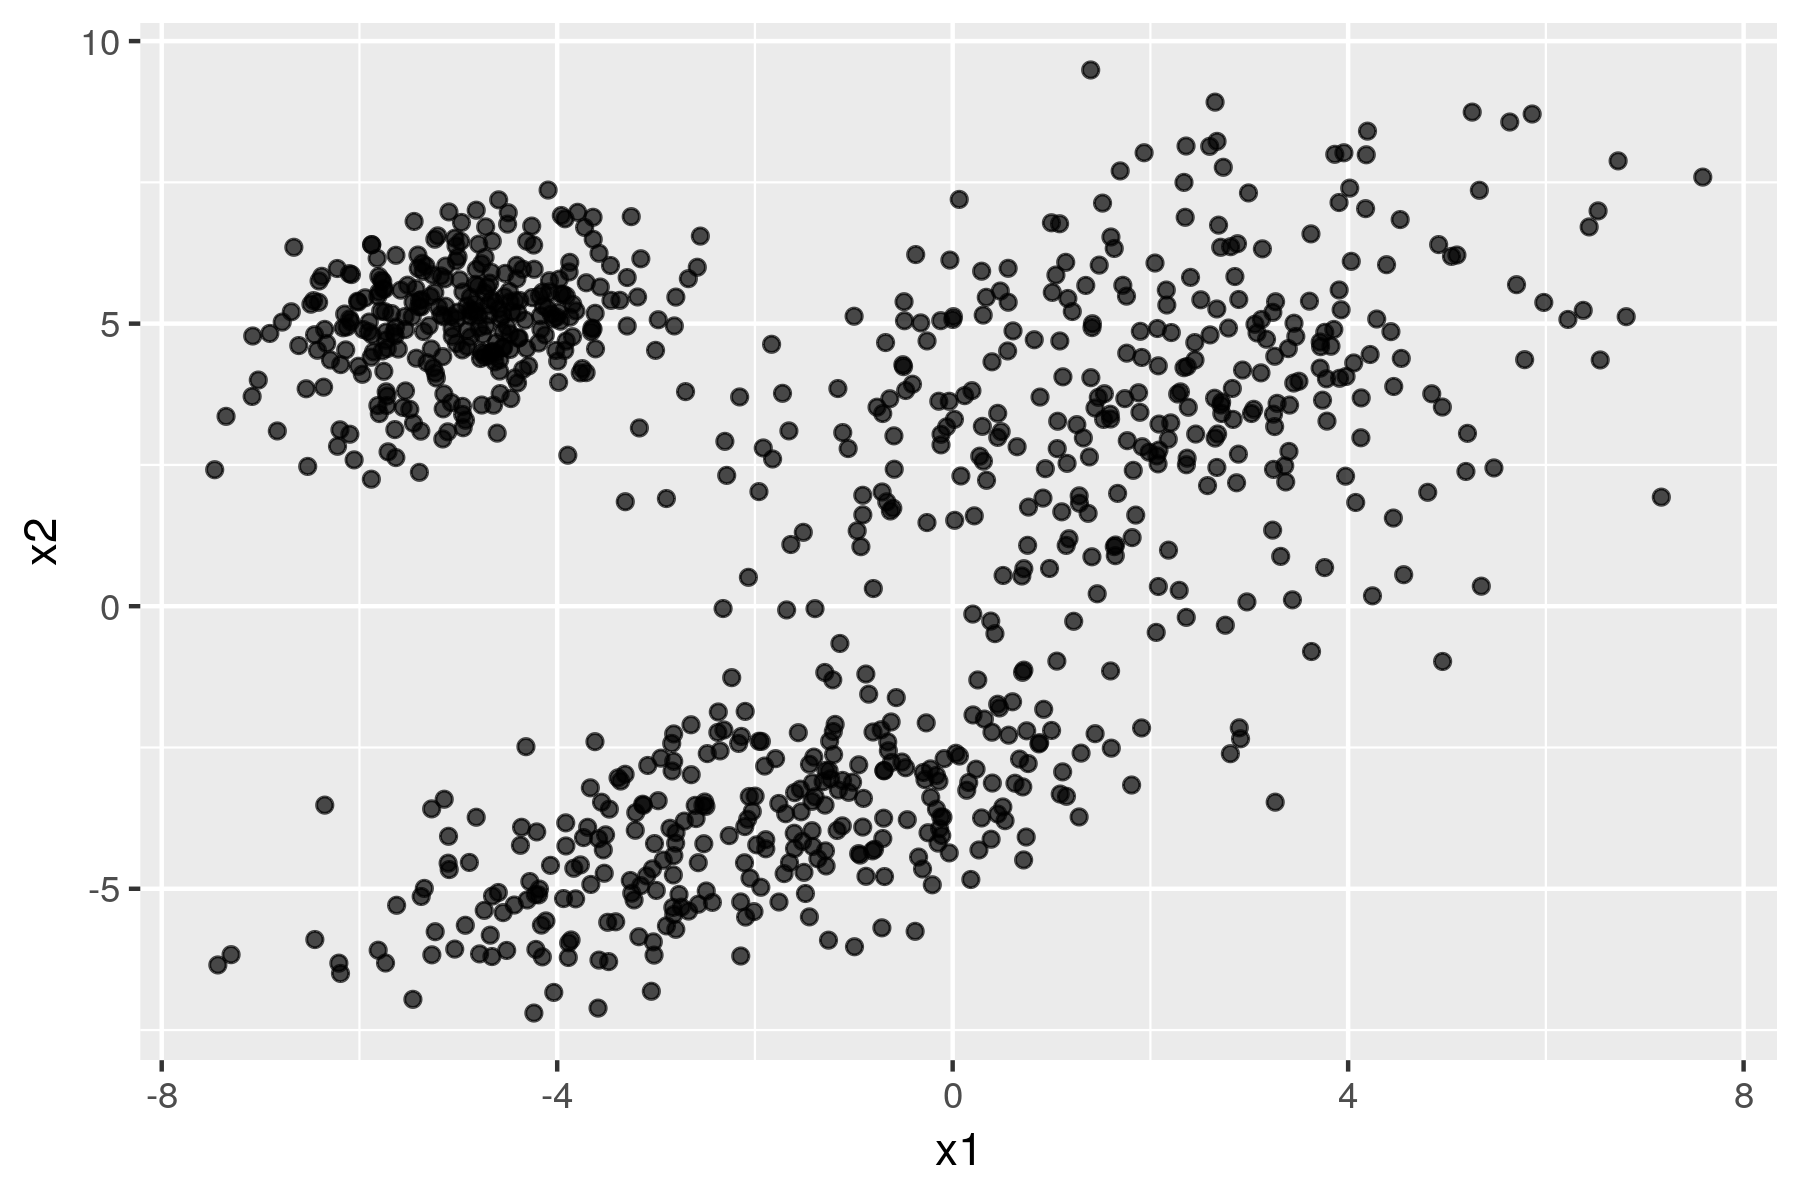

In [1]:
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 300)


N<-300
x1<-c(rnorm(N,mean=2,sd=2),rnorm(N,mean=-2,sd=2),rnorm(N,mean=-5,sd=1))
x2<-c(0.4*x1+c(rnorm(N,mean=3,sd=2),rnorm(N,mean=-3,sd=1),rnorm(N,mean=7,sd=1)))
df<-data.frame(x1,x2)

library(ggplot2)
ggplot(data=df, aes(x=x1,y=x2))+geom_point(alpha=0.7)

In [78]:
myclust<-kmeans(df,3)

In [79]:
myclust$cluster

[1] 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 3 1 1 1 1 1 2 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1
[149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[186] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 2
[223] 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1
[260] 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[297] 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[334] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[371] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[408] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3
[445] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[482] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[519] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[556] 1 3 3 3 3 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[593] 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[630] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[667] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[704] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[741] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[778] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[815] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[852] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[889] 2 2 2 2 2 2 2 2 2 2 2 2

In [81]:
dim(df)

[1] 900   2

In [82]:
?dist

In [84]:
library(cluster)
ss<-silhouette(myclust$cluster, dist(df))

In [86]:
mean(ss[,"sil_width"])

[1] 0.6472213

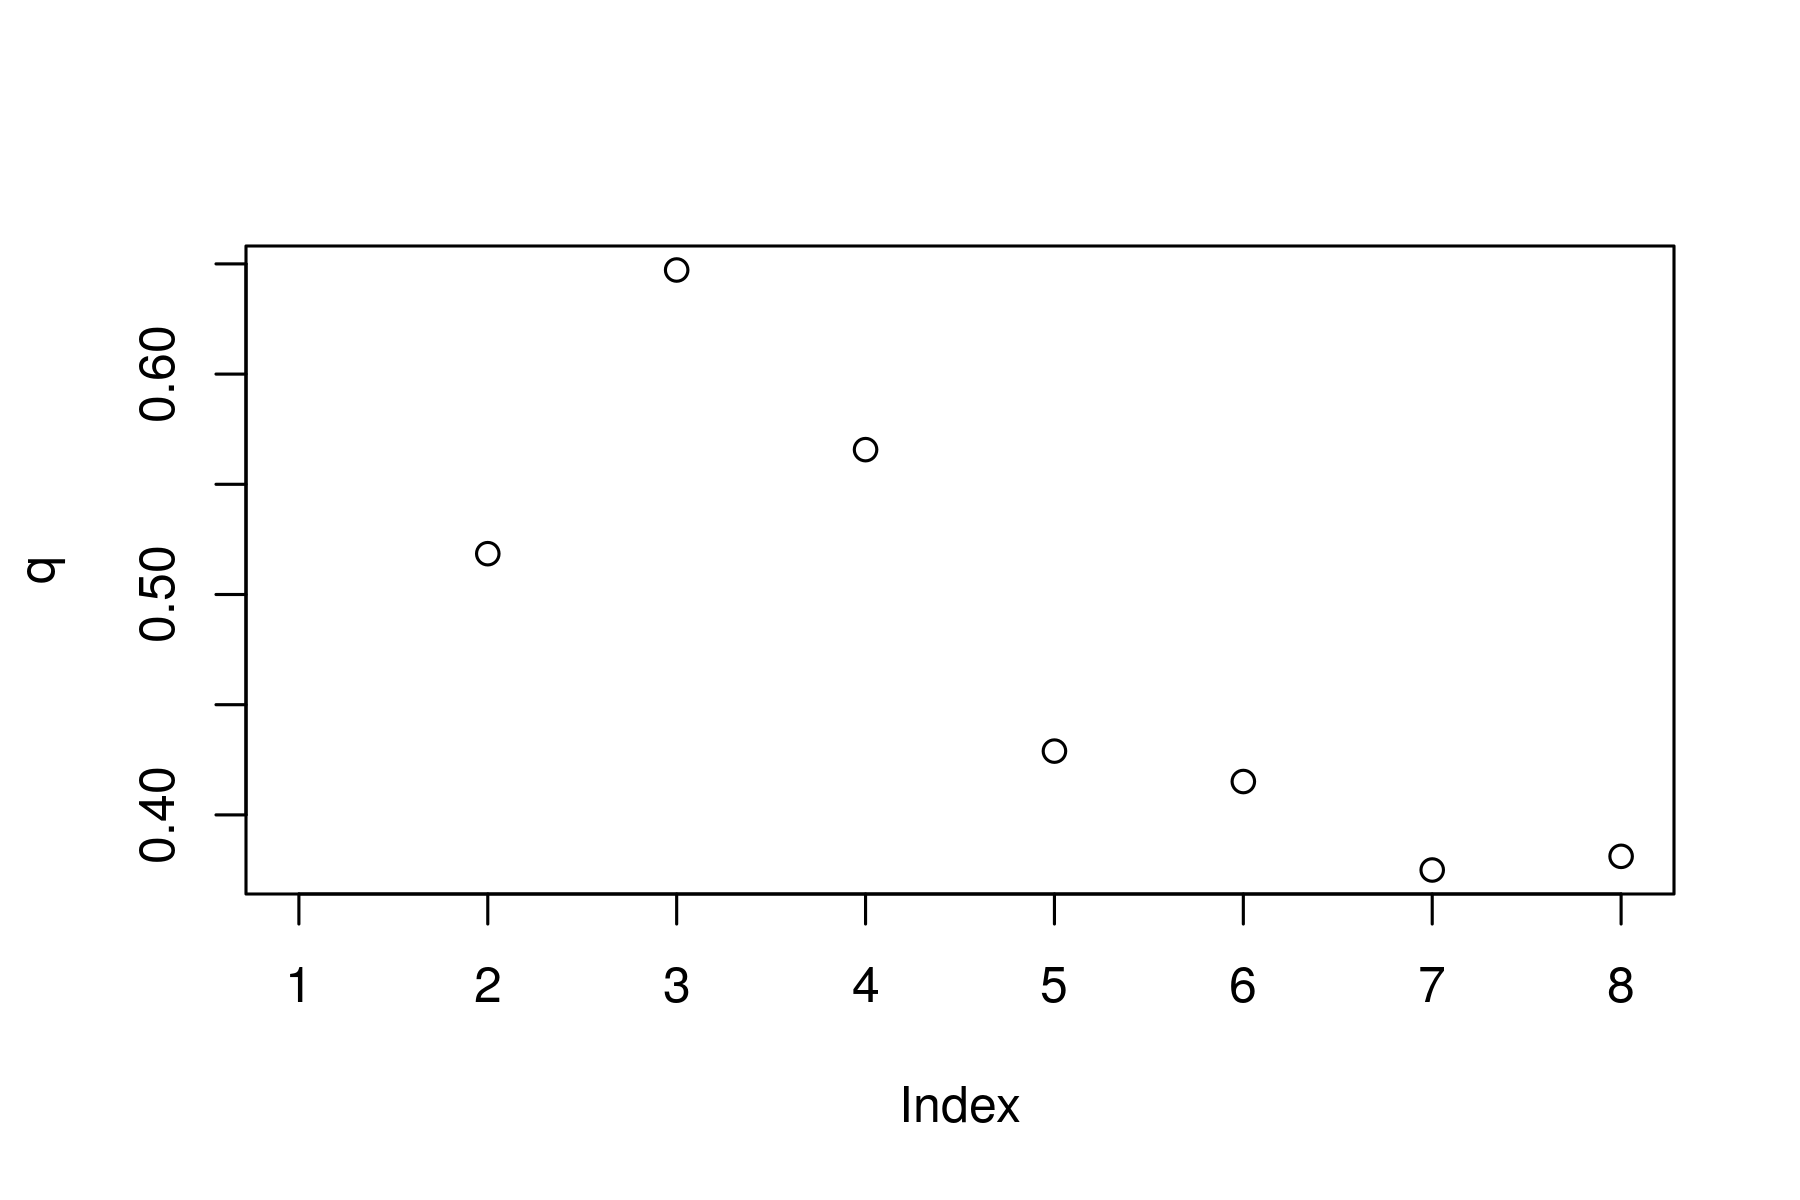

In [87]:
q<-c()
for (k in 2:8){
    myclust<-kmeans(df,k)
    ss<-silhouette(myclust$cluster, dist(df))    
    q[k]<-mean(ss[, "sil_width"])
}
plot(q)

Silhouette of 900 units in 3 clusters from silhouette.default(x = myclust$cluster, dist = dist(df)) :
 Cluster sizes and average silhouette widths:
      290       306       304 
0.5361971 0.7516329 0.6480340 
Individual silhouette widths:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.00115  0.58779  0.68773  0.64722  0.75574  0.83038 

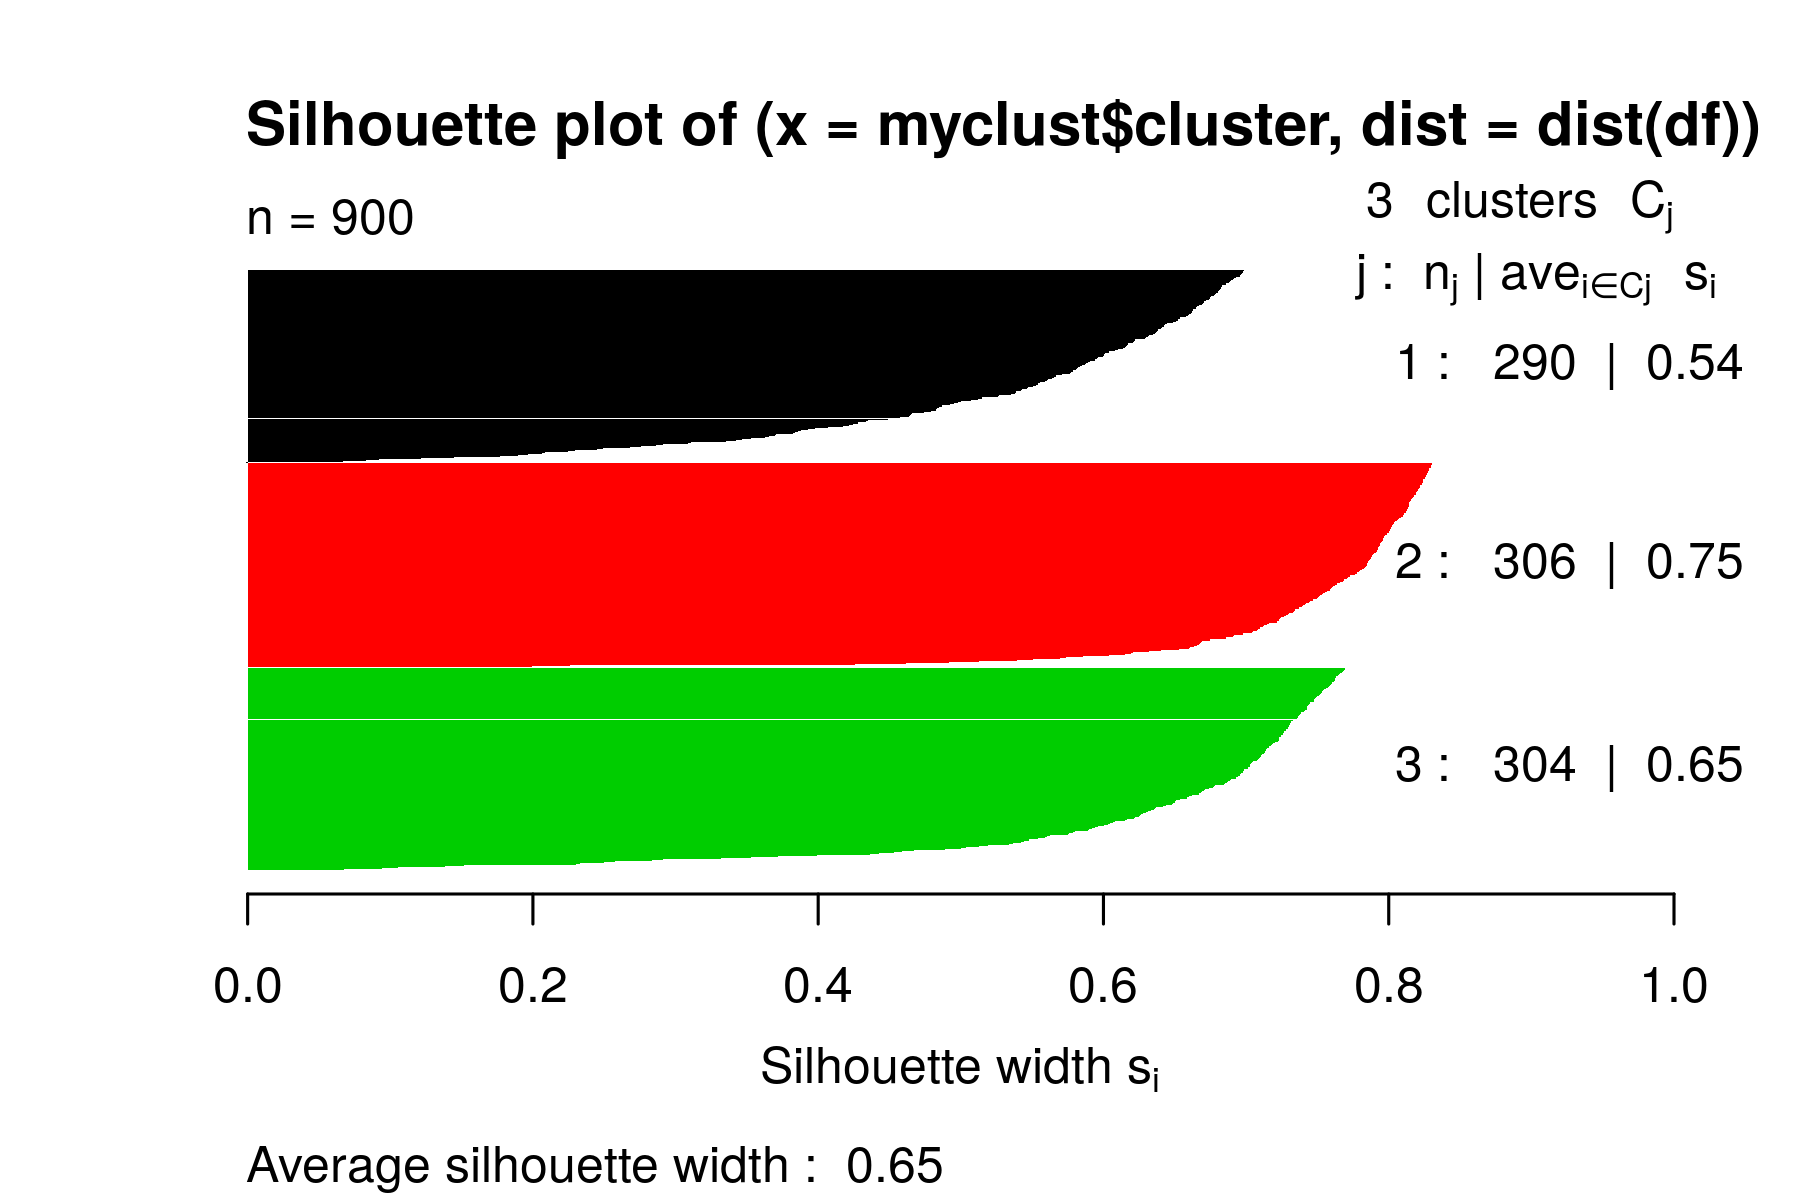

In [88]:
k<-3
myclust<-kmeans(df,k)
ss<-silhouette(myclust$cluster, dist(df))  
summary(ss)
plot(ss,col=1:k,border=NA)

### Ejemplo dataset iris

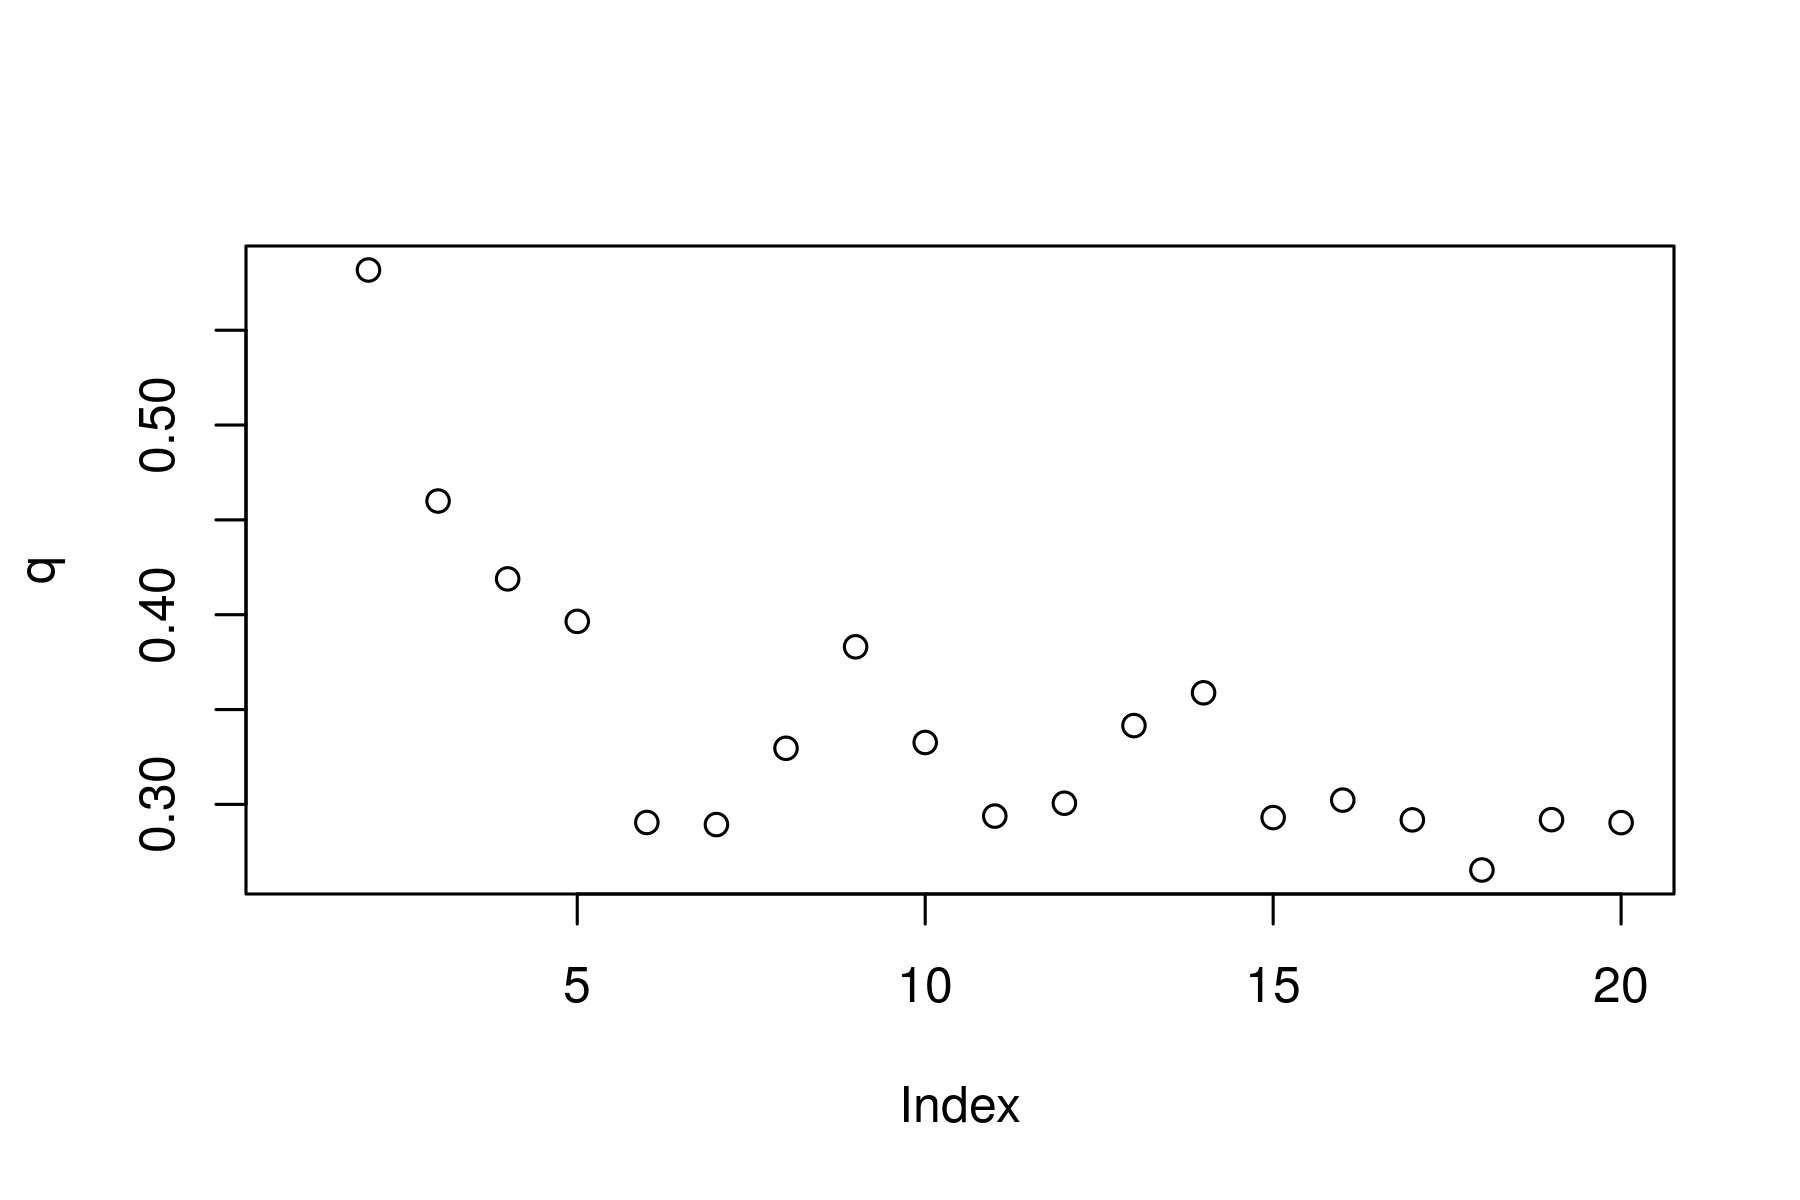

In [90]:
q<-c()
for (k in 2:20){
    myclust<-kmeans(iris_data,k)
    ss<-silhouette(myclust$cluster, dist(iris_data))    
    q[k]<-mean(ss[, "sil_width"])
}
plot(q)

Silhouette of 150 units in 5 clusters from silhouette.default(x = myclust$cluster, dist = dist(iris_data)) :
 Cluster sizes and average silhouette widths:
       19        27        33        22        49 
0.3393299 0.3334261 0.2698444 0.2007137 0.6125778 
Individual silhouette widths:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.07032  0.25283  0.40001  0.39191  0.55162  0.72405 

            
              1  2  3  4  5
  setosa      1  0  0  0 49
  versicolor 17 24  3  6  0
  virginica   1  3 30 16  0

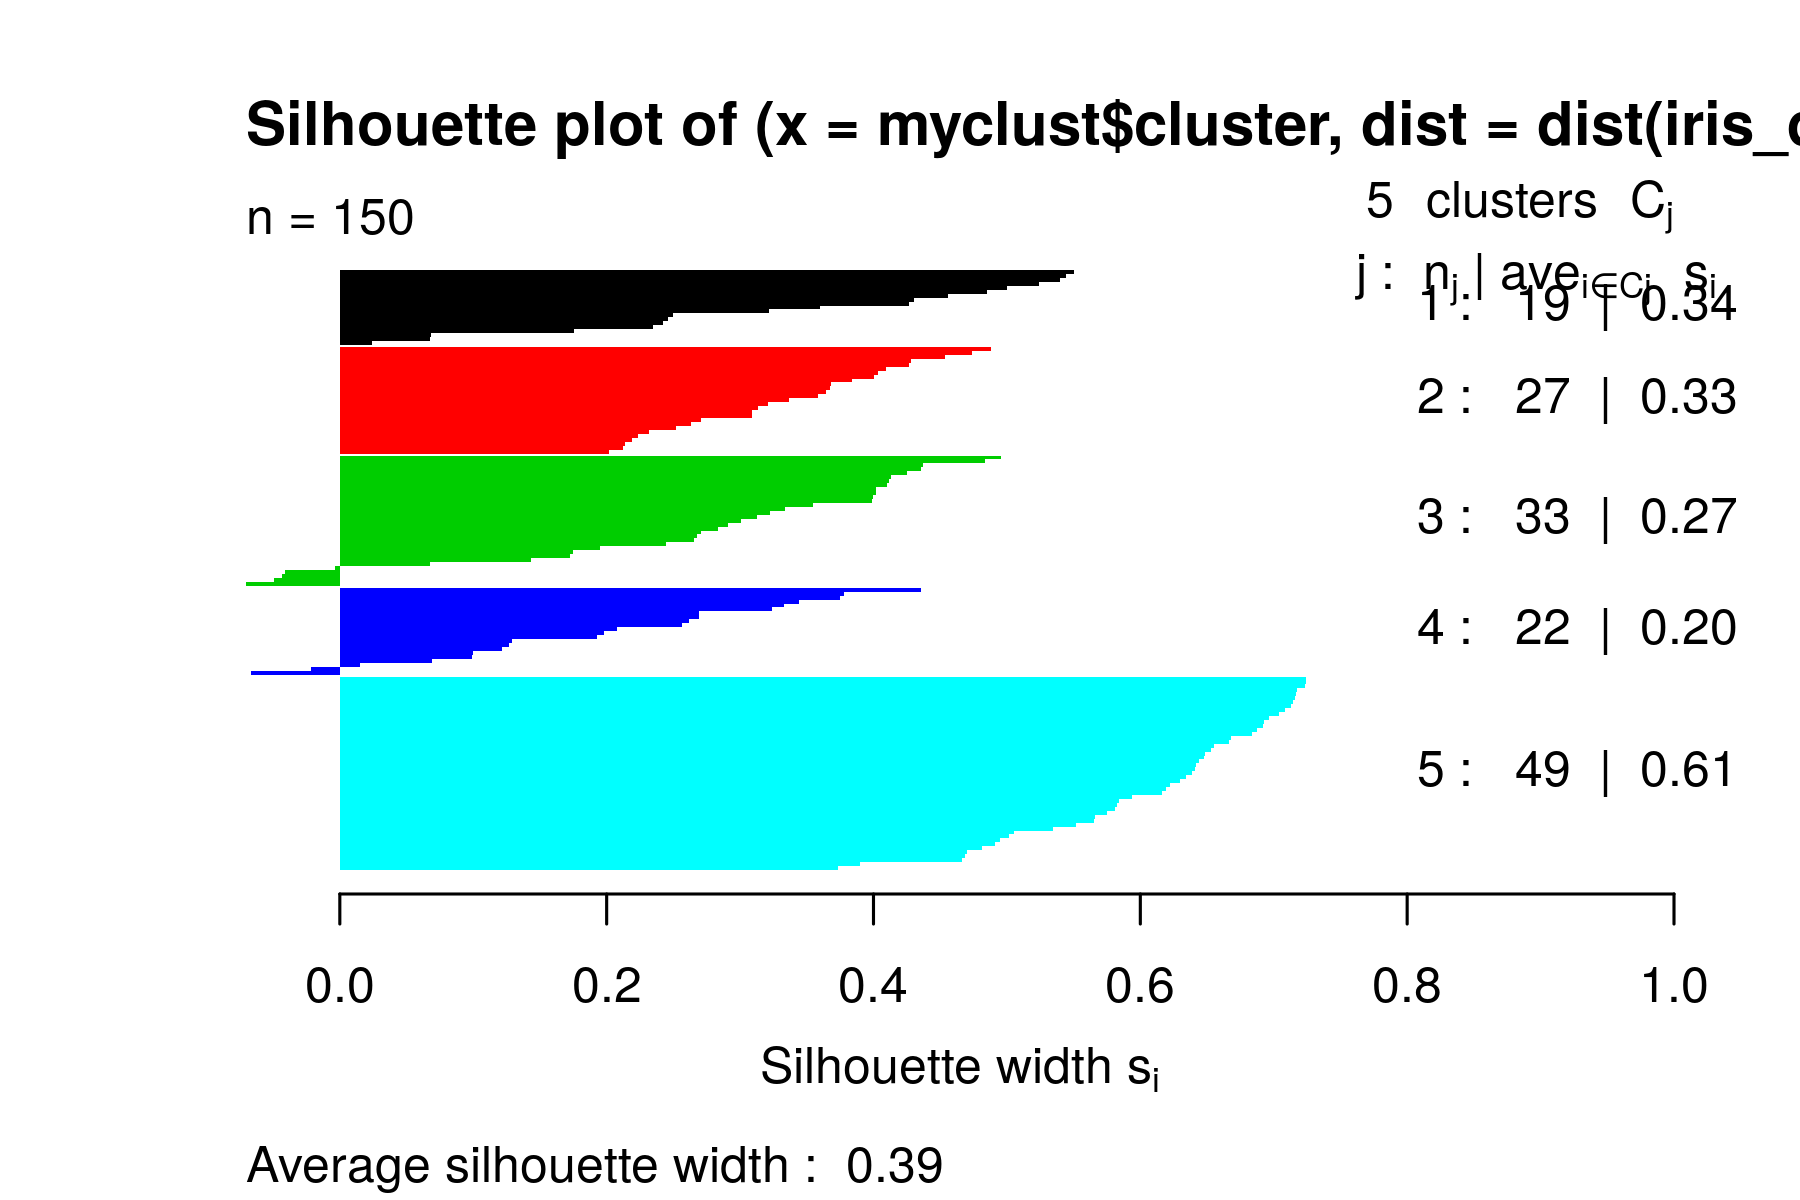

In [100]:
k<-5
myclust<-kmeans(iris_data,k)
ss<-silhouette(myclust$cluster, dist(iris_data))  
summary(ss)
plot(ss,col=1:k,border=NA)

table(iris$Species,myclust$cluster)

In [101]:
ss[ss[,"sil_width"]<0,]

cluster neighbor sil_width   
[1,] 3       2        -0.040911138
[2,] 3       2        -0.043388328
[3,] 4       2        -0.066518188
[4,] 4       2        -0.021767095
[5,] 3       2        -0.070319626
[6,] 3       2        -0.003819953
[7,] 3       2        -0.049315438

In [102]:
iris[ss[,"sil_width"]<0,]

Sepal.Length Sepal.Width Petal.Length Petal.Width Species   
51  7.0          3.2         4.7          1.4         versicolor
53  6.9          3.1         4.9          1.5         versicolor
55  6.5          2.8         4.6          1.5         versicolor
77  6.8          2.8         4.8          1.4         versicolor
78  6.7          3.0         5.0          1.7         versicolor
117 6.5          3.0         5.5          1.8         virginica 
138 6.4          3.1         5.5          1.8         virginica

####  Ejemplo aceite de oliva

Composition in percentage of eight fatty acids found in the lipid fraction of 572 Italian olive oils:


* region. General region of Italy.

• area. Area of Italy.

• palmitic. Percent palmitic acid of sample.

• palmitoleic. Percent palmitoleic of sample.

• stearic. Percent stearic acid of sample.

• oleic. Percent oleic acid of sample.

• linoleic. Percent linoleic acid of sample.

• linolenic. Percent linolenic acid of sample.

• arachidic. Percent arachidic acid of sample.

• eicosenoic. Percent eicosenoic acid of sample.

In [107]:
library(dslabs)

In [108]:
head(olive)

region         area         palmitic palmitoleic stearic oleic linoleic
1 Southern Italy North-Apulia 10.75    0.75        2.26    78.23 6.72    
2 Southern Italy North-Apulia 10.88    0.73        2.24    77.09 7.81    
3 Southern Italy North-Apulia  9.11    0.54        2.46    81.13 5.49    
4 Southern Italy North-Apulia  9.66    0.57        2.40    79.52 6.19    
5 Southern Italy North-Apulia 10.51    0.67        2.59    77.71 6.72    
6 Southern Italy North-Apulia  9.11    0.49        2.68    79.24 6.78    
  linolenic arachidic eicosenoic
1 0.36      0.60      0.29      
2 0.31      0.61      0.29      
3 0.31      0.63      0.29      
4 0.50      0.78      0.35      
5 0.50      0.80      0.46      
6 0.51      0.70      0.44

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



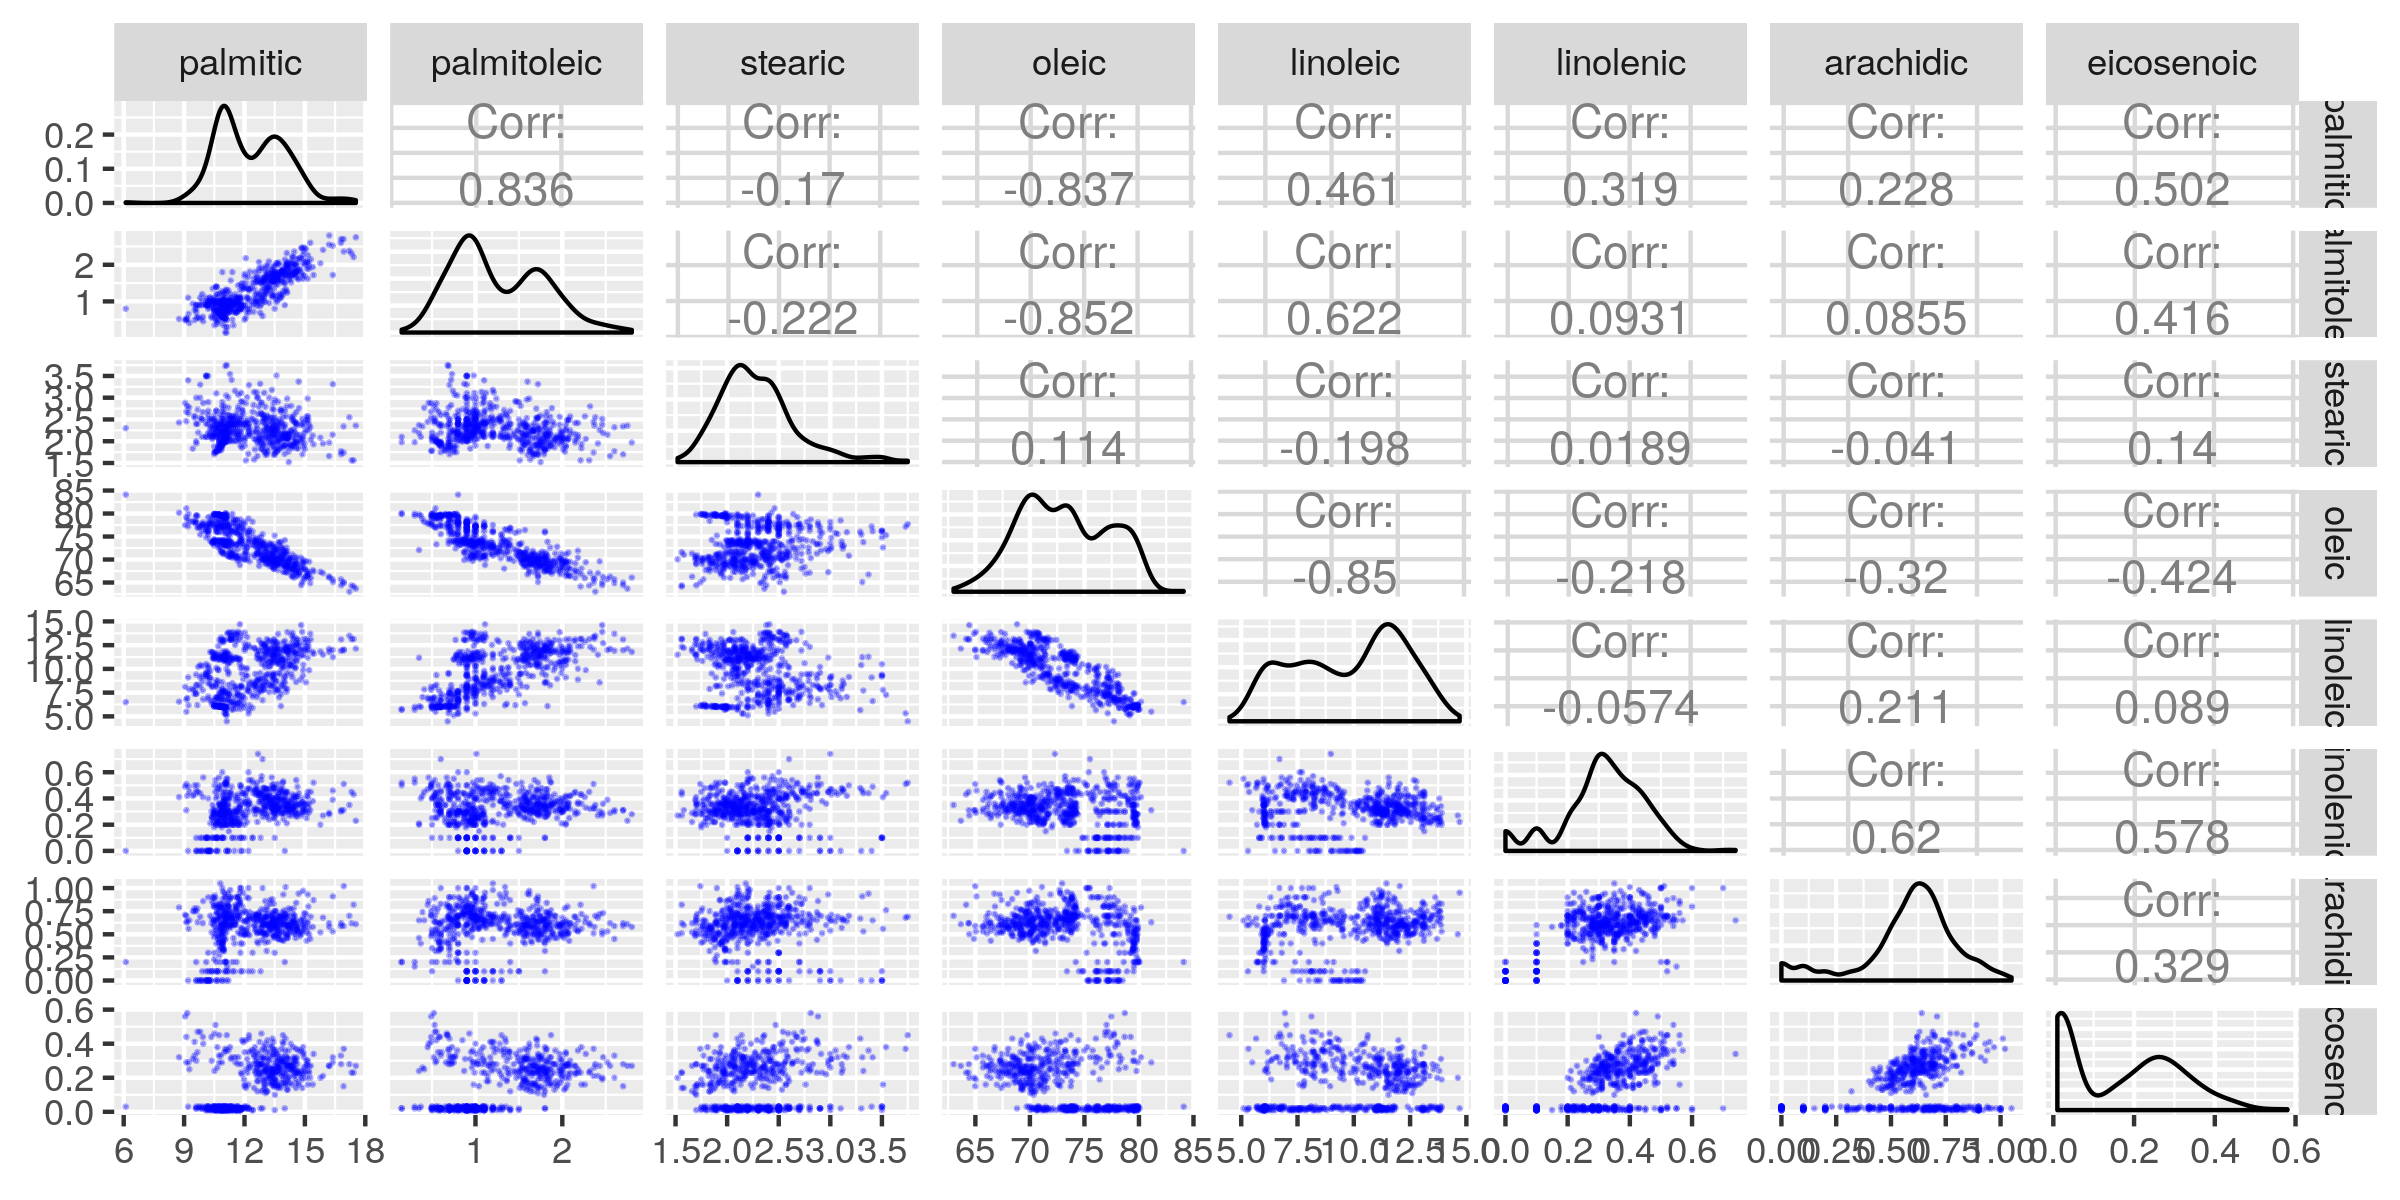

In [109]:
library(GGally)
options(repr.plot.height=4,repr.plot.width=8)
ggpairs(olive[,c("palmitic","palmitoleic","stearic","oleic","linoleic","linolenic","arachidic","eicosenoic")],
       lower = list(continuous = wrap("points", alpha = 0.3,size=0.1,color='blue'))
       )

In [110]:
#library(caret)
#standarized_model <- preProcess(olive, method = c("center", "scale"))
standarized_model <- caret::preProcess(olive, method = c("center", "scale"))

In [111]:
str(standarized_model)

List of 21
 $ dim              : int [1:2] 572 10
 $ bc               : NULL
 $ yj               : NULL
 $ et               : NULL
 $ invHyperbolicSine: NULL
 $ mean             : Named num [1:8] 12.32 1.26 2.29 73.12 9.81 ...
  ..- attr(*, "names")= chr [1:8] "palmitic" "palmitoleic" "stearic" "oleic" ...
 $ std              : Named num [1:8] 1.686 0.525 0.367 4.058 2.428 ...
  ..- attr(*, "names")= chr [1:8] "palmitic" "palmitoleic" "stearic" "oleic" ...
 $ ranges           : NULL
 $ rotation         : NULL
 $ method           :List of 3
  ..$ center: chr [1:8] "palmitic" "palmitoleic" "stearic" "oleic" ...
  ..$ scale : chr [1:8] "palmitic" "palmitoleic" "stearic" "oleic" ...
  ..$ ignore: chr [1:2] "region" "area"
 $ thresh           : num 0.95
 $ pcaComp          : NULL
 $ numComp          : NULL
 $ ica              : NULL
 $ wildcards        :List of 2
  ..$ PCA: chr(0) 
  ..$ ICA: chr(0) 
 $ k                : num 5
 $ knnSummary       :function (x, ...)  
 $ bagImp           : 

In [112]:
olive_standarized=predict(standarized_model,olive)

In [113]:
colMeans(olive_standarized[,3:10])

palmitic   palmitoleic       stearic         oleic      linoleic 
 2.073419e-16  1.044473e-16 -3.448218e-17  7.326841e-16 -2.305787e-16 
    linolenic     arachidic    eicosenoic 
 1.499626e-16 -2.742804e-17 -2.127766e-17

In [114]:
sapply(olive_standarized[,3:10],sd)

palmitic palmitoleic     stearic       oleic    linoleic   linolenic 
          1           1           1           1           1           1 
  arachidic  eicosenoic 
          1           1

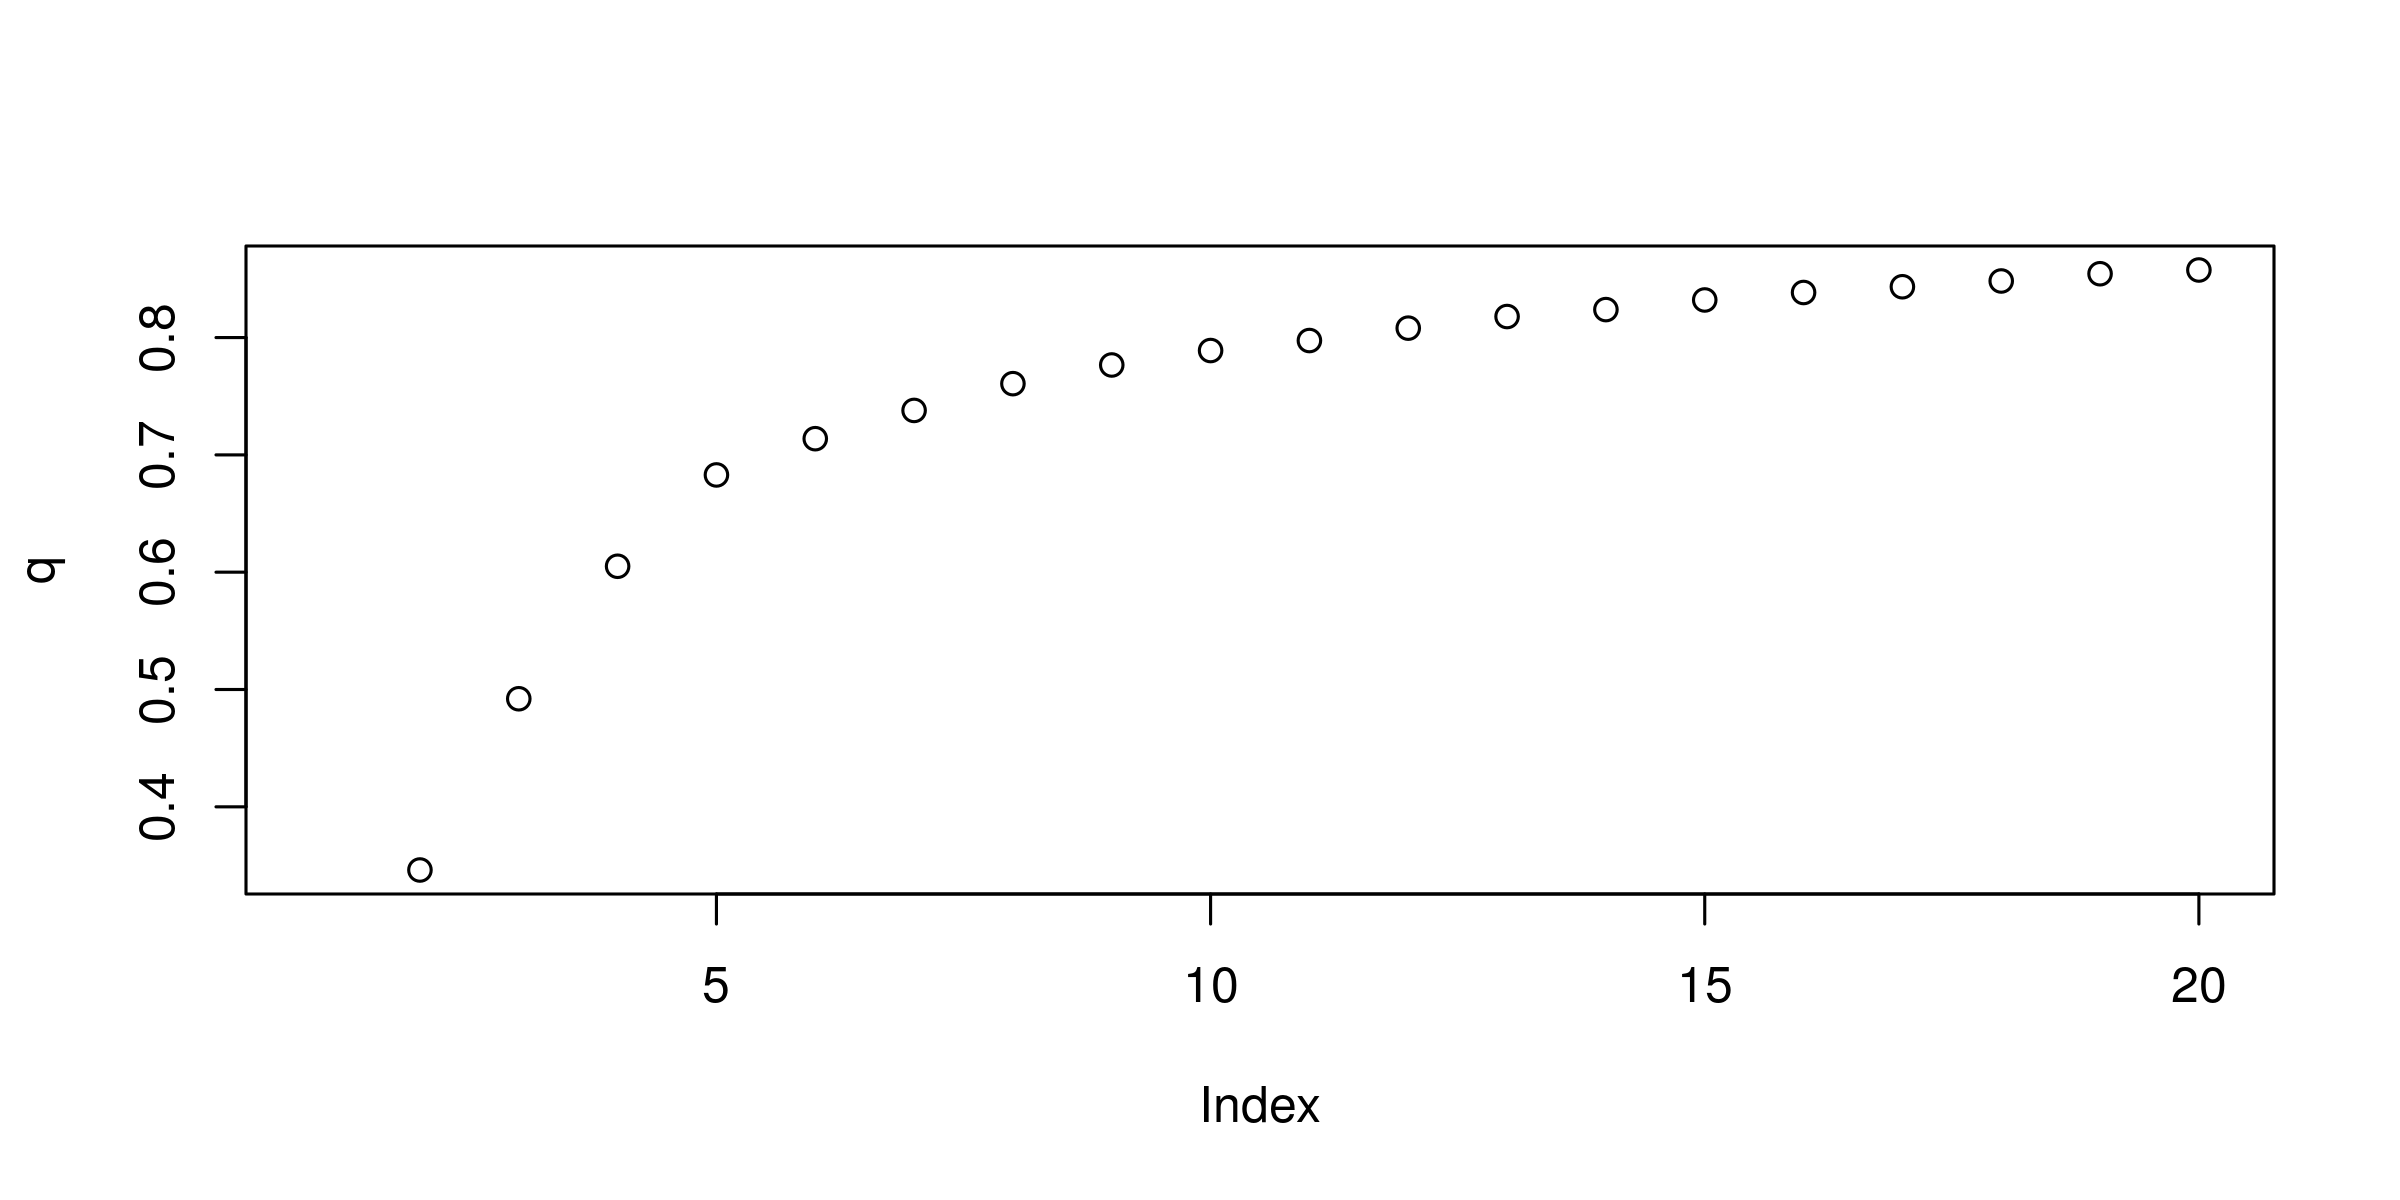

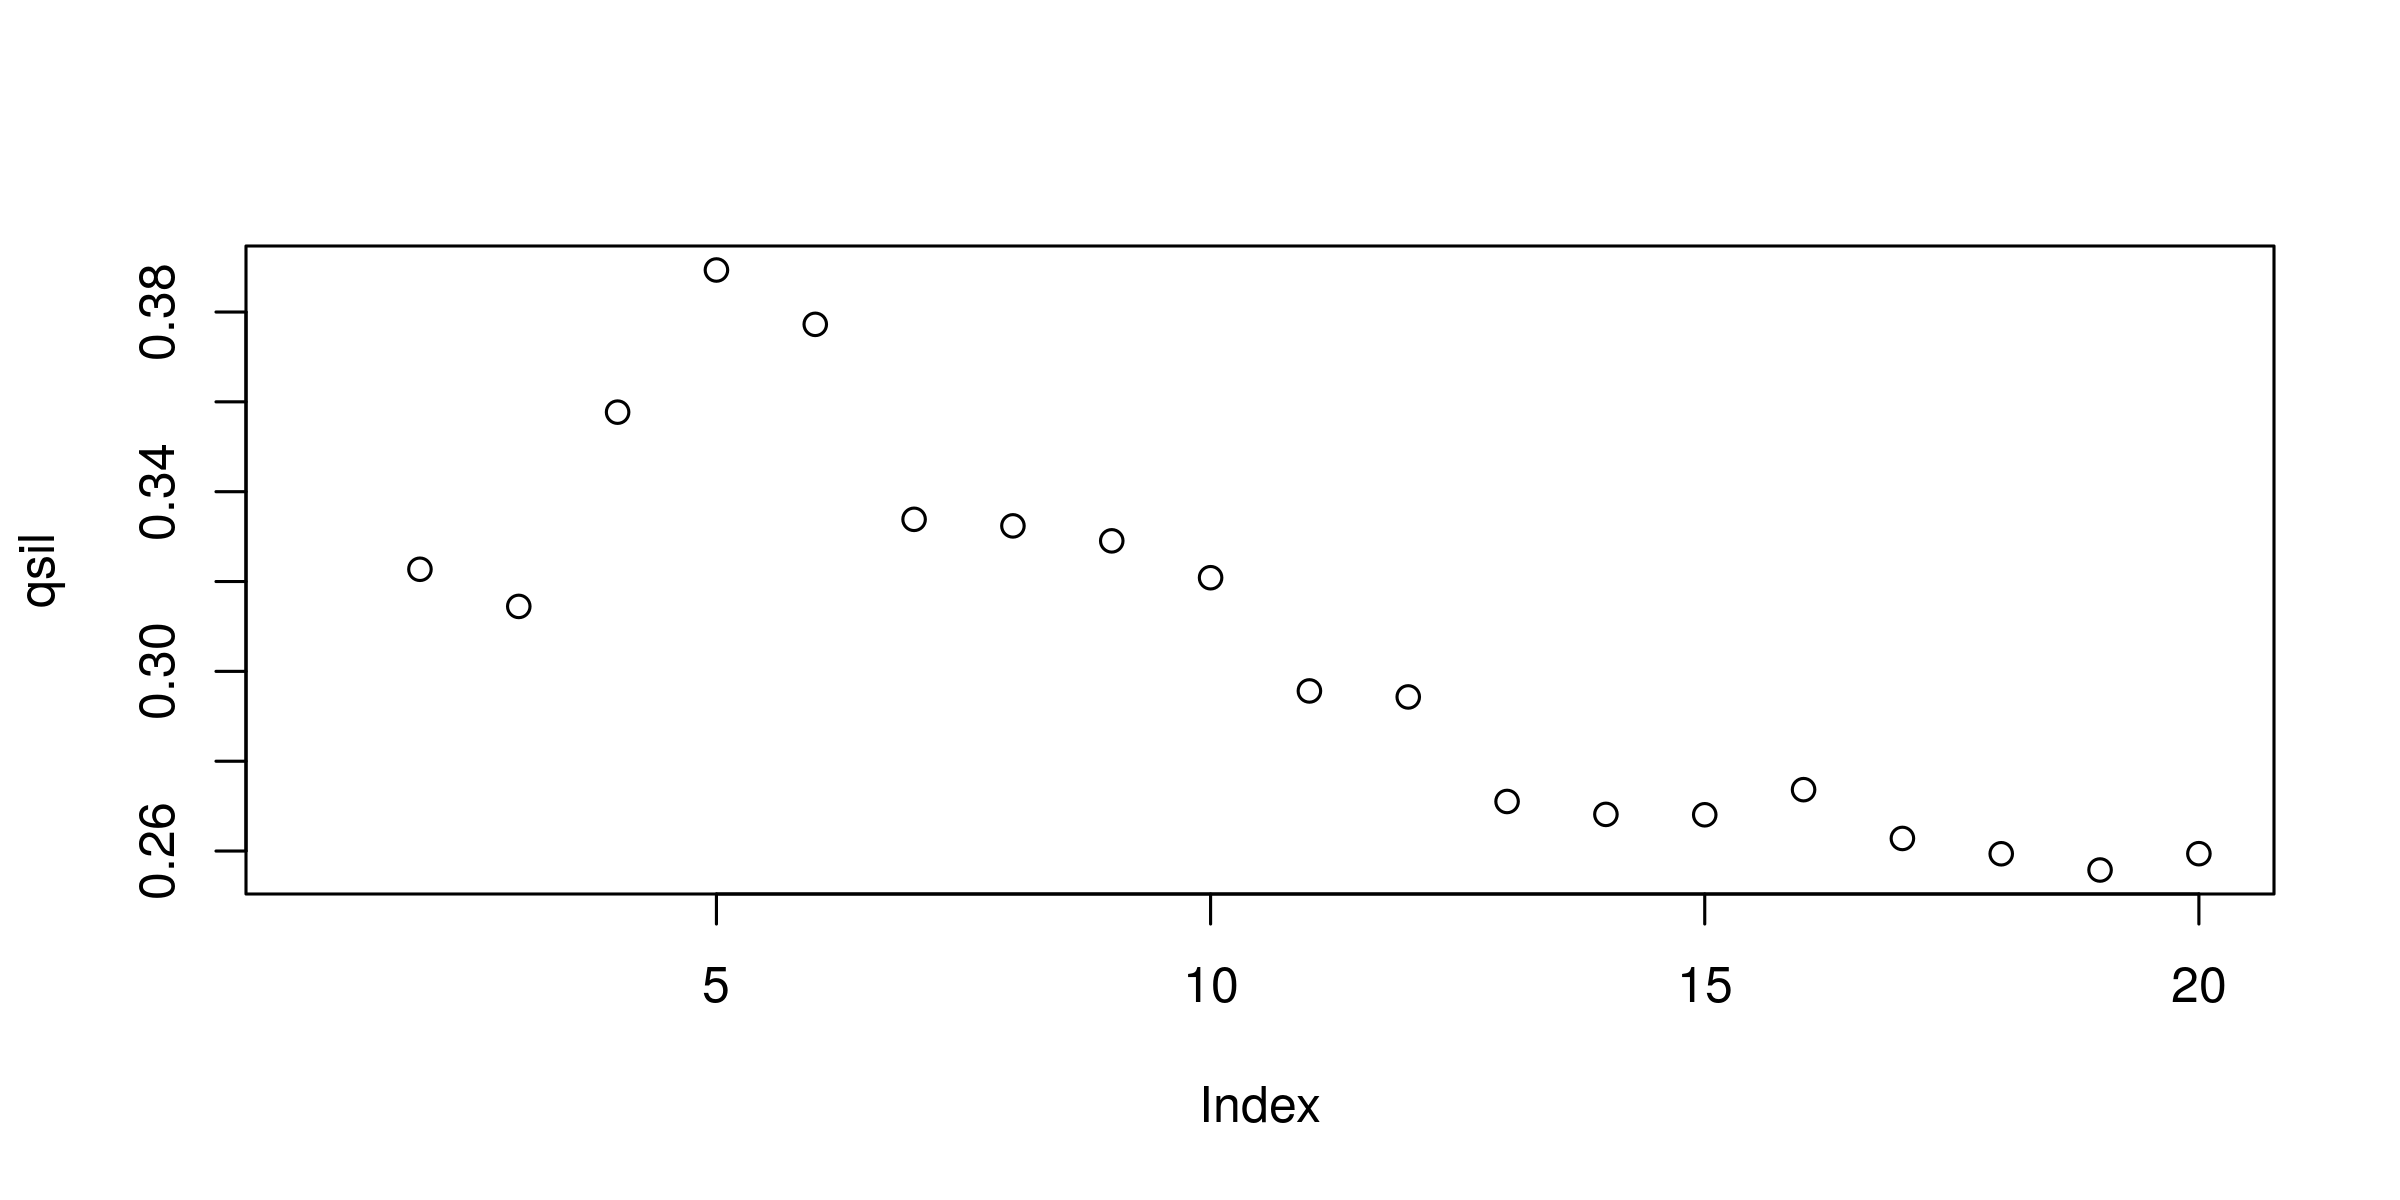

In [115]:
q<-c()
qsil<-c()
data_olive<-olive_standarized[,3:10]
dist_olive<-dist(data_olive)
for (k in 2:20){
    myclust<-kmeans(data_olive,centers=k,nstart=30)
    q[k]<-myclust$betweenss/myclust$totss
    
    ss<-silhouette(myclust$cluster, dist_olive)    
    qsil[k]<-mean(ss[, "sil_width"])
}
plot(q)
plot(qsil)

In [129]:
k<-5
myclust<-kmeans(olive_standarized[,3:10],centers=k,nstart=30)
olive$cluster=factor(myclust$cluster)
summary(olive)

            region                 area        palmitic      palmitoleic    
 Northern Italy:151   South-Apulia   :206   Min.   : 6.10   Min.   :0.1500  
 Sardinia      : 98   Inland-Sardinia: 65   1st Qu.:10.95   1st Qu.:0.8775  
 Southern Italy:323   Calabria       : 56   Median :12.01   Median :1.1000  
                      Umbria         : 51   Mean   :12.32   Mean   :1.2609  
                      East-Liguria   : 50   3rd Qu.:13.60   3rd Qu.:1.6925  
                      West-Liguria   : 50   Max.   :17.53   Max.   :2.8000  
                      (Other)        : 94                                   
    stearic          oleic          linoleic        linolenic     
 Min.   :1.520   Min.   :63.00   Min.   : 4.480   Min.   :0.0000  
 1st Qu.:2.050   1st Qu.:70.00   1st Qu.: 7.707   1st Qu.:0.2600  
 Median :2.230   Median :73.03   Median :10.300   Median :0.3300  
 Mean   :2.289   Mean   :73.12   Mean   : 9.805   Mean   :0.3189  
 3rd Qu.:2.490   3rd Qu.:76.80   3rd Qu.:11.807  

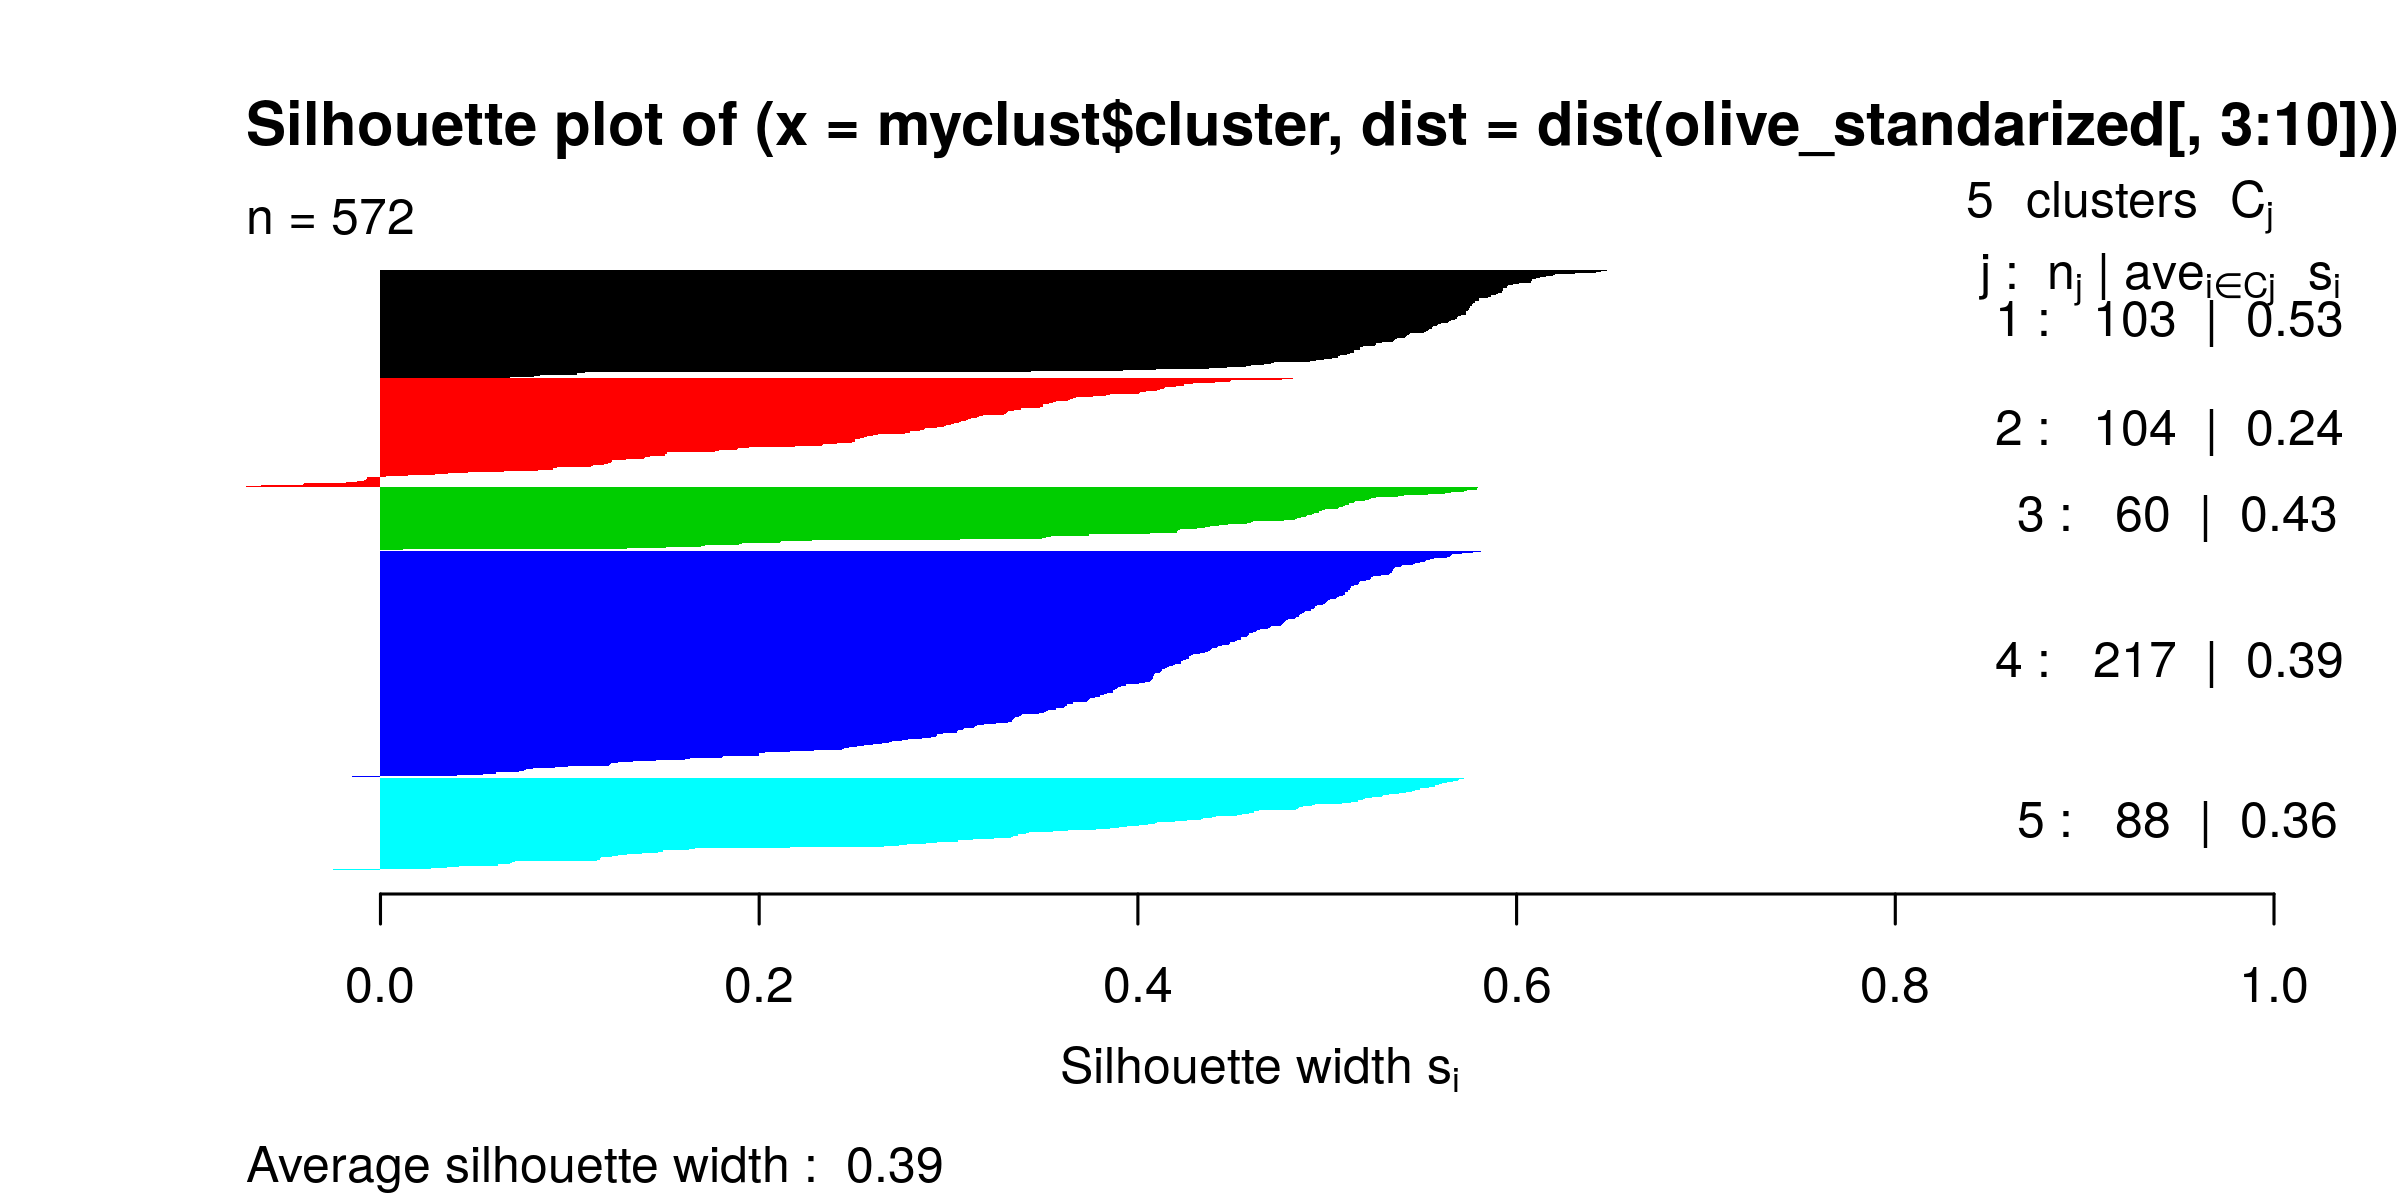

In [130]:
ss<-silhouette(myclust$cluster, dist(olive_standarized[,3:10]))
plot(ss,col=1:k,border=NA)

In [131]:
library(dplyr)
# summary(filter(olive,cluster==1))
olive %>% filter(cluster==1) %>% summary()

            region                area       palmitic      palmitoleic    
 Northern Italy: 5   Inland-Sardinia:65   Min.   :10.30   Min.   :0.3500  
 Sardinia      :98   Coast-Sardinia :33   1st Qu.:10.87   1st Qu.:0.8850  
 Southern Italy: 0   East-Liguria   : 5   Median :11.10   Median :0.9600  
                     Calabria       : 0   Mean   :11.14   Mean   :0.9661  
                     North-Apulia   : 0   3rd Qu.:11.40   3rd Qu.:1.0400  
                     Sicily         : 0   Max.   :12.13   Max.   :1.3500  
                     (Other)        : 0                                   
    stearic          oleic          linoleic       linolenic     
 Min.   :1.900   Min.   :68.82   Min.   : 7.40   Min.   :0.1500  
 1st Qu.:2.120   1st Qu.:71.44   1st Qu.:11.09   1st Qu.:0.2300  
 Median :2.220   Median :73.35   Median :11.42   Median :0.2700  
 Mean   :2.264   Mean   :72.83   Mean   :11.76   Mean   :0.2752  
 3rd Qu.:2.400   3rd Qu.:73.86   3rd Qu.:13.05   3rd Qu.:0.3050  
 Max

In [132]:
olive %>% filter(cluster==2) %>% summary()

            region               area       palmitic      palmitoleic    
 Northern Italy: 5   Calabria      :52   Min.   : 8.75   Min.   :0.3900  
 Sardinia      : 0   Sicily        :26   1st Qu.:11.08   1st Qu.:0.6975  
 Southern Italy:99   North-Apulia  :19   Median :12.48   Median :1.0050  
                     East-Liguria  : 5   Mean   :12.09   Mean   :0.9779  
                     South-Apulia  : 2   3rd Qu.:13.04   3rd Qu.:1.2025  
                     Coast-Sardinia: 0   Max.   :14.69   Max.   :1.8300  
                     (Other)       : 0                                   
    stearic          oleic          linoleic        linolenic     
 Min.   :1.890   Min.   :66.75   Min.   : 4.480   Min.   :0.3000  
 1st Qu.:2.388   1st Qu.:72.73   1st Qu.: 7.190   1st Qu.:0.4200  
 Median :2.590   Median :73.94   Median : 7.940   Median :0.4500  
 Mean   :2.648   Mean   :74.58   Mean   : 7.880   Mean   :0.4583  
 3rd Qu.:2.873   3rd Qu.:76.83   3rd Qu.: 8.562   3rd Qu.:0.4900  
 Max. 

In [133]:
olive %>% filter(cluster==3) %>% summary()

            region                area       palmitic      palmitoleic   
 Northern Italy:60   West-Liguria   :50   Min.   : 6.10   Min.   :0.700  
 Sardinia      : 0   East-Liguria   :10   1st Qu.:10.10   1st Qu.:0.900  
 Southern Italy: 0   Calabria       : 0   Median :10.55   Median :1.000  
                     Coast-Sardinia : 0   Mean   :10.68   Mean   :1.038  
                     Inland-Sardinia: 0   3rd Qu.:11.12   3rd Qu.:1.100  
                     North-Apulia   : 0   Max.   :14.00   Max.   :1.800  
                     (Other)        : 0                                  
    stearic          oleic          linoleic        linolenic   
 Min.   :2.000   Min.   :73.40   Min.   : 5.300   Min.   :0.00  
 1st Qu.:2.275   1st Qu.:76.10   1st Qu.: 7.850   1st Qu.:0.00  
 Median :2.500   Median :77.10   Median : 8.650   Median :0.05  
 Mean   :2.555   Mean   :77.01   Mean   : 8.573   Mean   :0.05  
 3rd Qu.:2.725   3rd Qu.:78.03   3rd Qu.: 9.625   3rd Qu.:0.10  
 Max.   :3.500   M

In [134]:
olive %>% filter(cluster==4) %>% summary()

            region                 area        palmitic      palmitoleic   
 Northern Italy:  0   South-Apulia   :204   Min.   :11.68   Min.   :1.290  
 Sardinia      :  0   Sicily         : 10   1st Qu.:13.30   1st Qu.:1.630  
 Southern Italy:217   Calabria       :  3   Median :13.87   Median :1.780  
                      Coast-Sardinia :  0   Mean   :13.98   Mean   :1.831  
                      East-Liguria   :  0   3rd Qu.:14.53   3rd Qu.:1.990  
                      Inland-Sardinia:  0   Max.   :17.53   Max.   :2.800  
                      (Other)        :  0                                  
    stearic          oleic          linoleic       linolenic     
 Min.   :1.520   Min.   :63.00   Min.   : 8.23   Min.   :0.2000  
 1st Qu.:1.930   1st Qu.:68.04   1st Qu.:10.86   1st Qu.:0.3100  
 Median :2.090   Median :69.38   Median :11.80   Median :0.3400  
 Mean   :2.124   Mean   :69.14   Mean   :11.57   Mean   :0.3498  
 3rd Qu.:2.290   3rd Qu.:70.32   3rd Qu.:12.33   3rd Qu.:0.390

In [135]:
olive %>% filter(cluster==5) %>% summary()

            region                area       palmitic      palmitoleic    
 Northern Italy:81   Umbria         :51   Min.   : 9.11   Min.   :0.1500  
 Sardinia      : 0   East-Liguria   :30   1st Qu.:10.75   1st Qu.:0.5800  
 Southern Italy: 7   North-Apulia   : 6   Median :10.95   Median :0.7000  
                     Calabria       : 1   Mean   :10.99   Mean   :0.6878  
                     Coast-Sardinia : 0   3rd Qu.:11.20   3rd Qu.:0.8000  
                     Inland-Sardinia: 0   Max.   :12.20   Max.   :1.3600  
                     (Other)        : 0                                   
    stearic          oleic          linoleic       linolenic     
 Min.   :1.700   Min.   :76.10   Min.   :5.100   Min.   :0.1000  
 1st Qu.:1.900   1st Qu.:78.15   1st Qu.:6.000   1st Qu.:0.2425  
 Median :2.035   Median :79.45   Median :6.050   Median :0.3000  
 Mean   :2.117   Mean   :78.87   Mean   :6.288   Mean   :0.3124  
 3rd Qu.:2.322   3rd Qu.:79.61   3rd Qu.:6.700   3rd Qu.:0.3900  
 Max

#### PAM (Partitioning Around Medoids) - k-medoids

Se basa en medoides. Es similar al kmeans pero en lugar de usar centroides se basa en medoides El centroide o centro geométrico es el punto resultante de la media aritmética de la posición de todos los puntos.


```
1 - elige k muestras al azar entre todas las muestras (estos son los k medoides iniciales)
2 - asigna el elemento al medoide más cercano
3 - recalcular medoides:
3.1 - Calcula la suma de la distancia de cada candidato a medoide con el resto de los puntos.
3.2 - Elije como medoide el punto cuya suma de las distancias sea menor.
4 - Repetir desde 2 mientras los medoides se sigan actualizando y el error siga disminuyendo.
```

El ligeramente más robusto que el kmeans porque este depende de la suma de elementos, no de la suma al cuadrado.

Funciona con definiciones de medidas arbitrarias.

https://www.rdocumentation.org/packages/cluster/versions/2.1.0/topics/pam

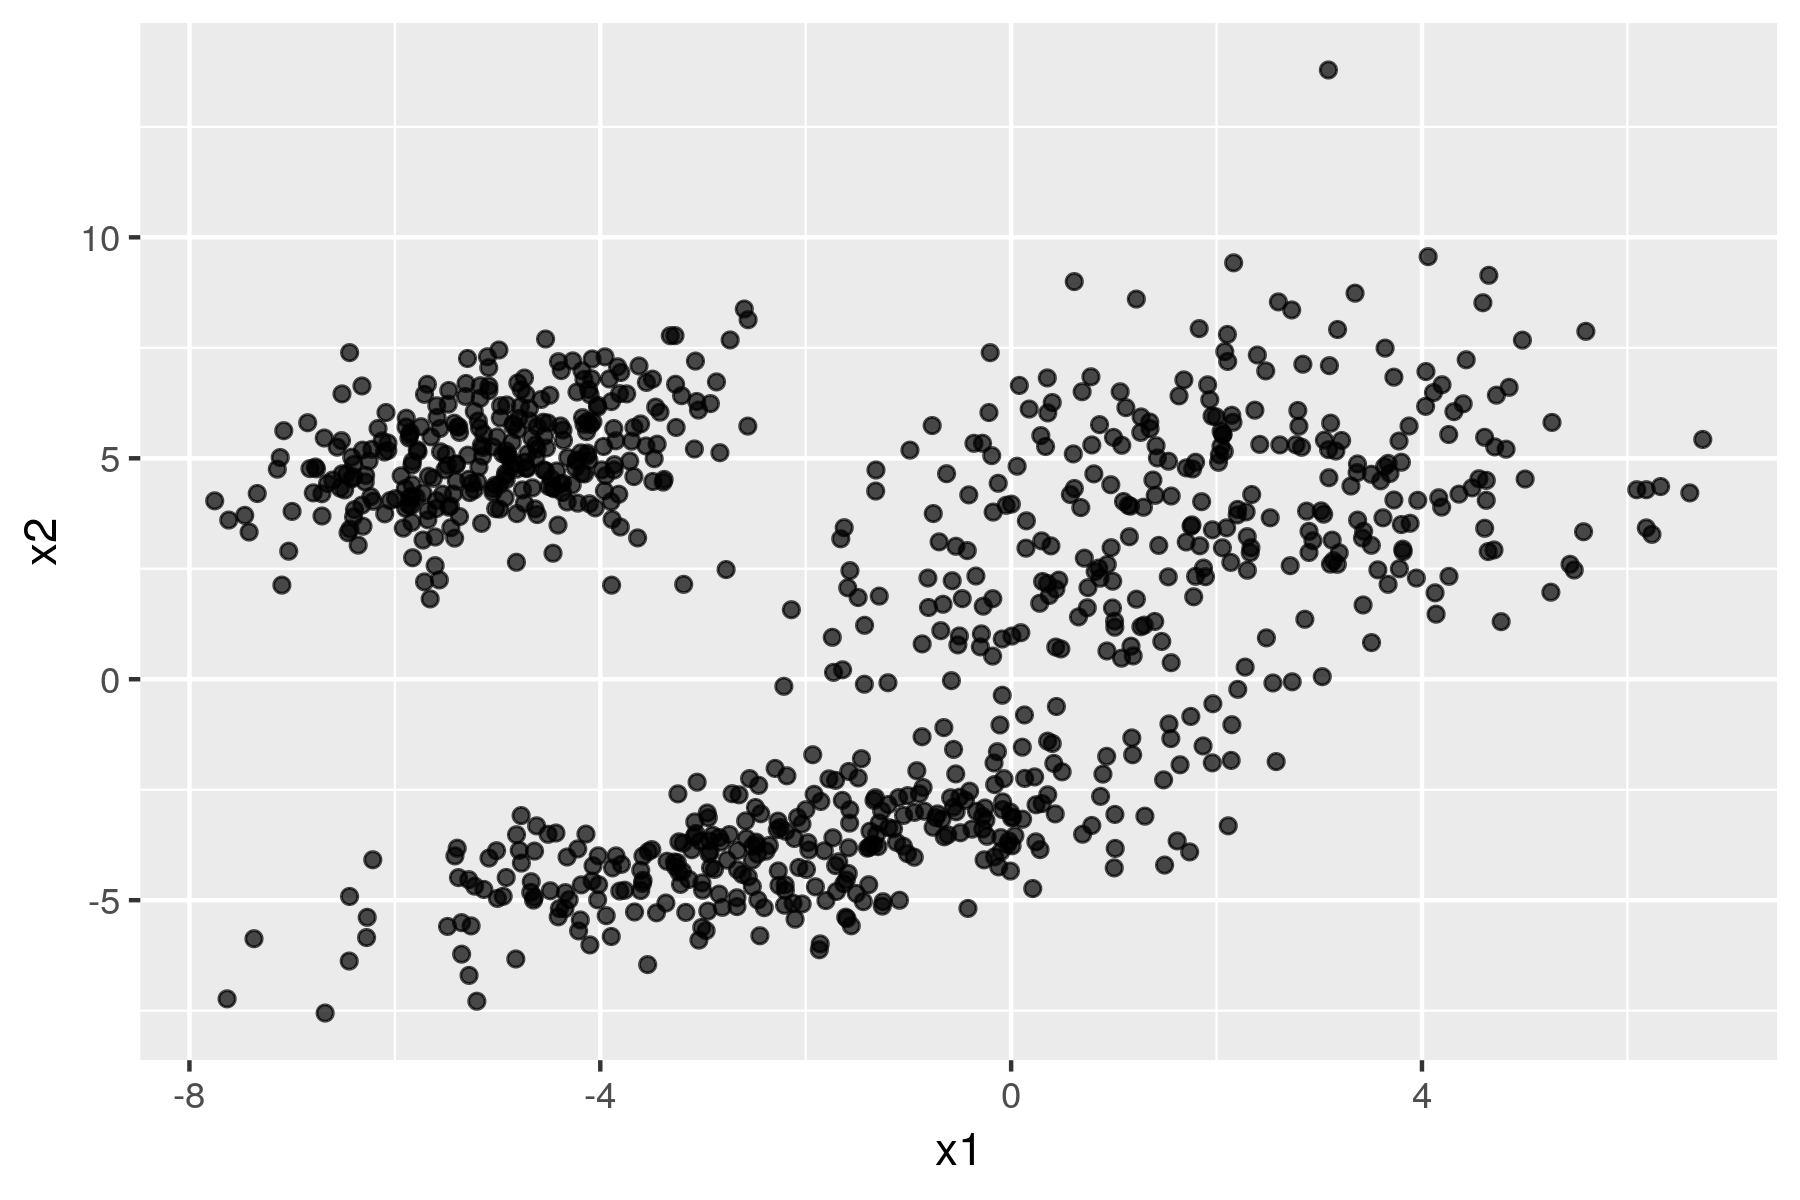

In [1]:
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 300)


N<-300
x1<-c(rnorm(N,mean=2,sd=2),rnorm(N,mean=-2,sd=2),rnorm(N,mean=-5,sd=1))
x2<-c(0.4*x1+c(rnorm(N,mean=3,sd=2),rnorm(N,mean=-3,sd=1),rnorm(N,mean=7,sd=1)))
df<-data.frame(x1,x2)

library(ggplot2)
ggplot(data=df, aes(x=x1,y=x2))+geom_point(alpha=0.7)

       x1                x2         group  
 Min.   :-7.7540   Min.   :-7.554   1:280  
 1st Qu.:-4.6257   1st Qu.:-3.044   2:312  
 Median :-2.1987   Median : 3.407   3:308  
 Mean   :-1.7605   Mean   : 1.696          
 3rd Qu.: 0.8621   3rd Qu.: 5.157          
 Max.   : 6.7338   Max.   :13.787          

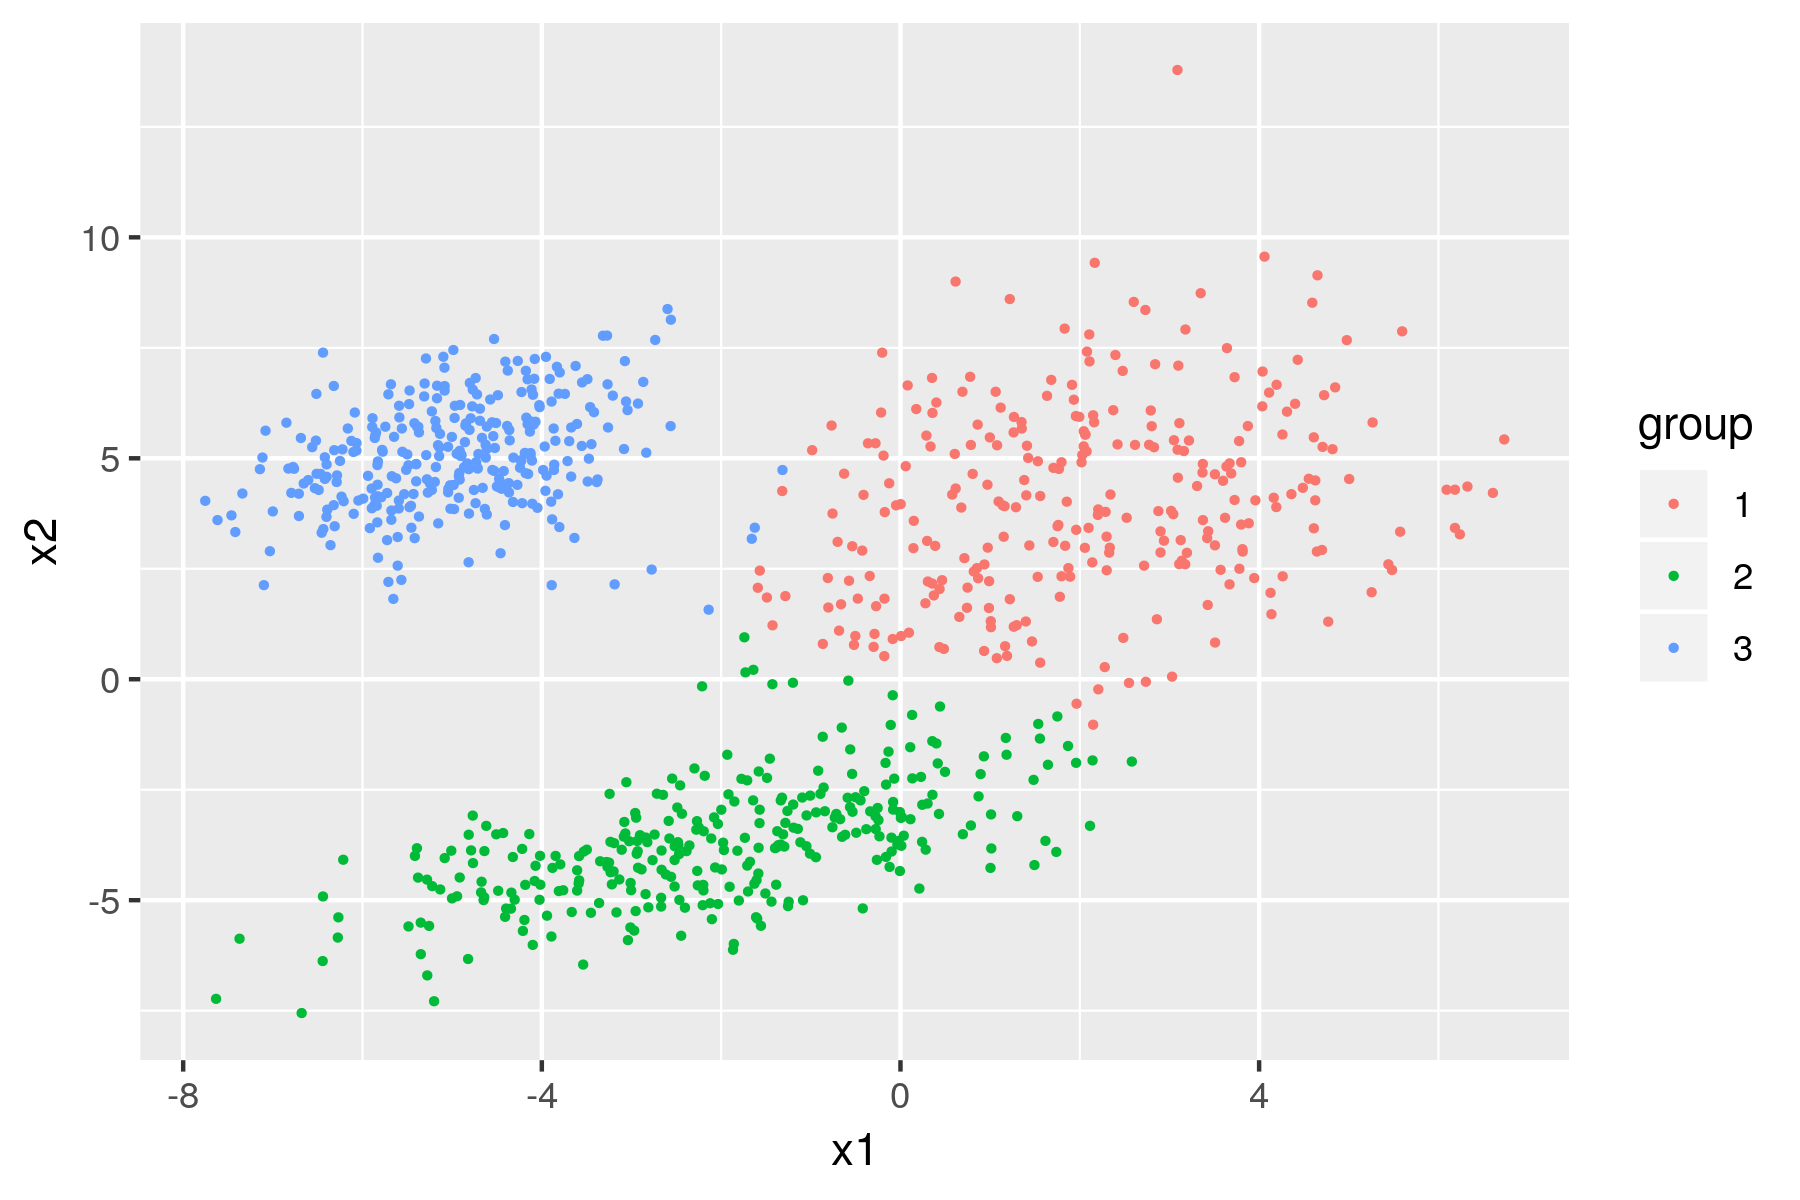

In [2]:
library(cluster)
cl<-factor(pam(df,k=3, cluster.only=TRUE))

clustered<-cbind(df,group=cl)
summary(clustered)
ggplot(data=clustered,aes(x=x1,y=x2,color=group))+geom_point(size=0.5)

       x1                x2         group  
 Min.   :-7.7540   Min.   :-7.554   1:285  
 1st Qu.:-4.6257   1st Qu.:-3.044   2:311  
 Median :-2.1987   Median : 3.407   3:304  
 Mean   :-1.7605   Mean   : 1.696          
 3rd Qu.: 0.8621   3rd Qu.: 5.157          
 Max.   : 6.7338   Max.   :13.787          

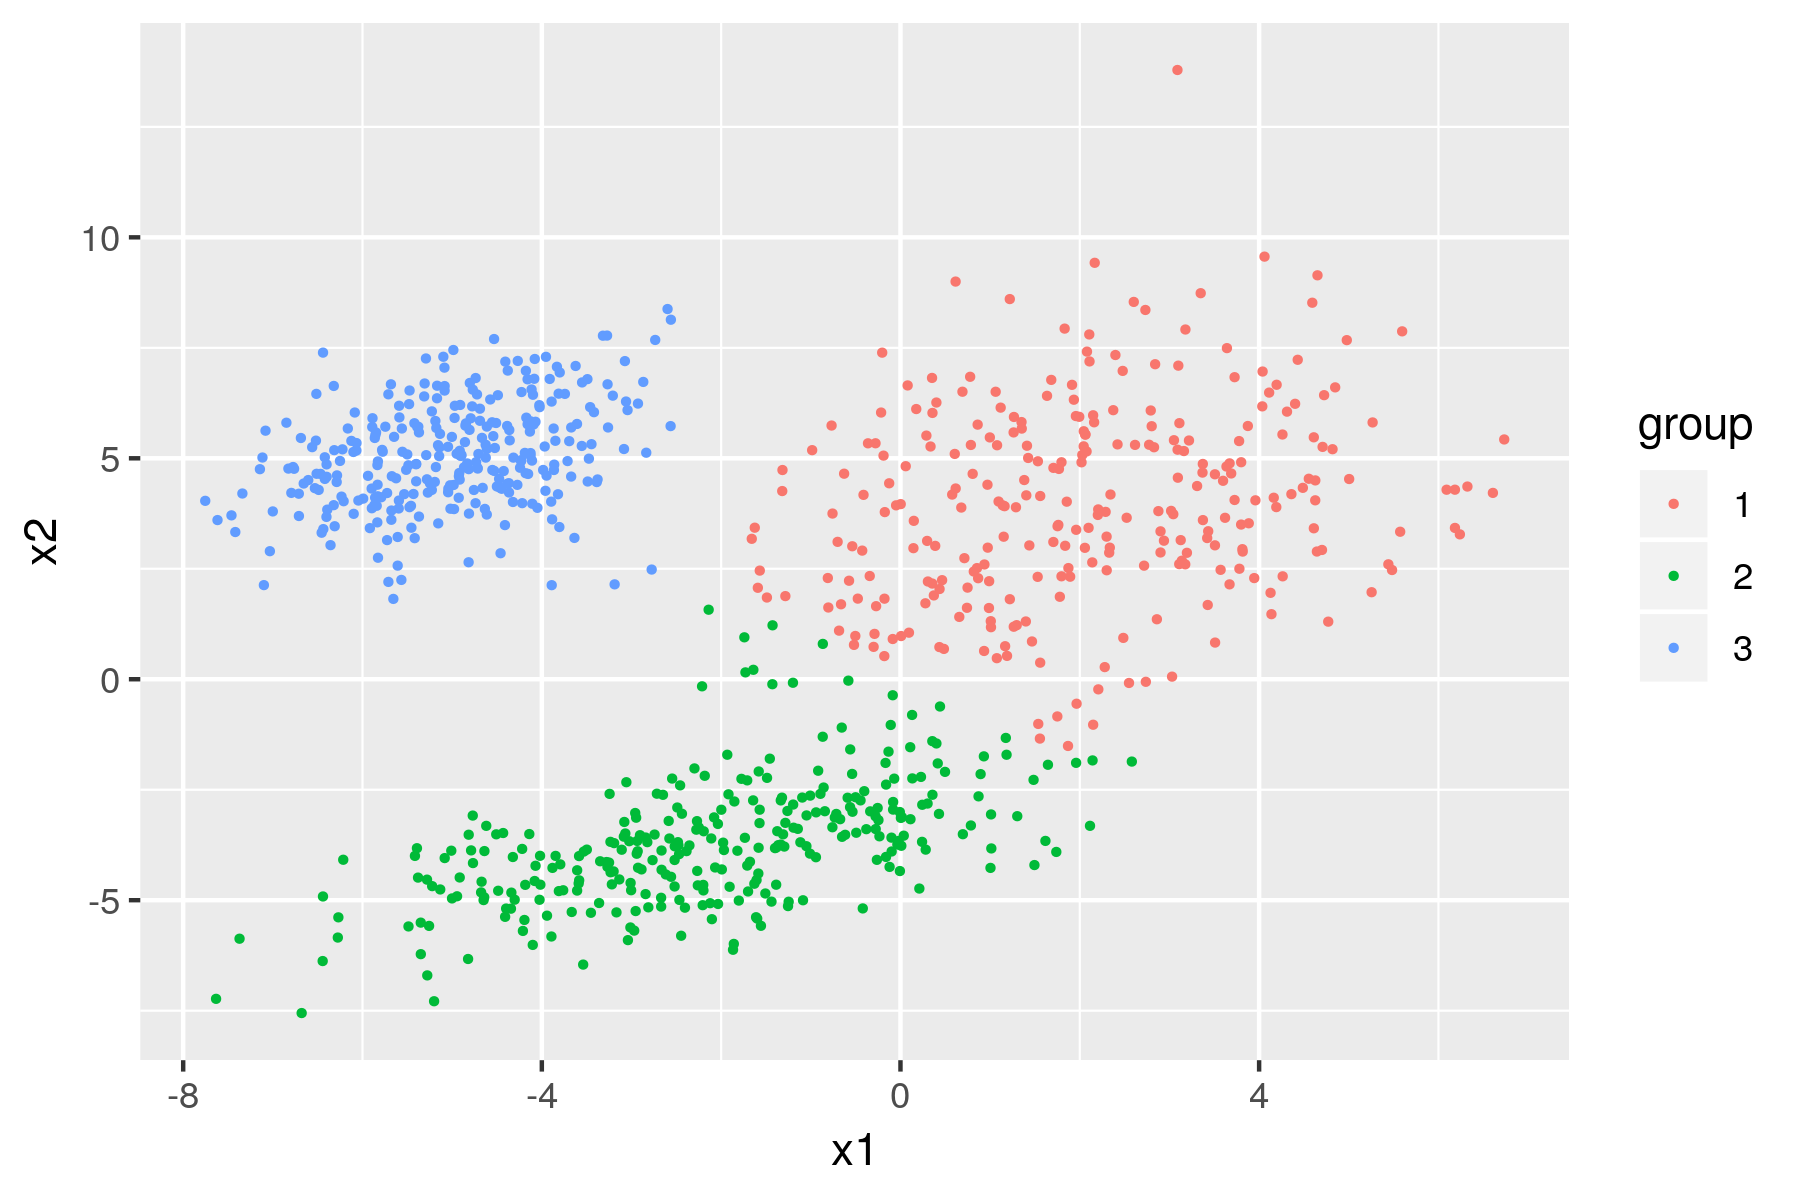

In [3]:
cl<-factor(pam(df,k=3, metric="manhattan", cluster.only=TRUE))

clustered<-cbind(df,group=cl)
summary(clustered)
ggplot(data=clustered,aes(x=x1,y=x2,color=group))+geom_point(size=0.5)

In [4]:
pr<-pam(df,k=3, metric="manhattan")
str(pr)

List of 10
 $ medoids   : num [1:3, 1:2] 1.85 -1.98 -4.91 4.02 -3.7 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:2] "x1" "x2"
 $ id.med    : int [1:3] 171 436 618
 $ clustering: int [1:900] 1 1 1 1 1 1 2 3 1 1 ...
 $ objective : Named num [1:2] 3.23 2.55
  ..- attr(*, "names")= chr [1:2] "build" "swap"
 $ isolation : Factor w/ 3 levels "no","L","L*": 1 1 1
  ..- attr(*, "names")= chr [1:3] "1" "2" "3"
 $ clusinfo  : num [1:3, 1:5] 285 311 304 11 9.19 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:5] "size" "max_diss" "av_diss" "diameter" ...
 $ silinfo   :List of 3
  ..$ widths         : num [1:900, 1:3] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:900] "271" "13" "258" "295" ...
  .. .. ..$ : chr [1:3] "cluster" "neighbor" "sil_width"
  ..$ clus.avg.widths: num [1:3] 0.459 0.629 0.72
  ..$ avg.width      : num 0.606
 $ diss      : NULL
 $ call      : language pam(x = df, k = 3, metric = "man

In [5]:
silhouette(pr)

    cluster neighbor   sil_width
271       1        3  0.64235249
13        1        3  0.64165643
258       1        3  0.64163045
295       1        3  0.64132773
159       1        3  0.64124486
222       1        3  0.64096204
291       1        3  0.64048619
10        1        3  0.63955729
161       1        3  0.63911744
98        1        3  0.63774209
116       1        3  0.63770382
126       1        3  0.63617603
67        1        3  0.63597755
185       1        3  0.63573980
204       1        3  0.63448509
112       1        3  0.63332011
110       1        3  0.63278904
267       1        3  0.63217768
95        1        3  0.63193065
5         1        3  0.63173765
129       1        3  0.63163906
231       1        3  0.63062642
121       1        3  0.63049427
293       1        3  0.63012624
249       1        3  0.62986320
166       1        3  0.62952580
94        1        3  0.62884779
270       1        2  0.62724613
284       1        3  0.62717189
196       

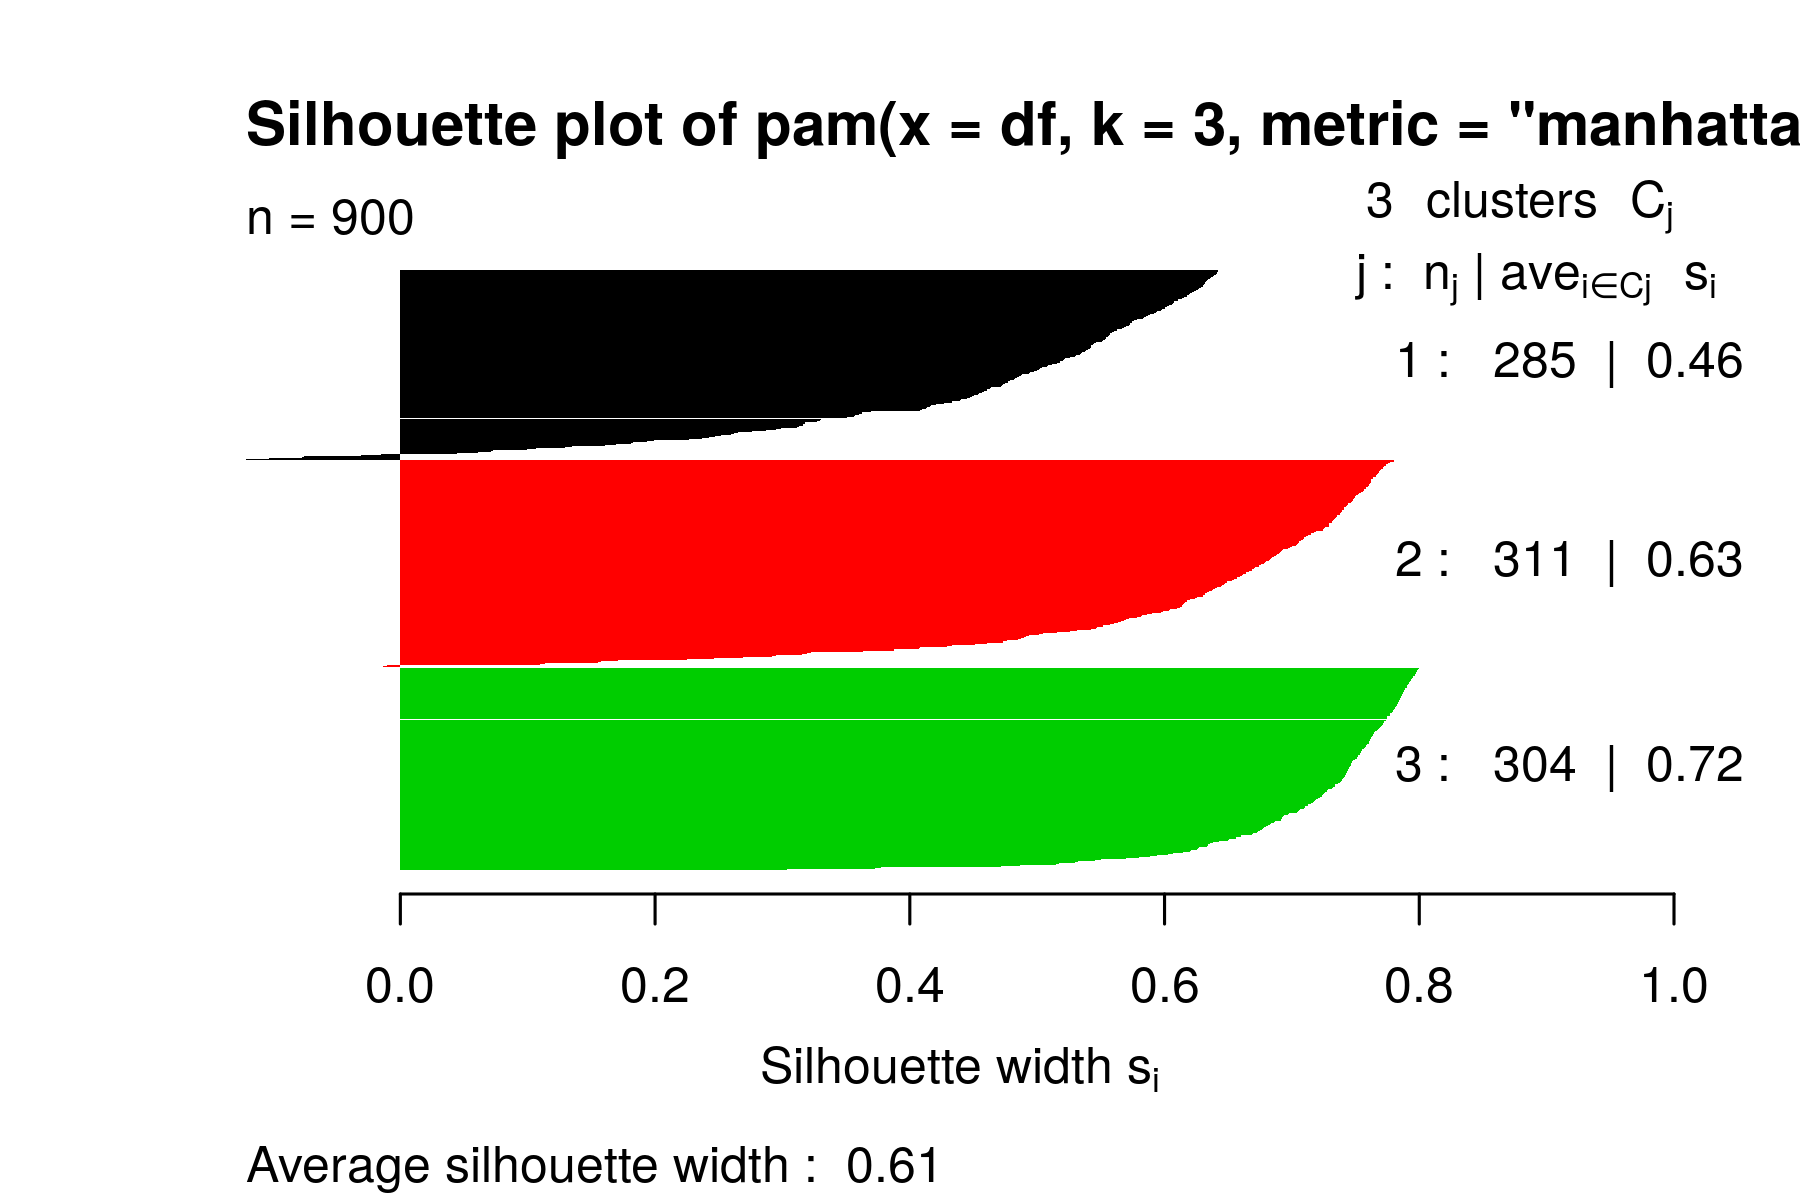

In [6]:
sil<-silhouette(pr)
plot(sil,col=1:3,border=NA)

In [7]:
sil

    cluster neighbor   sil_width
271       1        3  0.64235249
13        1        3  0.64165643
258       1        3  0.64163045
295       1        3  0.64132773
159       1        3  0.64124486
222       1        3  0.64096204
291       1        3  0.64048619
10        1        3  0.63955729
161       1        3  0.63911744
98        1        3  0.63774209
116       1        3  0.63770382
126       1        3  0.63617603
67        1        3  0.63597755
185       1        3  0.63573980
204       1        3  0.63448509
112       1        3  0.63332011
110       1        3  0.63278904
267       1        3  0.63217768
95        1        3  0.63193065
5         1        3  0.63173765
129       1        3  0.63163906
231       1        3  0.63062642
121       1        3  0.63049427
293       1        3  0.63012624
249       1        3  0.62986320
166       1        3  0.62952580
94        1        3  0.62884779
270       1        2  0.62724613
284       1        3  0.62717189
196       

In [10]:
df[as.numeric(rownames(sil)[sil[,"sil_width"]>=0]),"bad"]<-0.5
df[as.numeric(rownames(sil)[sil[,"sil_width"]<0]),"bad"]<-2
#df$bad<-factor(df$bad)

       x1                x2              bad         group  
 Min.   :-7.7540   Min.   :-7.554   Min.   :0.5000   1:285  
 1st Qu.:-4.6257   1st Qu.:-3.044   1st Qu.:0.5000   2:311  
 Median :-2.1987   Median : 3.407   Median :0.5000   3:304  
 Mean   :-1.7605   Mean   : 1.696   Mean   :0.5183          
 3rd Qu.: 0.8621   3rd Qu.: 5.157   3rd Qu.:0.5000          
 Max.   : 6.7338   Max.   :13.787   Max.   :2.0000          

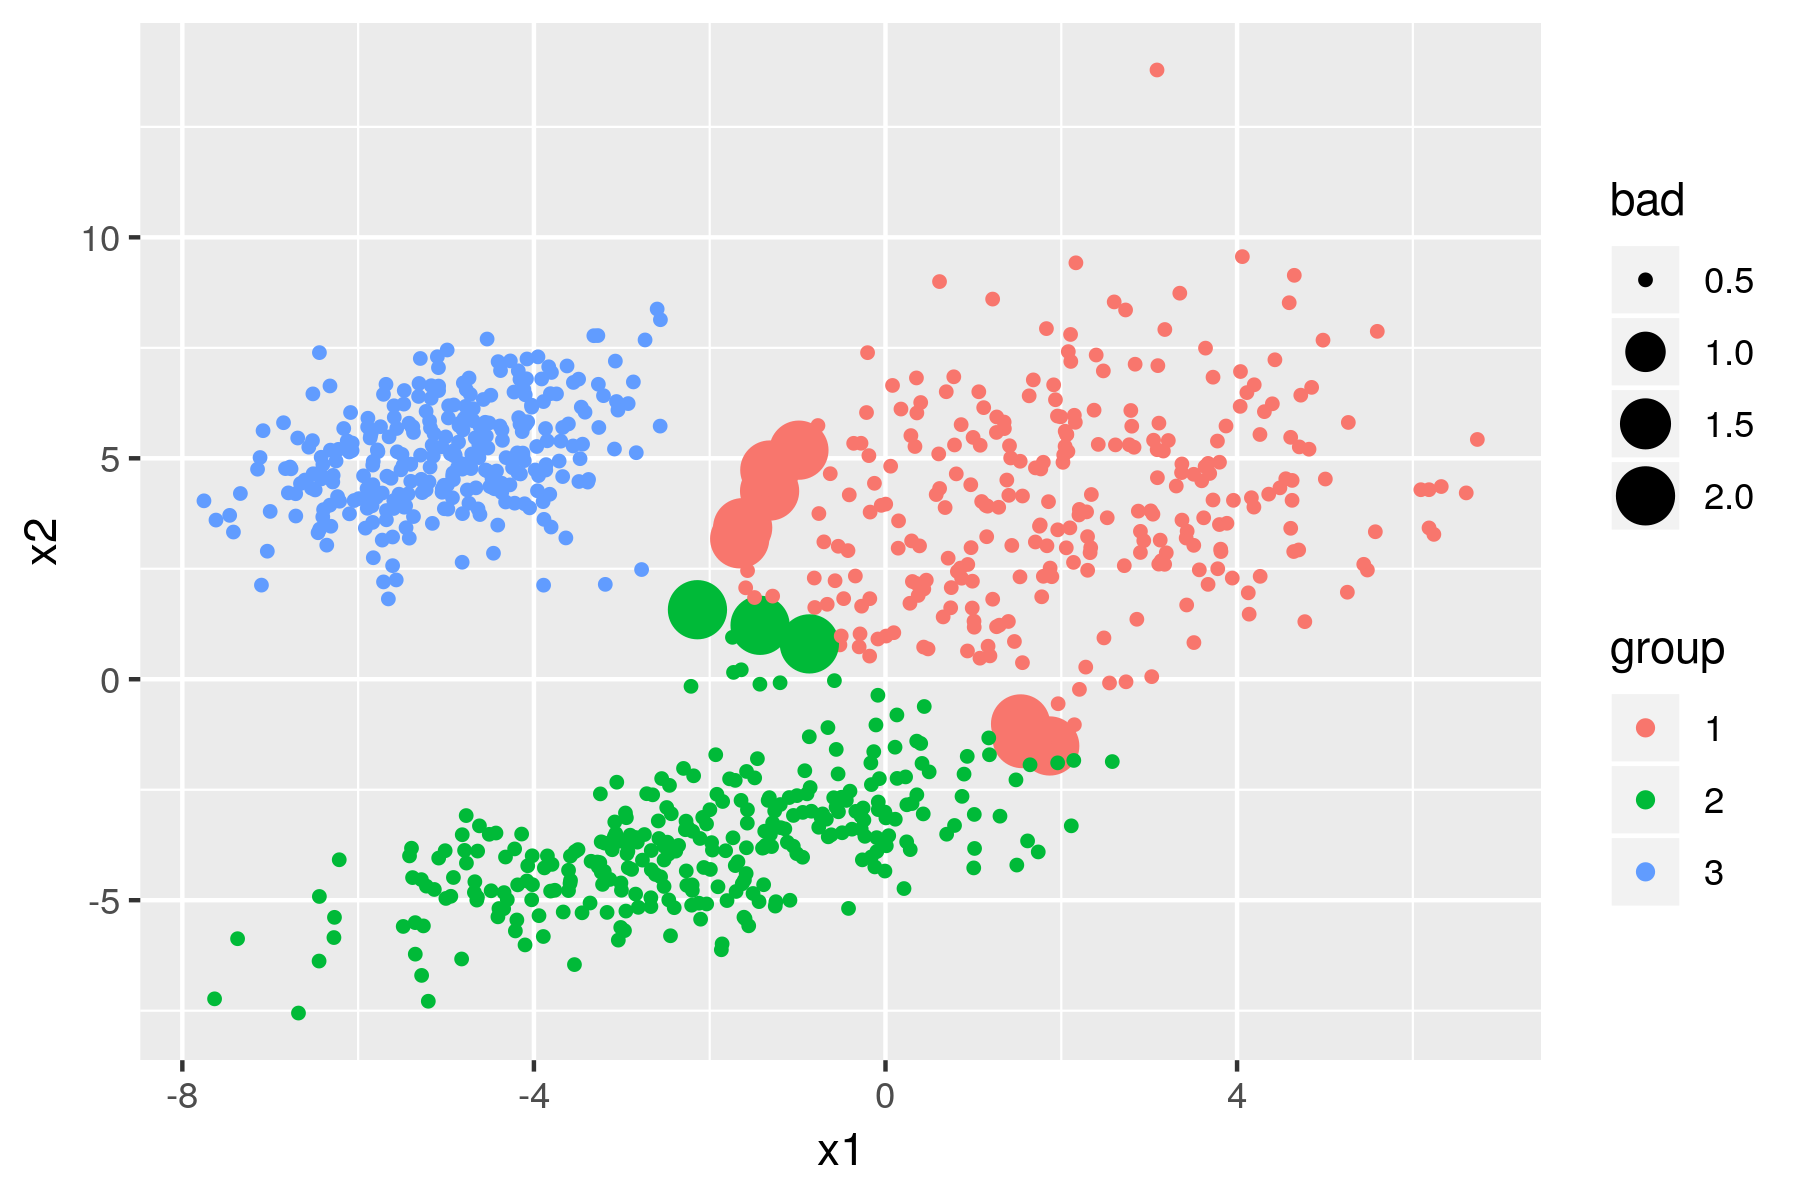

In [11]:
clustered<-cbind(df,group=cl)
summary(clustered)
ggplot(data=clustered,aes(x=x1,y=x2,color=group,size=bad))+geom_point()
    

#### Ejemplo con mouse_data

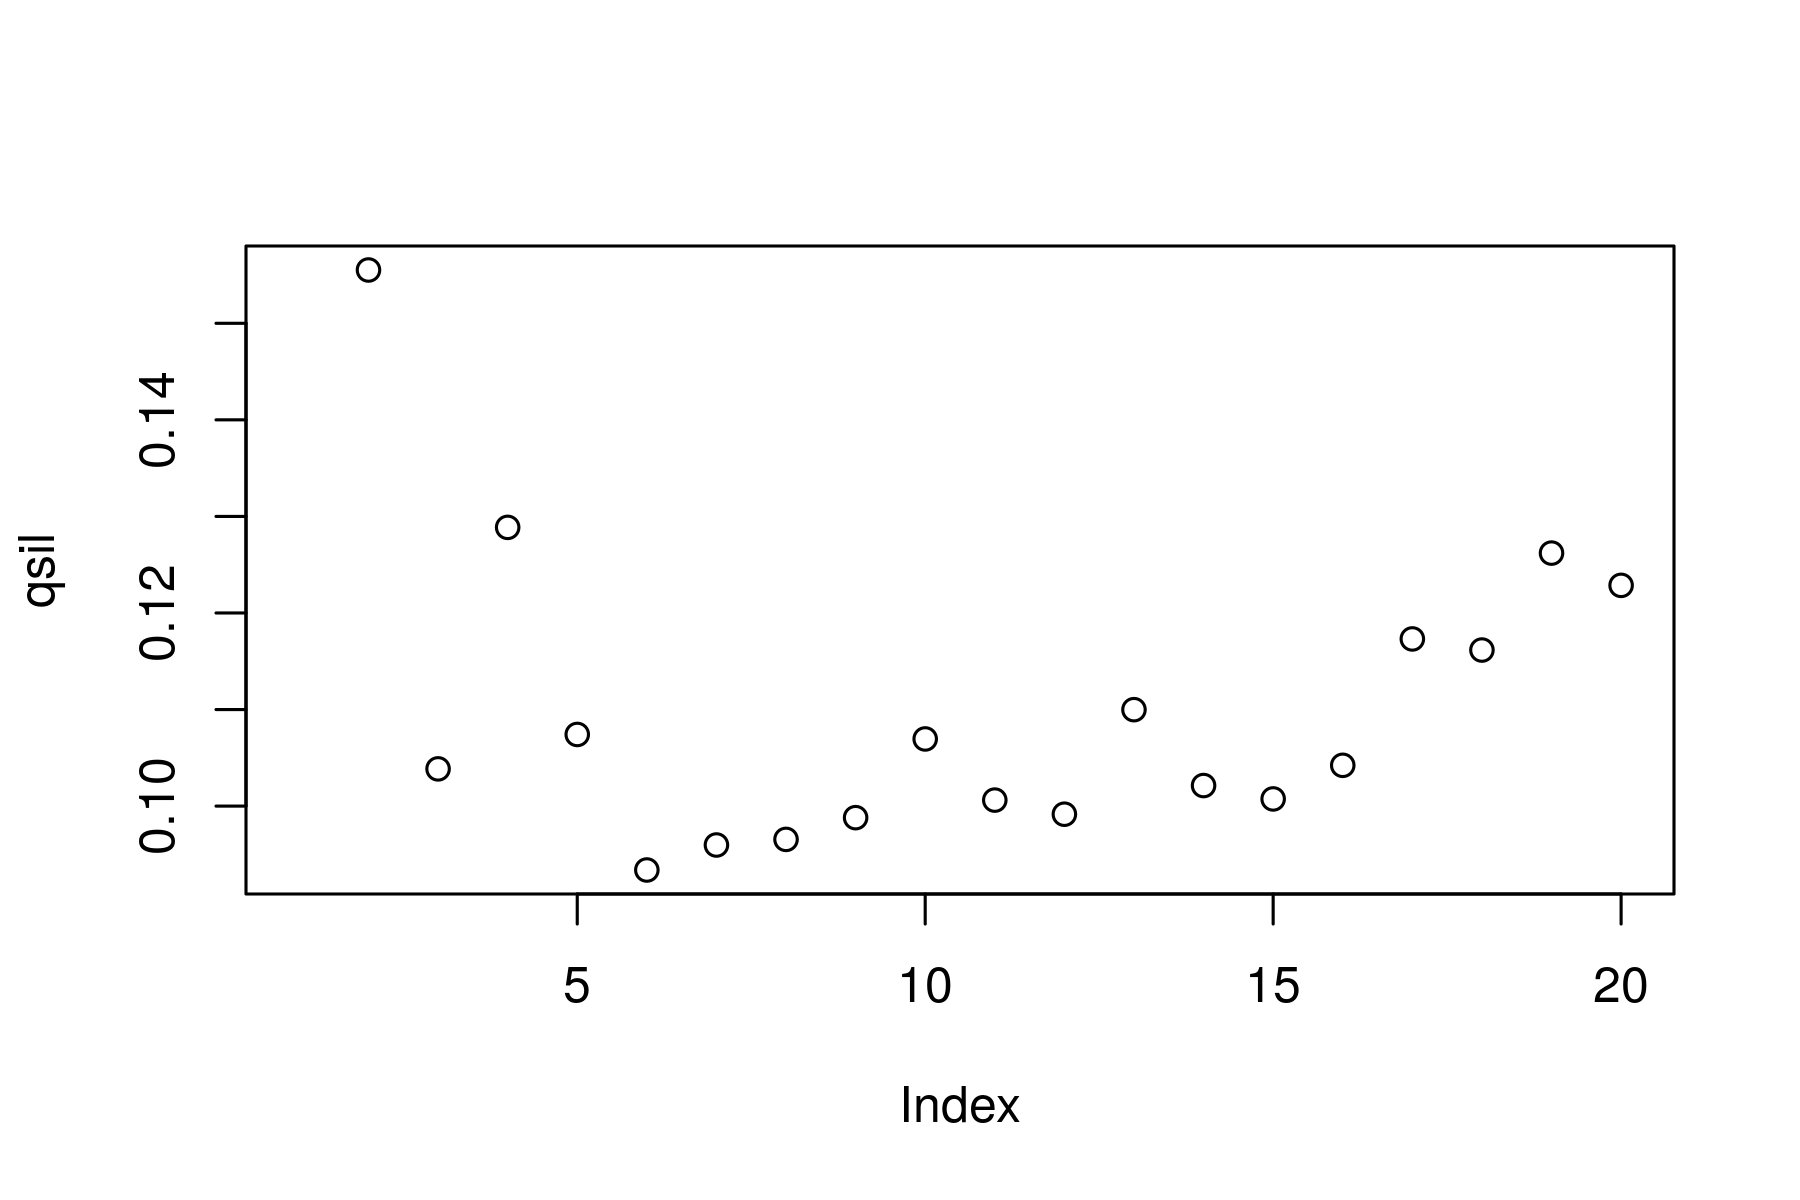

In [64]:
qsil<-c()
for (k in 2:20){
    pr<-pam(mouse_data,k=k, metric="manhattan")
    ss<-silhouette(pr)
    qsil[k]<-mean(ss[, "sil_width"])
}
plot(qsil)

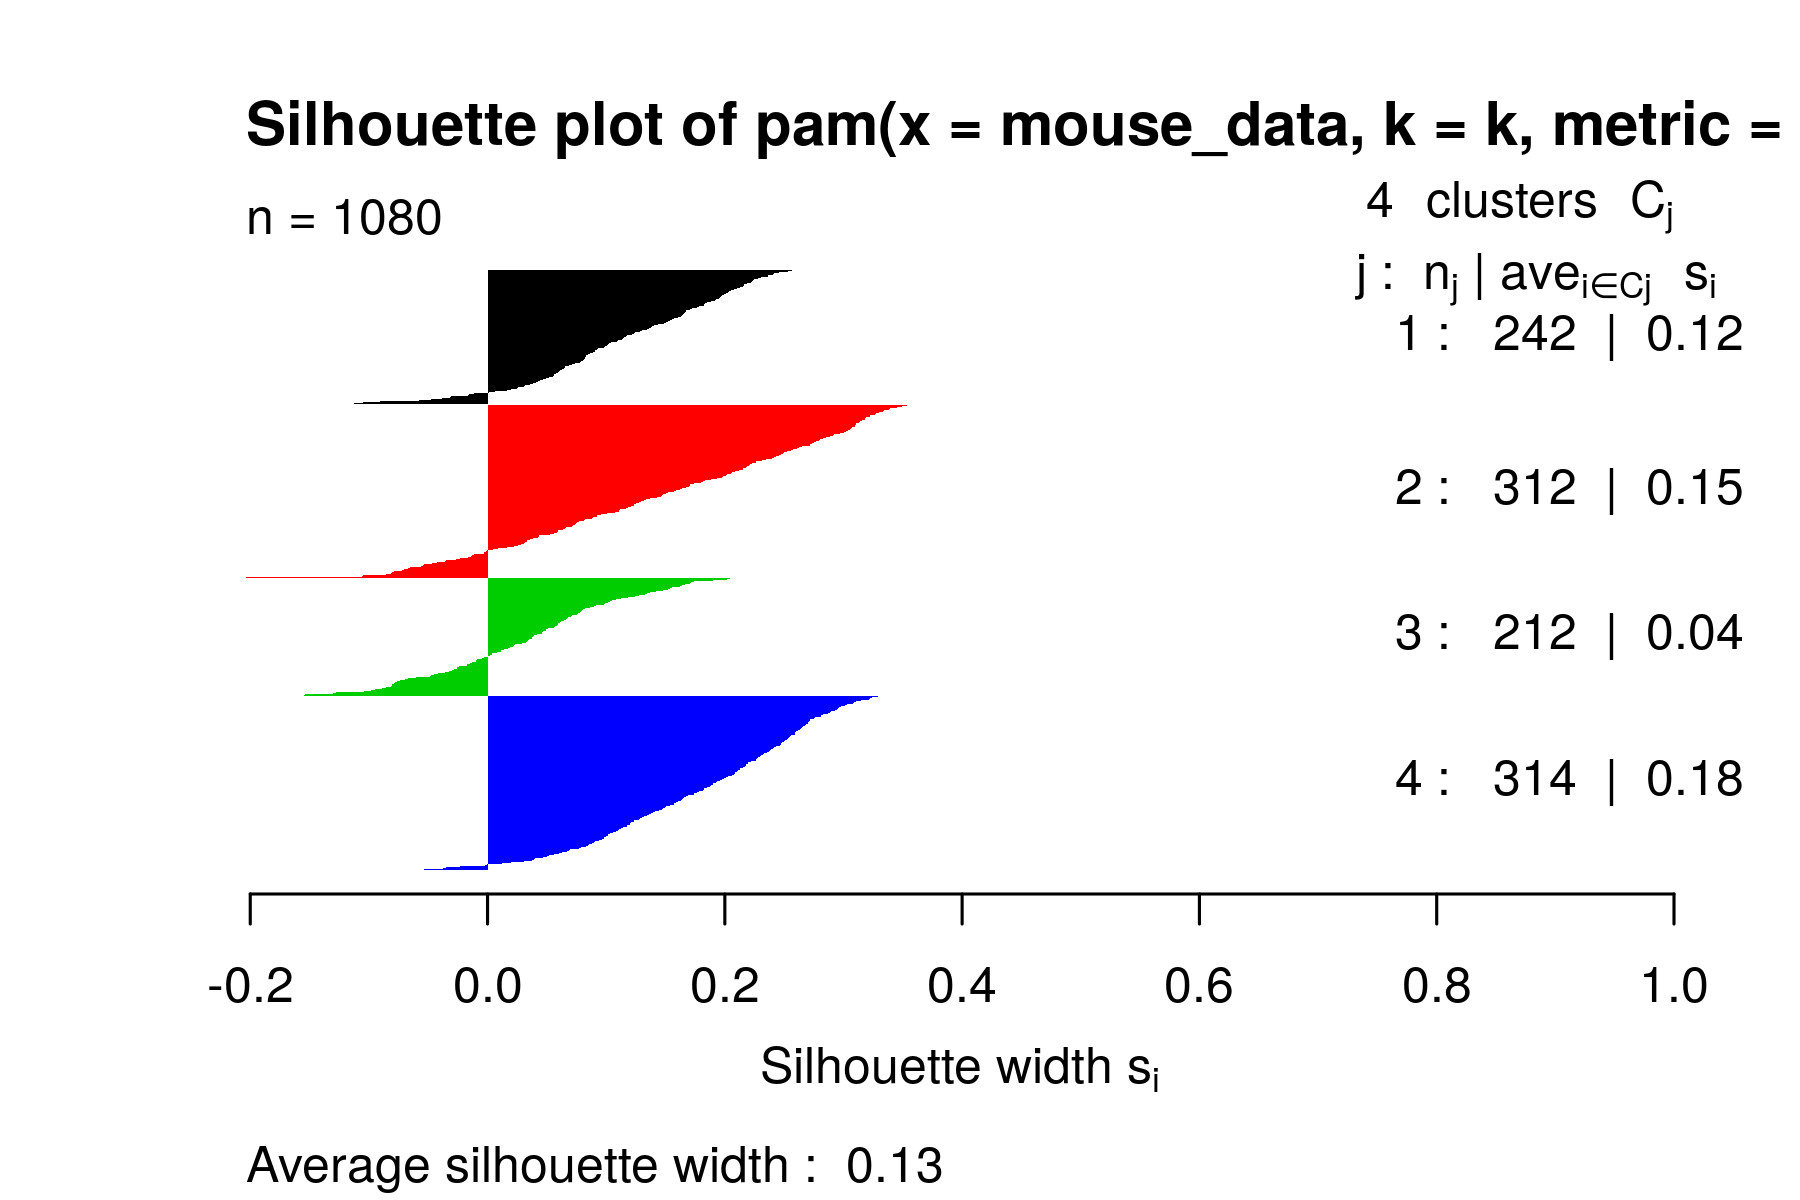

In [69]:
k<-4
pr<-pam(mouse_data,k=k, metric="manhattan")
ss<-silhouette(pr)
plot(ss,col=1:k,border=NA)

In [70]:
table(mouse$class,pr$cluster)
table(mouse$Genotype,pr$cluster)
table(mouse$Treatment,pr$cluster)
table(mouse$Behavior,pr$cluster)

        
          1  2  3  4
  c-CS-m 59 24 26 41
  c-CS-s 65 34 36  0
  c-SC-m  0 45 37 68
  c-SC-s  3 29 13 90
  t-CS-m 56 62 17  0
  t-CS-s 42 49 10  4
  t-SC-m  0 12 27 96
  t-SC-s 17 57 46 15

         
            1   2   3   4
  Control 127 132 112 199
  Ts65Dn  115 180 100 115

           
              1   2   3   4
  Memantine 115 143 107 205
  Saline    127 169 105 109

     
        1   2   3   4
  C/S 222 169  89  45
  S/C  20 143 123 269

## Algoritmos jerárquicos

Se basa en la idea central de que los objetos están más relacionados con objetos cercanos que con objetos más alejados. Estos algoritmos conectan "objetos" para formar "clusters" en función de su distancia. Hay dos enfoques para abordar este problema de agrupamiento:

* Aglomerativo (de abajo arriba): cada elemento comienza en su propio clúster. Iterativamente, los clústeres más similares se fusionan para finalizar con un gran clúster que contiene todos los elementos.
* Divisivo (de arriba hacia abajo): todos los elementos pertenecen al mismo grupo. Este clúster se divide iterativamente hasta que todos los clusters tengan solo un elemento.

La fusión o división de clusters se realiza en base a diferentes métodos para medir estas similitudes de clusters:

* single-linkage (SLCA): la distancia entre dos clusters es la distancia mínima que existe entre dos elementos que pertenecen a diferentes clusters.
![](img/cluster_single.png)
* complete-linkage (CLCA): la distancia entre dos clústeres es la distancia máxima que existe entre dos elementos que pertenecen a diferentes clústeres.
![](img/cluster_complete.png)
* average-linkage (unweighted pair group method with arithmetic mean, UPGMA): la distancia entre dos clusters es la distancia promedio que existe desde cualquier elemento en el primer clúster a cualquier elemento en el otro clúster.
![](img/cluster_average.png)
* cendroid-linkage (Unweighted pair group method with centroid, UPGMC): la distancia entre dos clusters es la distancia que existe entre los centroinds de cada cluster.
![](img/cluster_centroid.png)

### Ejemplo Iris

In [79]:
iris_data<-iris[,1:4]

for (i in 1:ncol(iris_data)){     
    mn<-mean(iris_data[,i],na.rm = T)
    sd<-sd(iris_data[,i],na.rm = T)
    
    iris_data[,i]<-(iris_data[,i]-mn)/sd    
}



In [80]:
d <- dist(as.matrix(iris_data),method = "euclidean")

In [81]:
max(d)

[1] 6.507523

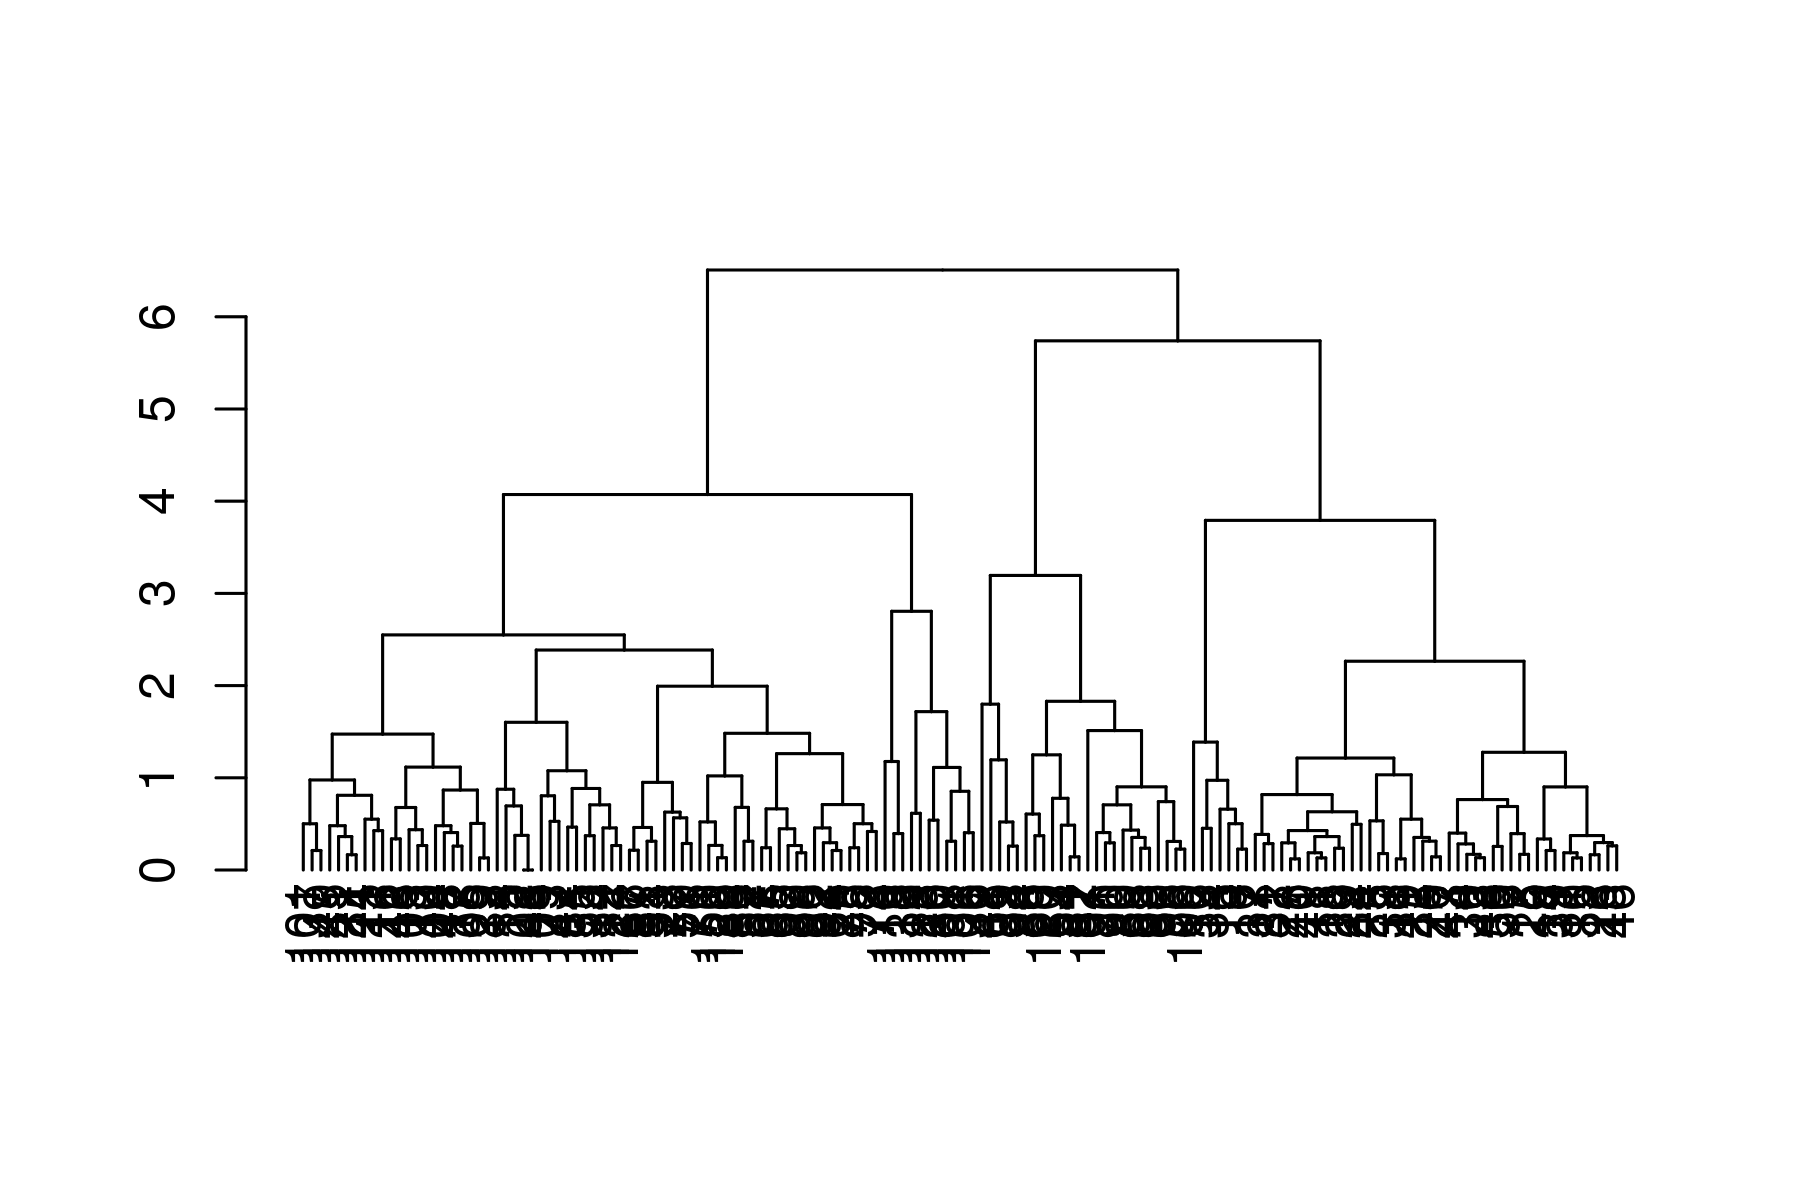

In [82]:
hc <- hclust(d,method="complete")
hcd <- as.dendrogram(hc)
plot(hcd)

In [83]:
library(dendextend)
options(repr.plot.height=8,repr.plot.width=6,repr.plot.res = 300)
labels(hcd)<-iris$Species[labels(hcd)]
hcd<-set(hcd,"labels_cex", 0.45) 
plot(color_branches(hcd,h=2),horiz=TRUE,cex=0)
abline(v=2,col="red")
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 300)

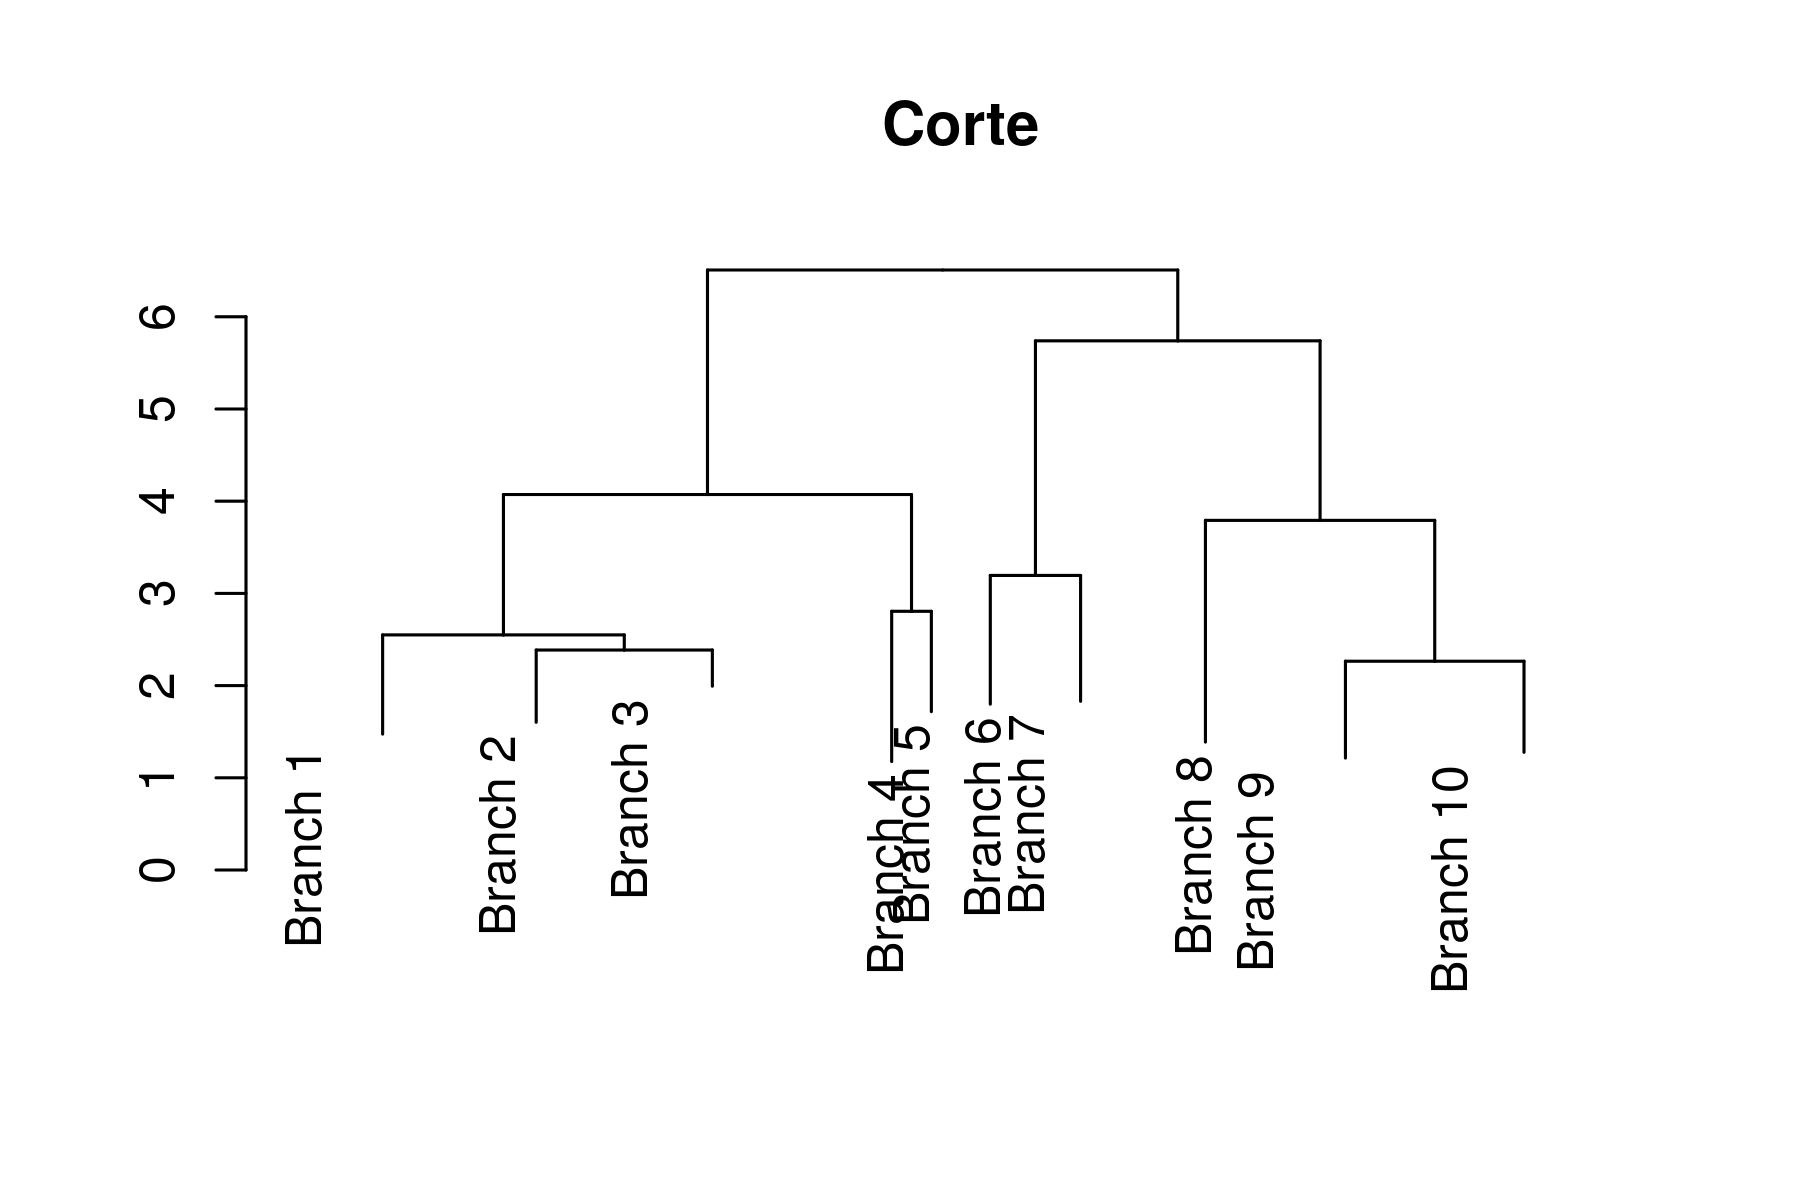

In [84]:
plot(cut(hcd, h = 2)$upper, main = "Corte", cex=1)

In [85]:
cut(hcd, h = 2)$lower

[[1]]
'dendrogram' with 2 branches and 22 members total, at height 1.473958 

[[2]]
'dendrogram' with 2 branches and 15 members total, at height 1.602231 

[[3]]
'dendrogram' with 2 branches and 29 members total, at height 1.9935 

[[4]]
'dendrogram' with 2 branches and 3 members total, at height 1.176572 

[[5]]
'dendrogram' with 2 branches and 8 members total, at height 1.717484 

[[6]]
'dendrogram' with 2 branches and 5 members total, at height 1.798563 

[[7]]
'dendrogram' with 2 branches and 19 members total, at height 1.829634 

[[8]]
'dendrogram' with 2 branches and 7 members total, at height 1.38744 

[[9]]
'dendrogram' with 2 branches and 22 members total, at height 1.214102 

[[10]]
'dendrogram' with 2 branches and 20 members total, at height 1.276517 


Podemos cortar el arbol a una altura dada y con cuales de las especies se correspondería:

In [86]:
table(iris$Species,cutree(hc,h=2))

            
              1  2  3  4  5  6  7  8  9 10
  setosa     22 20  7  1  0  0  0  0  0  0
  versicolor  0  0  0  4 26 17  3  0  0  0
  virginica   0  0  0  0  3  2 12 22  8  3

In [87]:
table(iris$Species,cutree(hc,k=7))

            
              1  2  3  4  5  6  7
  setosa     42  7  1  0  0  0  0
  versicolor  0  0  4 29 17  0  0
  virginica   0  0  0 37  2  8  3

In [89]:
?cutree

La función cutree_1h conserva el orden del dendrograma que hemos dibujado antes:

In [90]:
table(iris$Species,cutree_1h.dendrogram(hcd,h=2))

            
              1  2  3  4  5  6  7  8  9 10
  setosa     20 22  7  0  1  0  0  0  0  0
  versicolor  0  0  0 17  4  0  0 26  3  0
  virginica   0  0  0  2  0  8  3  3 12 22

#### Ejemplo proteinas del ratón

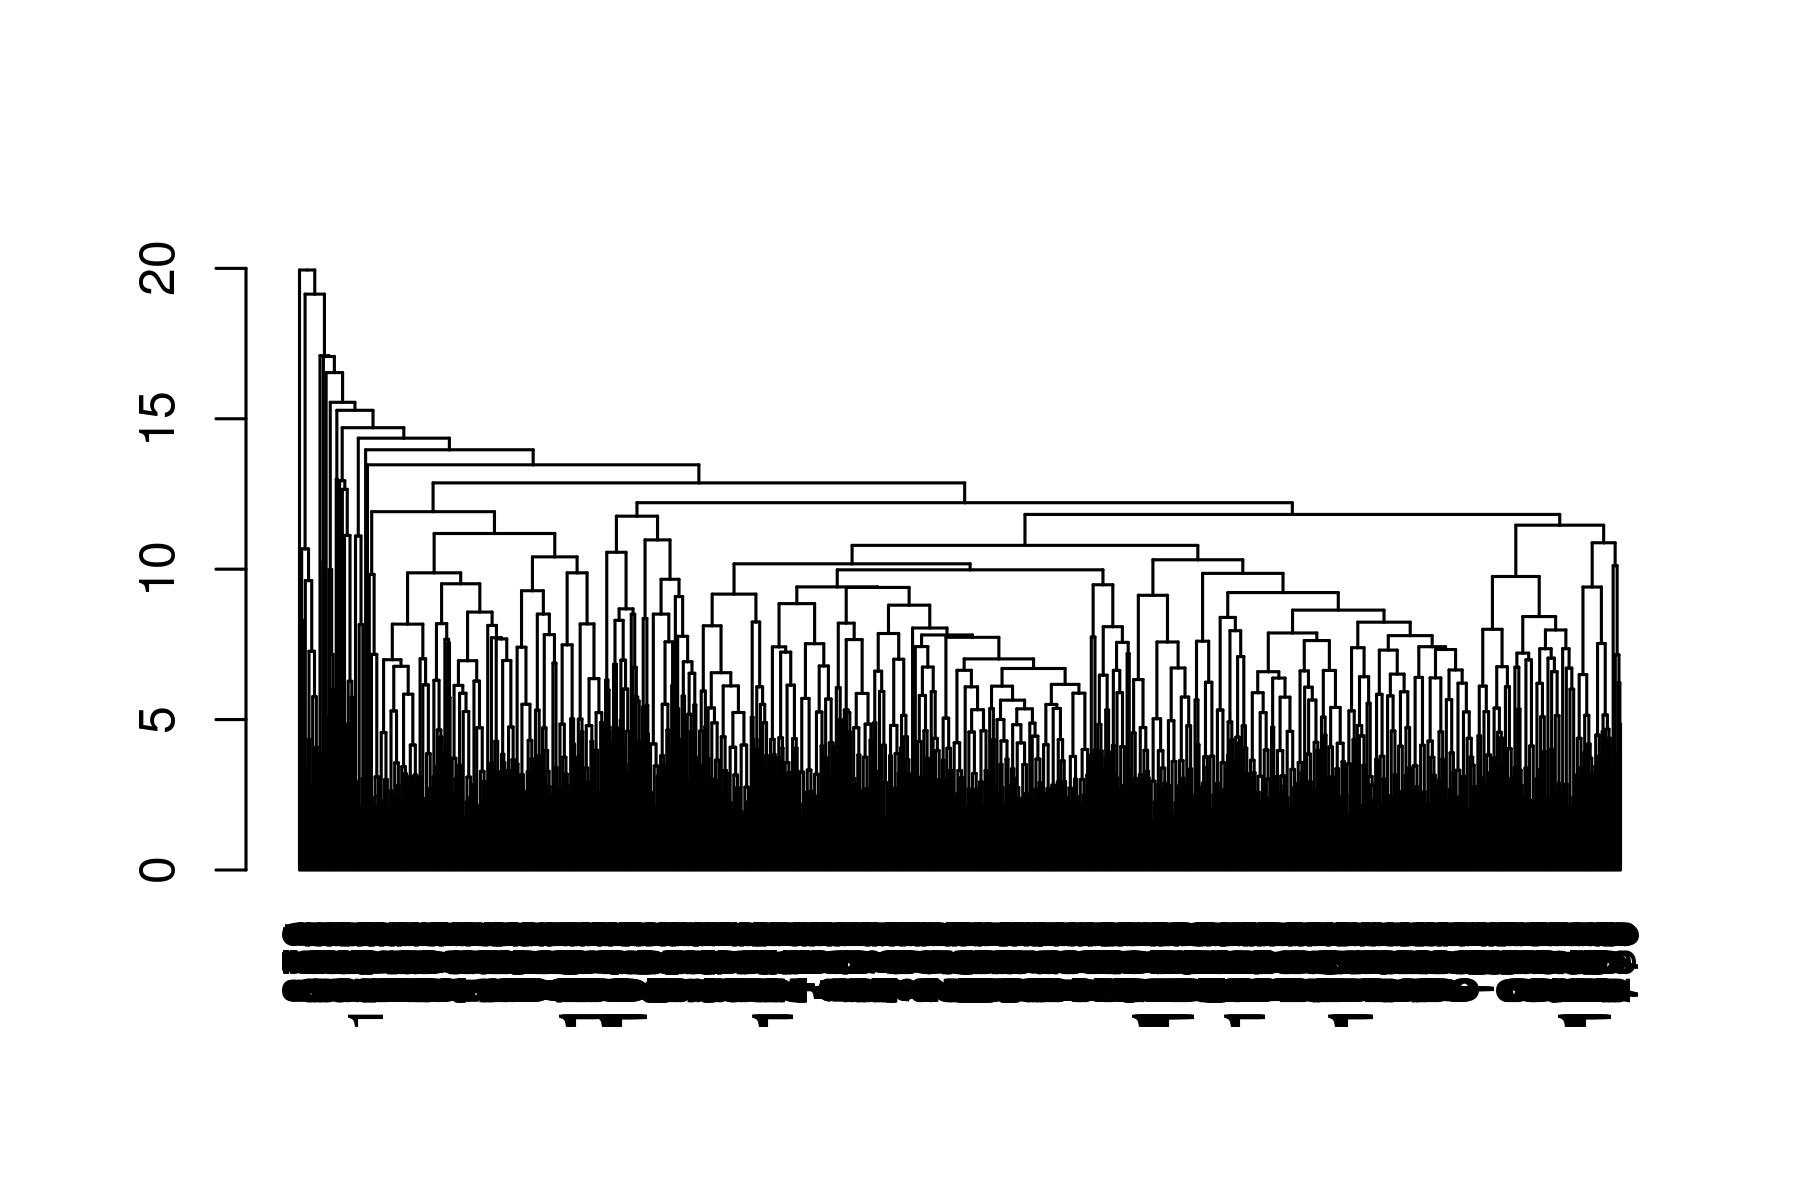

In [112]:
d <- dist(as.matrix(mouse_data),method = "euclidean")

hc <- hclust(d,method="average")
hcd <- as.dendrogram(hc)
plot(hcd)

In [113]:
plot(color_branches(hcd, k=8),leaflab="none")

In [114]:
cut(hcd, h = 15)

$upper
'dendrogram' with 2 branches and 8 members total, at height 19.94569 

$lower
$lower[[1]]
'dendrogram' leaf '359', at height 0 

$lower[[2]]
'dendrogram' with 2 branches and 15 members total, at height 10.67596 

$lower[[3]]
'dendrogram' with 2 branches and 3 members total, at height 3.853065 

$lower[[4]]
'dendrogram' with 2 branches and 2 members total, at height 10.24474 

$lower[[5]]
'dendrogram' with 2 branches and 3 members total, at height 5.1019 

$lower[[6]]
'dendrogram' with 2 branches and 6 members total, at height 9.989529 

$lower[[7]]
'dendrogram' with 2 branches and 2 members total, at height 12.98927 

$lower[[8]]
'dendrogram' with 2 branches and 1048 members total, at height 14.70287 



In [117]:
plot(cut(hcd, h = 15)$lower[[2]], main = "Second branch of lower tree with cut at h=15")

In [116]:
table(mouse$class,cutree(hc,h=10))
table(mouse$Genotype,cutree(hc,22))
table(mouse$Treatment,cutree(hc,4))
table(mouse$Behavior,cutree(hc,4))


        
          1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  c-CS-m 45 41  1 14 30 15  3  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  c-CS-s  6 39  5 14  0 22  0  0  0  0  0  0  0  0  0  0 15  6  3  1 12  3  3
  c-SC-m  0  0  0  0 92  0  0  0  3 15  6 30  1  1  1  1  0  0  0  0  0  0  0
  c-SC-s  0 15  0  0 81  0  0  0  0  5  0 16  0  0  0  0  0  0  0  0  0  0  0
  t-CS-m  9 73  0  0  0 38  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0
  t-CS-s 12 33  0 12  0 36  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  t-SC-m  0  0  0  0 87  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0
  t-SC-s  9 30  0  0  6  0  0  0  0  0  0  0  0  0  0  0 15  0  0  0  0  0  0
        
         24 25 26 27 28 29 30 31 32 33 34
  c-CS-m  0  0  0  0  0  0  0  0  0  0  0
  c-CS-s  6  0  0  0  0  0  0  0  0  0  0
  c-SC-m  0  0  0  0  0  0  0  0  0  0  0
  c-SC-s  0  2  1 15  0  0  0  0  0  0  0
  t-CS-m  0  0  0  0  0  0  0  0  0  0  0
  t-CS-s  0  0  0  0  0  0  

         
            1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  Control  51 344   6  34  37   3   1   9  35   2  16   1   9   1  15   3   2
  Ts65Dn   30 292   0  12  74   0   0   0  38   0  21   0   0   0   0   0   0
         
           18  19  20  21  22
  Control   1   0   0   0   0
  Ts65Dn    0  30   3   9   1

           
              1   2   3   4
  Memantine 570   0   0   0
  Saline    491   1  15   3

     
        1   2   3   4
  C/S 506   1  15   3
  S/C 555   0   0   0

#### Ejemplo tipos de aceite

In [118]:
library(dslabs)
standarized_model <- caret::preProcess(olive, method = c("center", "scale"))
olive_standarized=predict(standarized_model,olive)

In [133]:
d <- dist(as.matrix(olive_standarized),method = "euclidean")

#hc <- hclust(d,method="average")
hc <- hclust(d,method="complete")
hcd <- as.dendrogram(hc)
plot(color_branches(hcd, k=5),leaflab="none")
abline(h=7,col="red")

Warning message in dist(as.matrix(olive_standarized), method = "euclidean"):
“NAs introduced by coercion”


In [123]:
str(hc)

List of 7
 $ merge      : int [1:571, 1:2] -548 -450 -551 -439 -549 -436 -444 -426 -432 -423 ...
 $ height     : num [1:571] 0.0718 0.0794 0.101 0.1028 0.1235 ...
 $ order      : int [1:572] 522 527 551 548 553 537 554 536 561 562 ...
 $ labels     : chr [1:572] "1" "2" "3" "4" ...
 $ method     : chr "average"
 $ call       : language hclust(d = d, method = "average")
 $ dist.method: chr "euclidean"
 - attr(*, "class")= chr "hclust"


In [132]:
hc$height[hc$height>7]

[1]  7.102574  7.624734  8.278572  8.937563 11.986894

In [137]:
#cl<-cutree(hc,k=5)
cl<-cutree_1h.dendrogram(hcd,h=7.5)
olive$cluster=factor(cl)
summary(olive)

            region                 area        palmitic      palmitoleic    
 Northern Italy:151   South-Apulia   :206   Min.   : 6.10   Min.   :0.1500  
 Sardinia      : 98   Inland-Sardinia: 65   1st Qu.:10.95   1st Qu.:0.8775  
 Southern Italy:323   Calabria       : 56   Median :12.01   Median :1.1000  
                      Umbria         : 51   Mean   :12.32   Mean   :1.2609  
                      East-Liguria   : 50   3rd Qu.:13.60   3rd Qu.:1.6925  
                      West-Liguria   : 50   Max.   :17.53   Max.   :2.8000  
                      (Other)        : 94                                   
    stearic          oleic          linoleic        linolenic     
 Min.   :1.520   Min.   :63.00   Min.   : 4.480   Min.   :0.0000  
 1st Qu.:2.050   1st Qu.:70.00   1st Qu.: 7.707   1st Qu.:0.2600  
 Median :2.230   Median :73.03   Median :10.300   Median :0.3300  
 Mean   :2.289   Mean   :73.12   Mean   : 9.805   Mean   :0.3189  
 3rd Qu.:2.490   3rd Qu.:76.80   3rd Qu.:11.807  

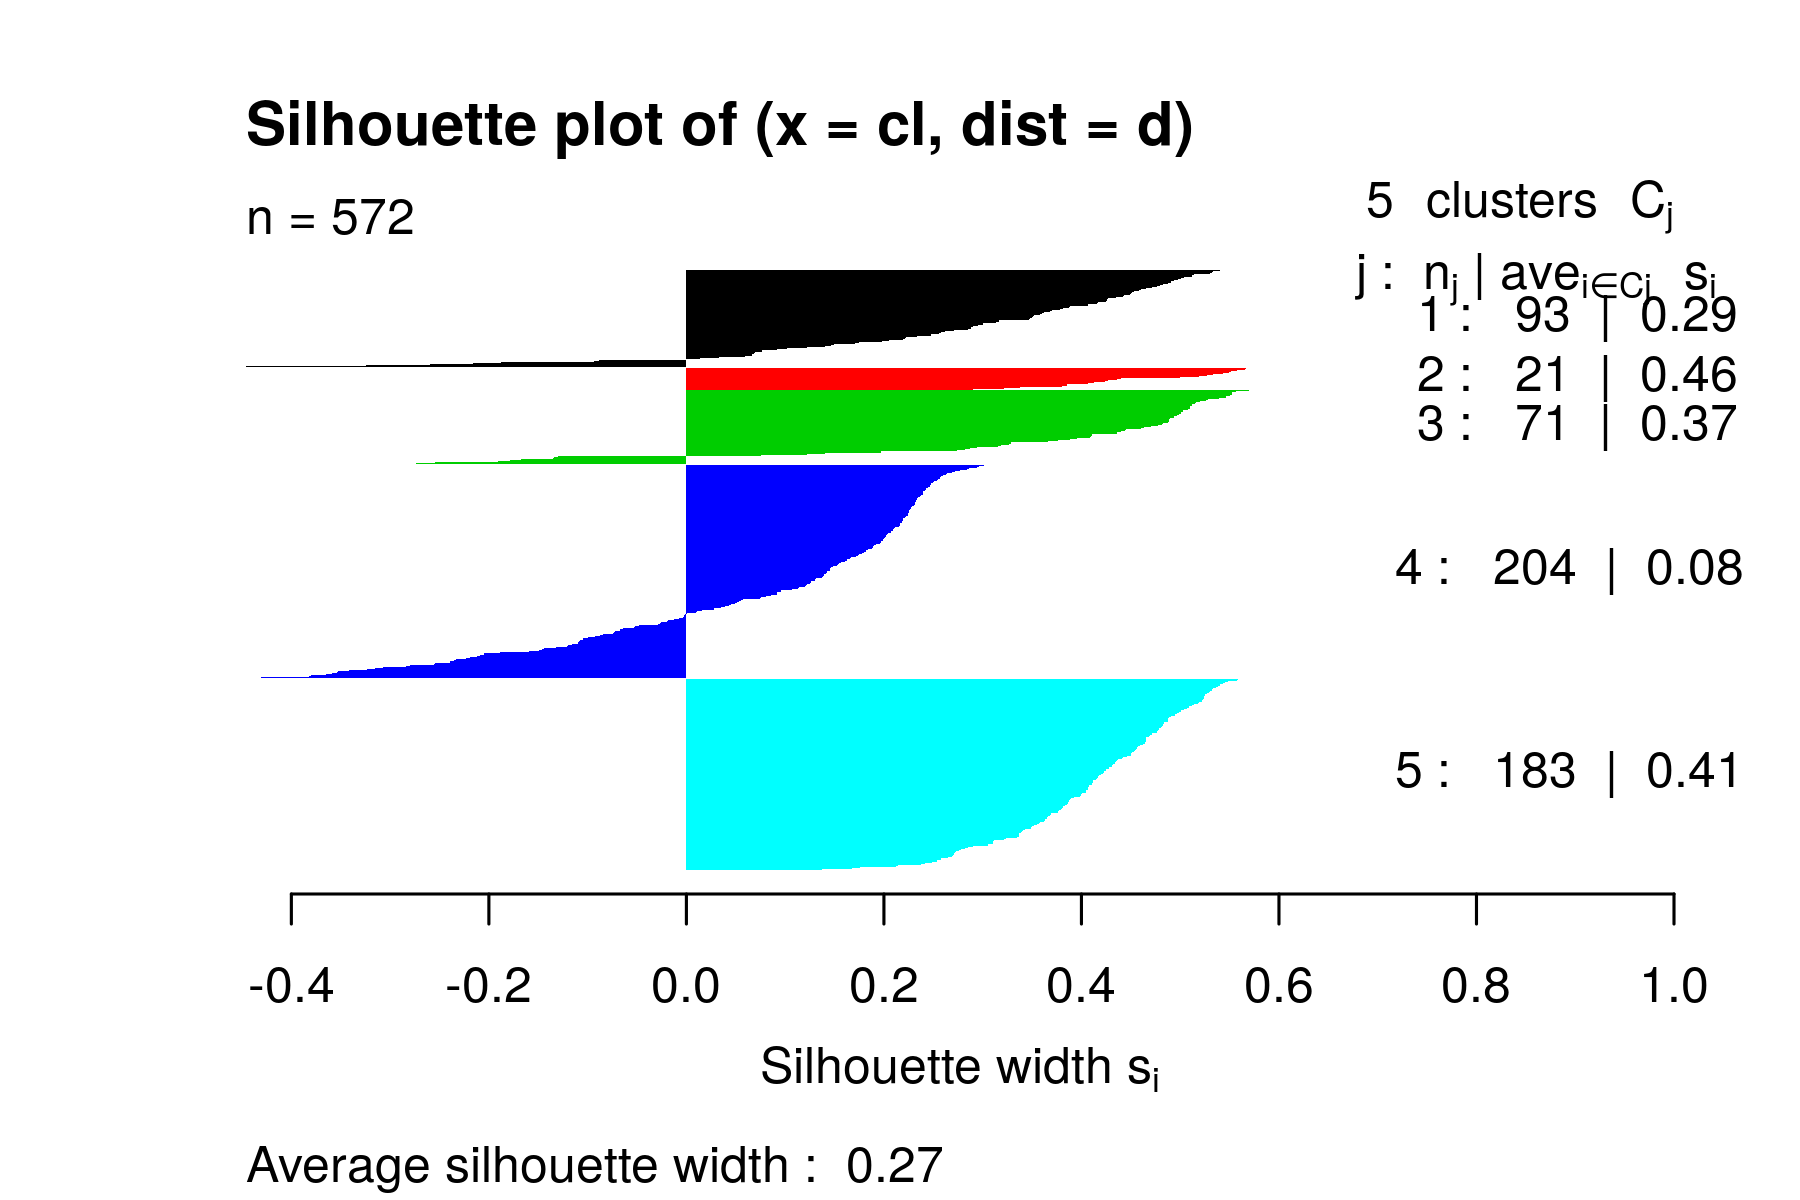

In [138]:
ss<-silhouette(cl, d)
plot(ss,col=1:max(cl),border=NA)

In [139]:
library(dplyr)
olive %>% filter(cluster==1) %>% summary()

            region                area       palmitic      palmitoleic    
 Northern Italy:80   Umbria         :51   Min.   : 9.11   Min.   :0.1500  
 Sardinia      : 0   East-Liguria   :29   1st Qu.:10.75   1st Qu.:0.5800  
 Southern Italy:13   North-Apulia   :13   Median :10.92   Median :0.7000  
                     Calabria       : 0   Mean   :10.98   Mean   :0.6822  
                     Coast-Sardinia : 0   3rd Qu.:11.10   3rd Qu.:0.8000  
                     Inland-Sardinia: 0   Max.   :12.90   Max.   :1.1000  
                     (Other)        : 0                                   
    stearic          oleic          linoleic       linolenic     
 Min.   :1.700   Min.   :75.20   Min.   :5.100   Min.   :0.1800  
 1st Qu.:1.900   1st Qu.:77.45   1st Qu.:6.000   1st Qu.:0.2800  
 Median :2.100   Median :79.40   Median :6.100   Median :0.3500  
 Mean   :2.132   Mean   :78.59   Mean   :6.474   Mean   :0.3534  
 3rd Qu.:2.390   3rd Qu.:79.60   3rd Qu.:7.090   3rd Qu.:0.4000  
 Max

In [140]:
olive %>% filter(cluster==2) %>% summary()

            region                area       palmitic      palmitoleic    
 Northern Italy: 0   Sicily         :11   Min.   : 8.75   Min.   :0.4100  
 Sardinia      : 0   North-Apulia   :10   1st Qu.: 9.26   1st Qu.:0.5200  
 Southern Italy:21   Calabria       : 0   Median : 9.80   Median :0.5700  
                     Coast-Sardinia : 0   Mean   :10.07   Mean   :0.5919  
                     East-Liguria   : 0   3rd Qu.:10.74   3rd Qu.:0.6800  
                     Inland-Sardinia: 0   Max.   :12.22   Max.   :0.7700  
                     (Other)        : 0                                   
    stearic          oleic          linoleic       linolenic    
 Min.   :2.360   Min.   :75.27   Min.   :4.480   Min.   :0.410  
 1st Qu.:2.540   1st Qu.:77.03   1st Qu.:6.550   1st Qu.:0.440  
 Median :2.680   Median :77.70   Median :6.940   Median :0.490  
 Mean   :2.842   Mean   :77.76   Mean   :6.904   Mean   :0.481  
 3rd Qu.:2.880   3rd Qu.:78.20   3rd Qu.:7.730   3rd Qu.:0.510  
 Max.   :3

In [141]:
olive %>% filter(cluster==3) %>% summary()

            region                area       palmitic      palmitoleic    
 Northern Italy:71   West-Liguria   :50   Min.   : 6.10   Min.   :0.5000  
 Sardinia      : 0   East-Liguria   :21   1st Qu.:10.20   1st Qu.:0.9000  
 Southern Italy: 0   Calabria       : 0   Median :10.60   Median :0.9000  
                     Coast-Sardinia : 0   Mean   :10.80   Mean   :0.9986  
                     Inland-Sardinia: 0   3rd Qu.:11.45   3rd Qu.:1.1000  
                     North-Apulia   : 0   Max.   :14.00   Max.   :1.8000  
                     (Other)        : 0                                   
    stearic          oleic          linoleic        linolenic      
 Min.   :2.000   Min.   :73.40   Min.   : 5.300   Min.   :0.00000  
 1st Qu.:2.200   1st Qu.:76.20   1st Qu.: 7.050   1st Qu.:0.00000  
 Median :2.400   Median :77.20   Median : 8.300   Median :0.10000  
 Mean   :2.525   Mean   :77.18   Mean   : 8.252   Mean   :0.06901  
 3rd Qu.:2.700   3rd Qu.:78.10   3rd Qu.: 9.400   3rd Qu.:0.

In [142]:
olive %>% filter(cluster==4) %>% summary()

            region                 area       palmitic      palmitoleic   
 Northern Italy:  0   Inland-Sardinia:65   Min.   :10.30   Min.   :0.350  
 Sardinia      : 98   Calabria       :56   1st Qu.:11.09   1st Qu.:0.950  
 Southern Italy:106   Coast-Sardinia :33   Median :11.80   Median :1.060  
                      Sicily         :24   Mean   :12.12   Mean   :1.130  
                      South-Apulia   :24   3rd Qu.:13.03   3rd Qu.:1.323  
                      North-Apulia   : 2   Max.   :16.39   Max.   :1.830  
                      (Other)        : 0                                  
    stearic          oleic          linoleic        linolenic     
 Min.   :1.810   Min.   :65.10   Min.   : 6.090   Min.   :0.1500  
 1st Qu.:2.140   1st Qu.:71.42   1st Qu.: 8.682   1st Qu.:0.2700  
 Median :2.335   Median :73.00   Median :10.920   Median :0.3400  
 Mean   :2.394   Mean   :72.56   Mean   :10.361   Mean   :0.3486  
 3rd Qu.:2.570   3rd Qu.:73.80   3rd Qu.:11.473   3rd Qu.:0.4300 

In [143]:
olive %>% filter(cluster==5) %>% summary()

            region                 area        palmitic      palmitoleic   
 Northern Italy:  0   South-Apulia   :182   Min.   :12.01   Min.   :1.290  
 Sardinia      :  0   Sicily         :  1   1st Qu.:13.38   1st Qu.:1.675  
 Southern Italy:183   Calabria       :  0   Median :13.99   Median :1.810  
                      Coast-Sardinia :  0   Mean   :14.07   Mean   :1.880  
                      East-Liguria   :  0   3rd Qu.:14.59   3rd Qu.:2.035  
                      Inland-Sardinia:  0   Max.   :17.53   Max.   :2.800  
                      (Other)        :  0                                  
    stearic          oleic          linoleic       linolenic     
 Min.   :1.520   Min.   :63.00   Min.   : 8.27   Min.   :0.2000  
 1st Qu.:1.915   1st Qu.:67.80   1st Qu.:11.27   1st Qu.:0.3000  
 Median :2.080   Median :69.20   Median :11.93   Median :0.3400  
 Mean   :2.095   Mean   :68.85   Mean   :11.81   Mean   :0.3466  
 3rd Qu.:2.270   3rd Qu.:70.07   3rd Qu.:12.43   3rd Qu.:0.380

#### Ejemplo expresión genética levadura

Ejemplo sacado de:
https://bio723-class.github.io/Bio723-book/clustering-in-r.html

Utilizando el dataset del artículo:
    Spellman PT, et al. 1998. Comprehensive identification of cell cycle-regulated genes of the yeast Saccharomyces cerevisiae by microarray hybridization. Mol Biol Cell 9(12): 3273-97.

Nos vamos a descargar la matriz de expresión de 724 genes en diferentes condiciones. Vamos a gruparlos por su similaridad

In [144]:
#library(tidyverse)
spellman <- read.csv("https://github.com/Bio723-class/example-datasets/raw/master/spellman-wide.csv")
head(spellman)

expt  time YAL022C YAL040C YAL053W YAL067C YAR003W YAR007C YAR008W YAR018C ⋯
1 alpha  0   -0.36    1.04    0.21    0.01   -0.30   -0.48   -0.35   -0.46   ⋯
2 alpha  7   -0.42    0.19   -0.20    0.07   -0.45   -0.42    0.10    0.12   ⋯
3 alpha 14    0.29    0.47    0.20    0.17    0.75    0.87    0.47   -0.06   ⋯
4 alpha 21   -0.14   -1.03    0.15      NA    0.37    0.92    0.39   -0.76   ⋯
5 alpha 28   -0.19   -0.63    0.38   -0.10    0.27    0.67    0.17   -0.70   ⋯
6 alpha 35   -0.52   -0.68    0.37    0.08   -0.28   -0.18   -0.18   -0.79   ⋯
  YPR155C YPR156C YPR157W YPR159W YPR167C YPR174C YPR175W YPR202W YPR203W
1  0.09    0.09    0.60    0.17    0.07   -0.24   -0.41   -0.79   -0.68  
2 -0.27   -0.68    0.34    0.16    0.38   -0.40   -0.57   -0.25   -0.19  
3  0.35   -0.71   -0.05    0.17    0.00    0.97    1.15    1.18    1.23  
4  0.09   -1.86   -0.46    0.38   -0.08    0.62    0.69    0.84    0.84  
5  0.15   -1.07    0.10    0.47      NA    0.60    0.61    0.19    0.14  
6  0.28   -0.71   -0.34   -0.07    0.10   -0.11    0.00   -0.11   -0.44  
  YPR204W
1 -0.37  
2 -0.48  
3  0.97  
4  0.52  
5  0.18  
6 -0.11

Las dos primeras columnas indican el tipo de experimento que se ha realizado. Las siguientes columnas indican el nivel de expresión genética del gen en cuestión, indicado por la columna.
Por tanto cada columna, a partir de la tercera nos da los niveles de expresión de un gen en diferentes condiciones. Queremos encontrar los genes que muestran un comportamiento similar.

Como distancia ahora vamos a utilizar la correlación. Más concretamente: 1-cor
De esta forma si dos genes tienen correlación muy cercana a 1 tendrán una distancia muy cercana a 0. A menor correlación, mayor distancia.

In [145]:
spellman.cor<-cor(spellman[,c(-1,-2)],use="pairwise.complete.obs")

In [152]:
spellman.dist<- as.dist(1 - (spellman.cor)^2)
str(spellman.dist)

 'dist' num [1:261726] 0.745 0.995 0.94 0.999 0.961 ...
 - attr(*, "Labels")= chr [1:724] "YAL022C" "YAL040C" "YAL053W" "YAL067C" ...
 - attr(*, "Size")= int 724
 - attr(*, "call")= language as.dist.default(m = 1 - (spellman.cor)^2)
 - attr(*, "Diag")= logi FALSE
 - attr(*, "Upper")= logi FALSE


In [153]:
spellman.tree <- hclust(spellman.dist, method="complete")
spellman.dend <- as.dendrogram(spellman.tree) 

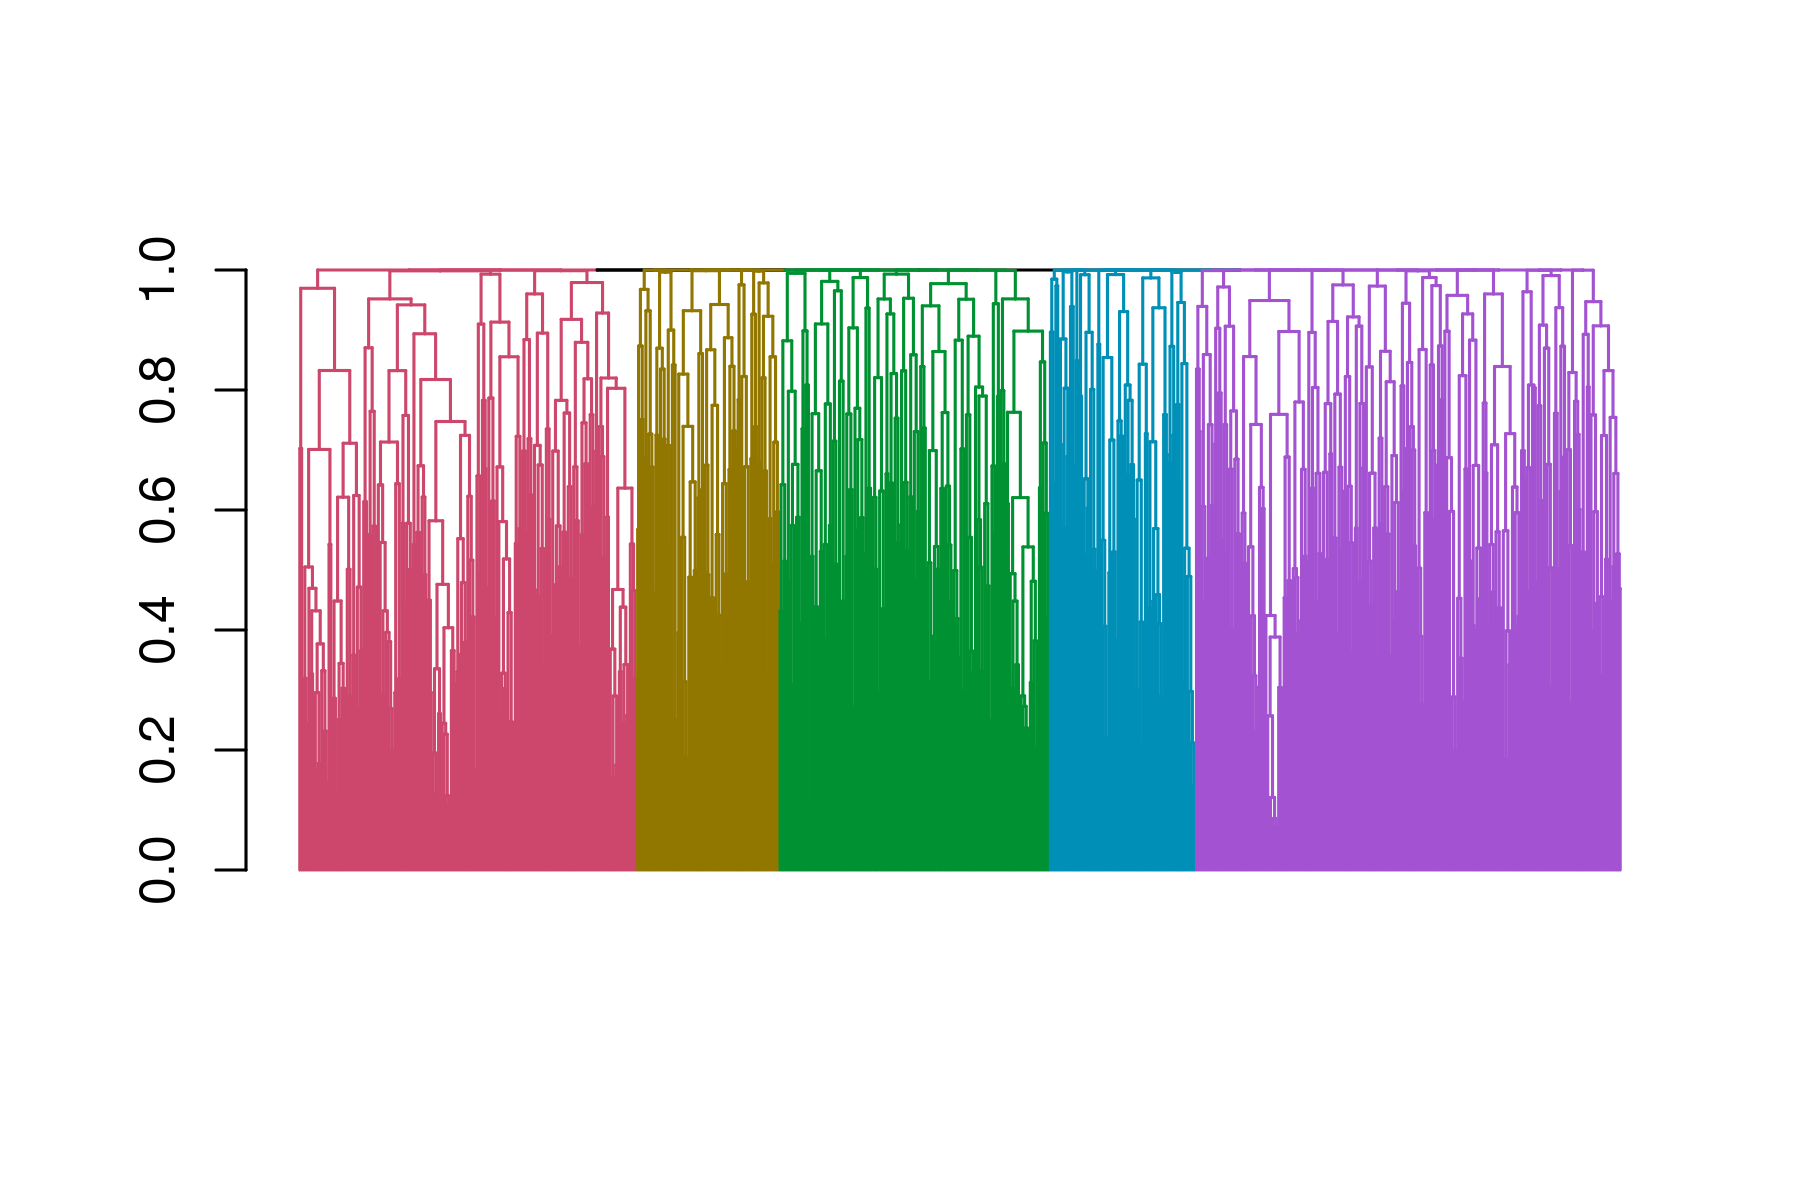

In [159]:
library(dendextend)

clusters <- cutree(spellman.dend, h=5)
plot(color_branches(spellman.dend, k=5),leaflab="none")

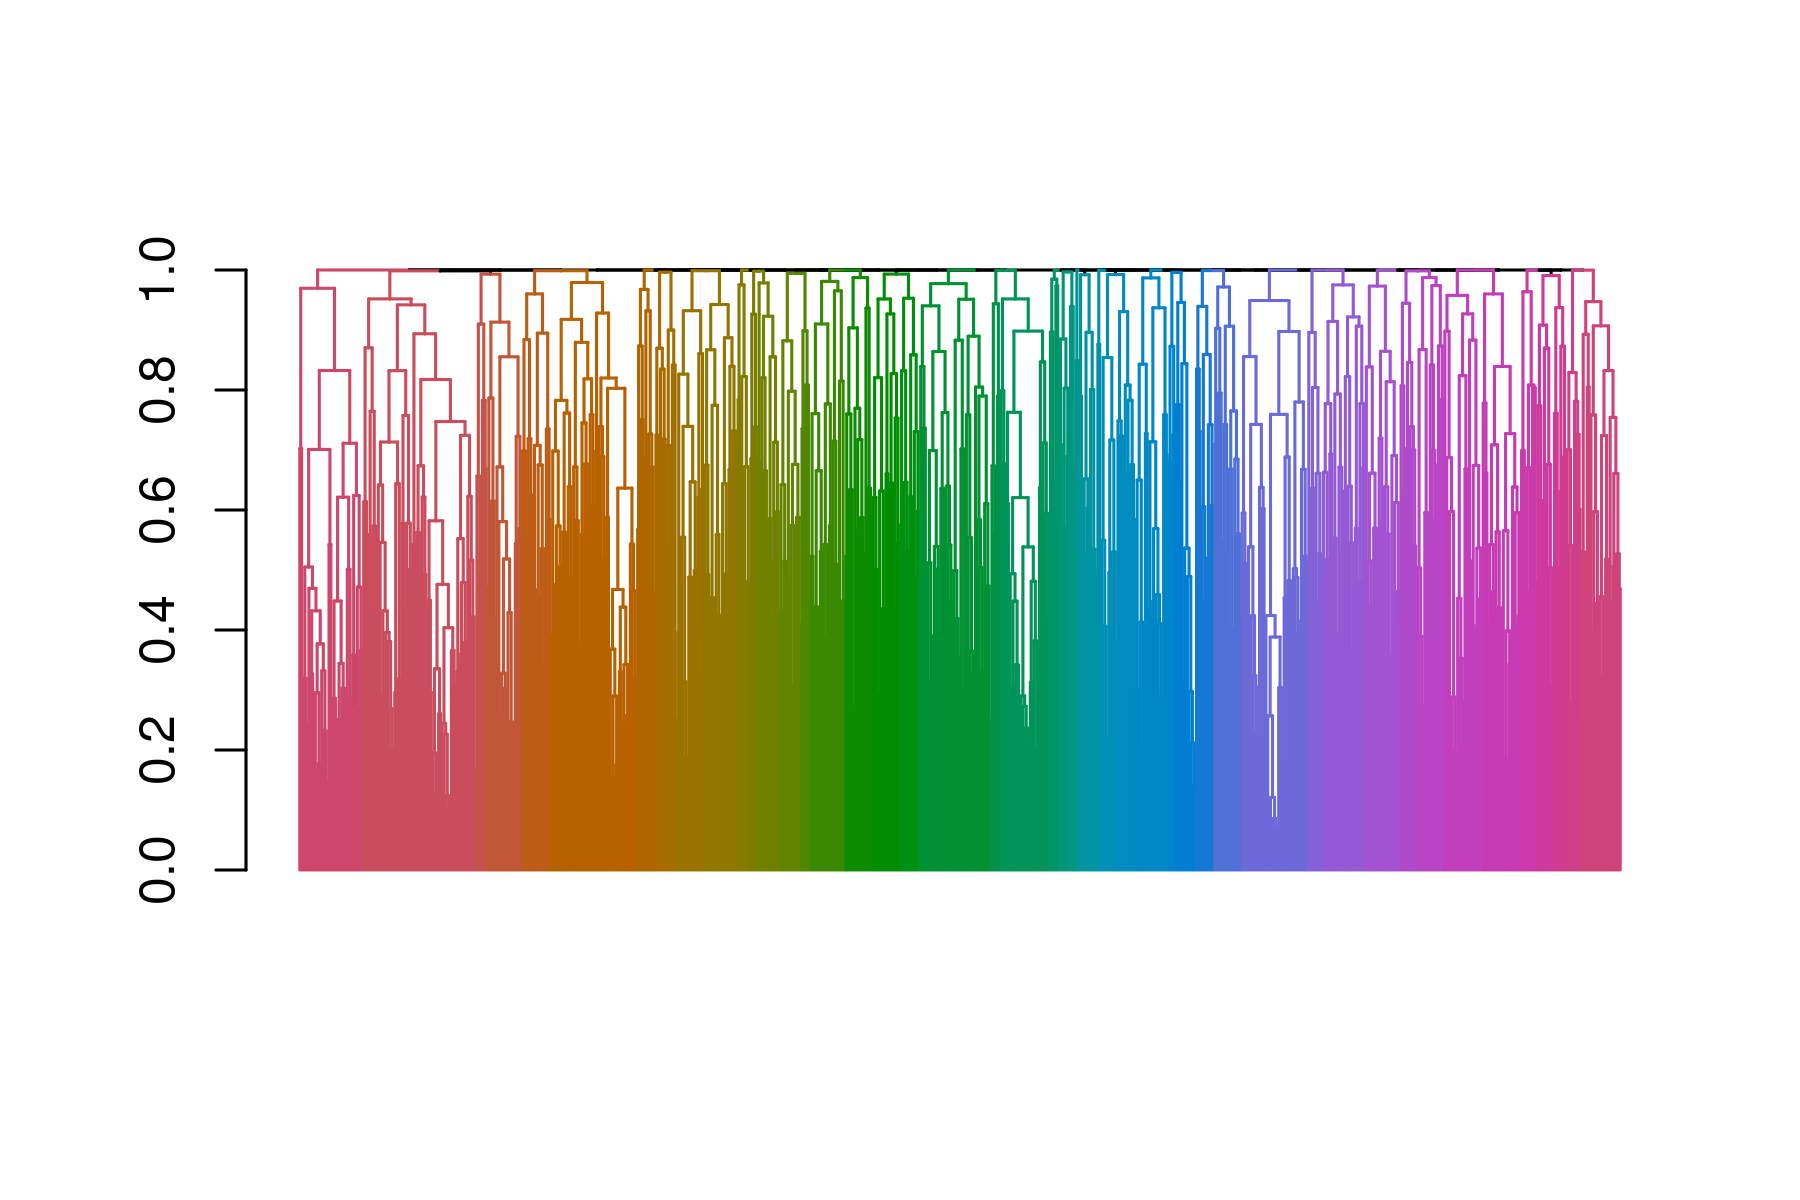

In [162]:
clusters <- cutree(spellman.dend, h=0.99)
plot(color_branches(spellman.dend, h=0.99),leaflab="none")

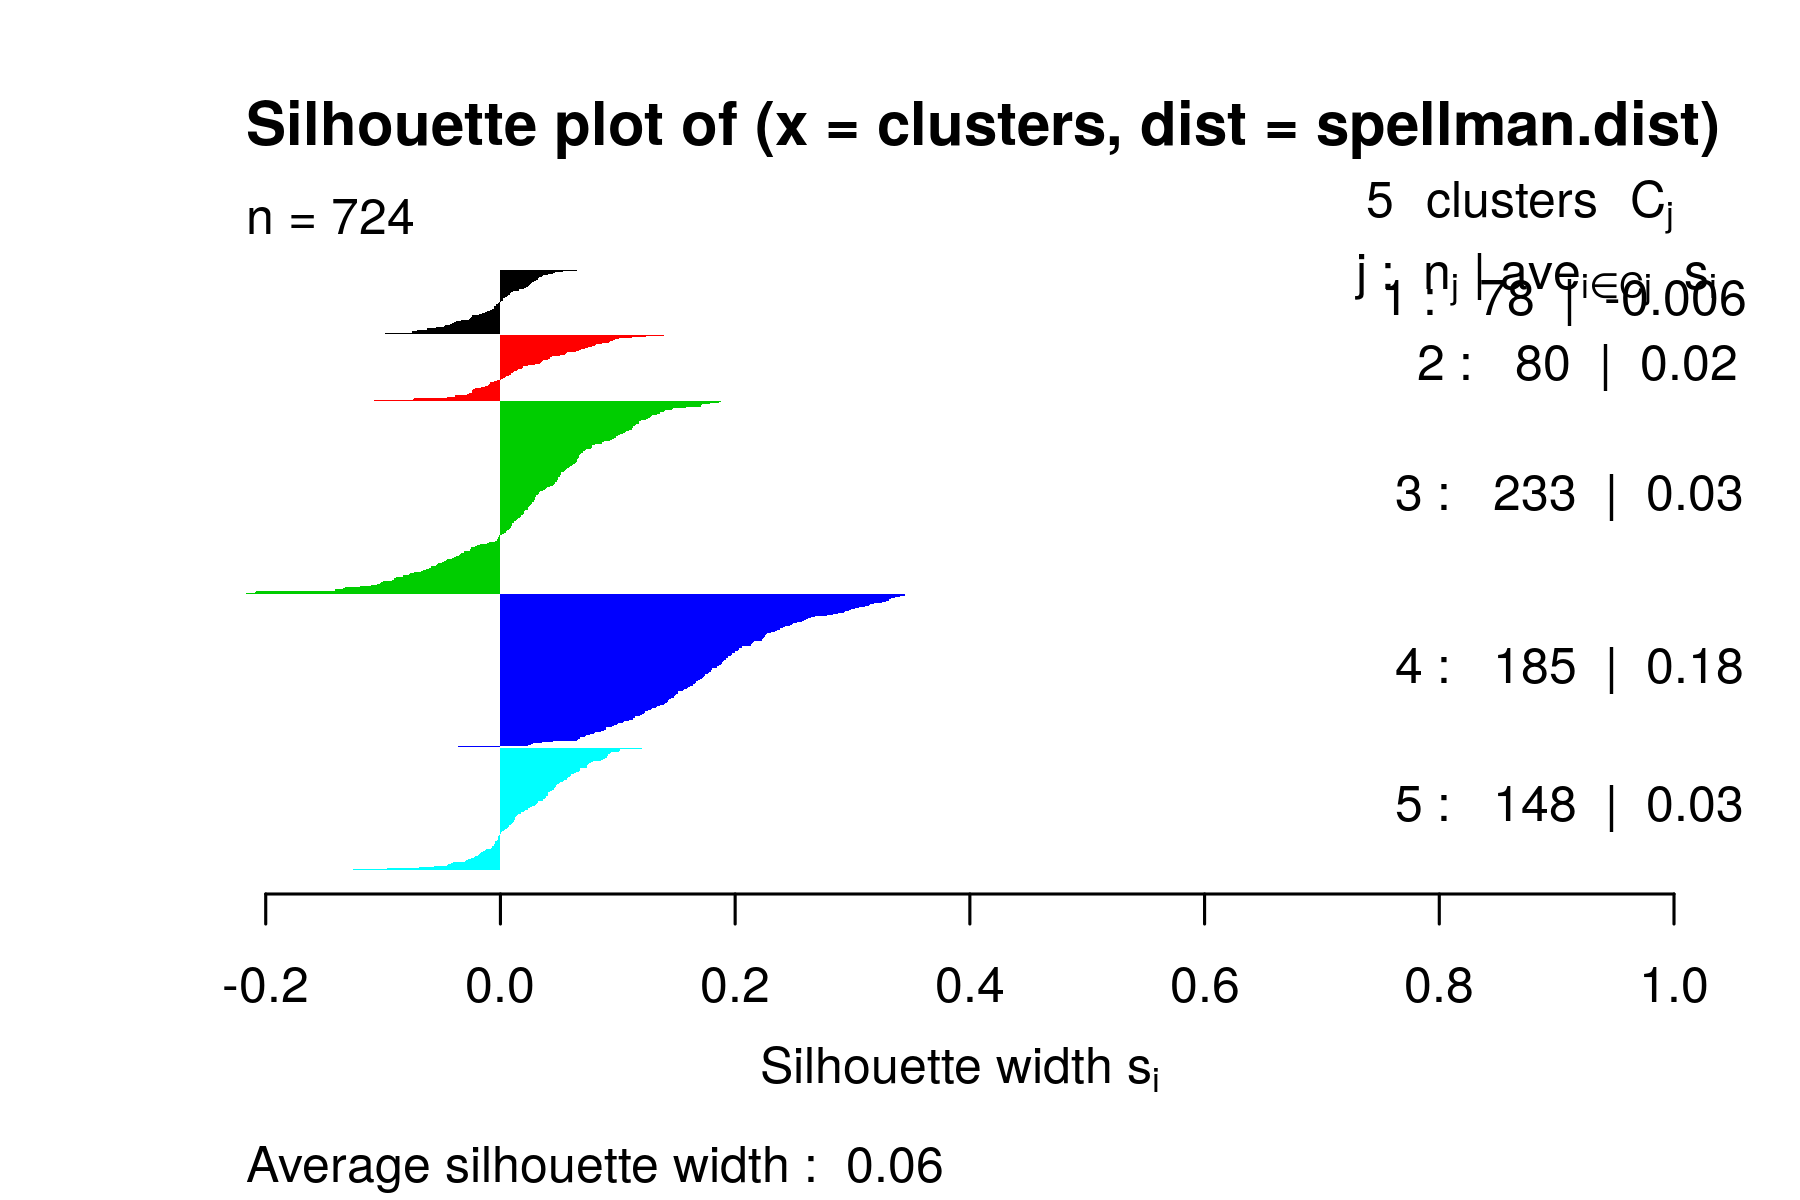

In [160]:
library(cluster)
ss<-silhouette(clusters, spellman.dist)
plot(ss,col=1:max(clusters),border=NA)

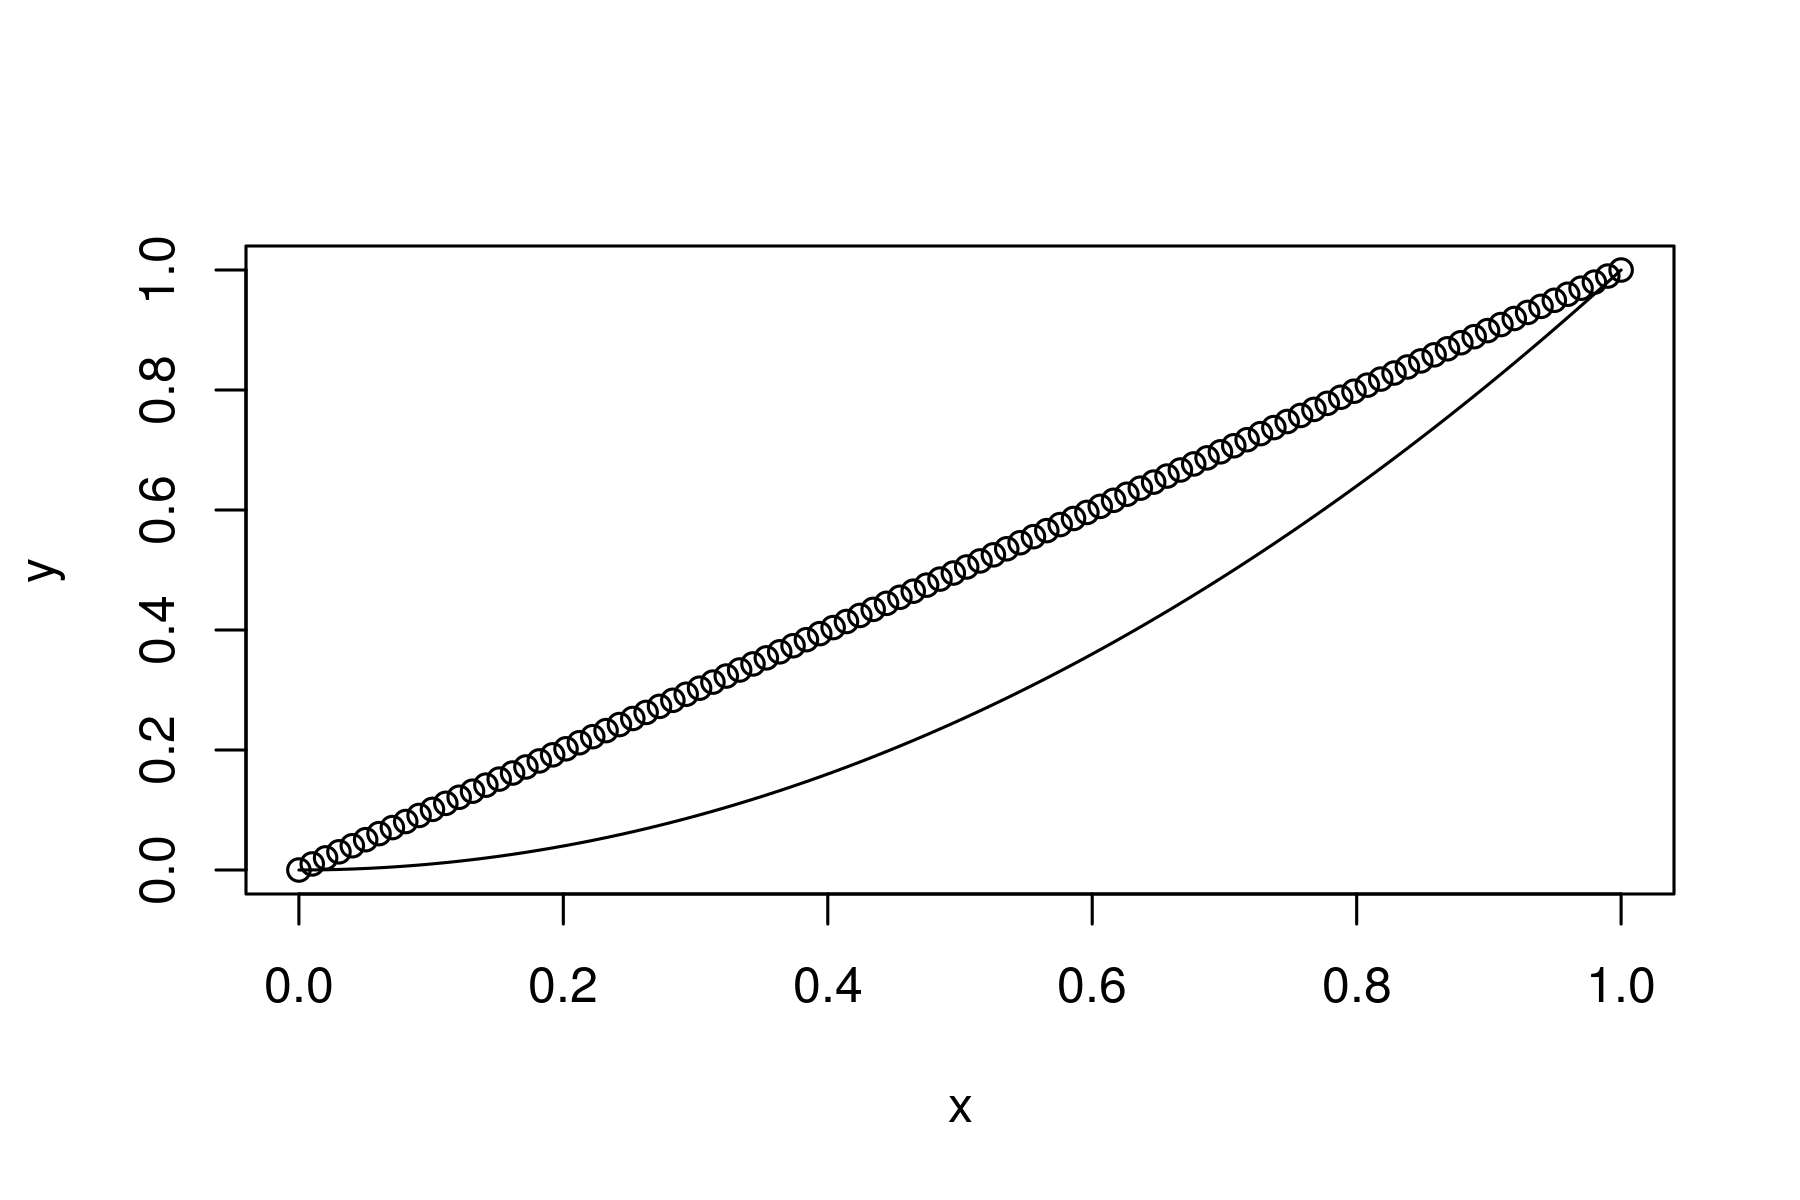

In [158]:
x<-seq(0,1,length.out=100)
y<-abs(x)
y2=x^2 
plot(x,y)
lines(x,y2)

# Cluster por densidad



## Density Based Clustering of Applications with Noise (DBSCAN)

DBSCAN es un algoritmo basado en la proximidad y la densidad de las observaciones para formar grupos. La agrupación DBSCAN puede identificar valores atípicos, observaciones que no pertenecerán a ningún grupo.

En DBSCAN hay 3 tipos de puntos:
 * núcleo: punto que tiene al menos *minPts* puntos a una distancia $\varepsilon$.
 * puntos (densamente-)alcanzables: punto que tiene al menos un núcleo a una distancia $\varepsilon$.
 * ruido:  El resto de puntos

Donde los parámetros $\varepsilon$ y *minPts* son:
  * $\varepsilon$: distancia de corte de un punto desde (punto central, que se analiza a continuación) para que se considere parte de un grupo. Comúnmente conocido como epsilon (abreviado como eps).
  *  *minPts* : número mínimo de puntos necesarios para formar un clúster.

La agrupación DBSCAN se puede resumir en los siguientes pasos:
  * Para cada punto P identifica los N puntos dentro de distancia $\varepsilon$ 
     * si N >= minPts : Etiqueta P como punto de tipo *núcleo*
     * si N < minPts : 
         * Si hay un punto de *núcleo* a una distancia $\varepsilon$, se etiqueta como *punto densamente alcanzable*
         * Si NO hay un punto de *núcleo* a una distancia $\varepsilon$, se etiqueta como *ruido*.
         
   Un cluster estaría formado por todos los puntos de *núcleo* y los puntos *densamente alcanzables* que están densamente conectados por la distancia  $\varepsilon$. 
   Esite una variante DBSCAN* la cual solo considera los puntos de cluster como puntos de *núcleo* el resto son ruido.

![](img/dbscan_1.png)
![](img/dbscan_2.png)

###### Ejemplo de clasificación de estrellas sacadas de:
http://burro.astr.cwru.edu/Academics/Astr221/HW/HW5/HW5.html

El dataset contiene 6219 estrellas que muestran la magnitud aparente en el rango visible. El dataset contiene 5 columnas:
* id de la estrella
* Magnitud aparente en el espectro visible
* Color observado en el rango B-V (Blue-Visible)
* Paralaje de la estrella observada (en segundo de arco)
* Incertidumbre del paralaje (en miliarcsec)

![](https://upload.wikimedia.org/wikipedia/commons/thumb/0/04/ParsecDef.svg/240px-ParsecDef.svg.png)

Podemos calcular la distancia a la estrella en Parsecs en función de los segundos de arco:
\\[
\Delta=\frac{1}{\pi}
\\]
1 pársec = 206265 ua = 3,2616 años luz 

La magnitud absoluta de una estrella está relacionada con la magnitud aparente por:
\\[
Mv = mv– 5·log_{10} \Delta +5
\\]

Si pintamos la magnitud absoluta de una estrella en función de su temperatura (color) obtenemos lo que se llama un diagrama Hertzsprung–Russell, a veces abreviado como diagrama H-R.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/6/6b/HRDiagram.png/421px-HRDiagram.png)

In [163]:
hr=read.csv("data/yaletrigplx.dat",col.names = c("id","mv","BV","parallax","error"),sep="" )
head(hr)

id mv   BV   parallax error
1 3  8.45 1.05 0.0717   113  
2 4  9.01 1.44 0.0886    23  
3 6  8.60 0.94 0.0147    55  
4 7  5.96 0.67 0.0455    50  
5 7  6.43 0.64 0.0455    50  
6 8  5.70 0.52 0.0495    97

In [164]:
hr$parsec=1/hr$parallax
hr$Mv<-hr$mv-5*log10(hr$parsec)+5

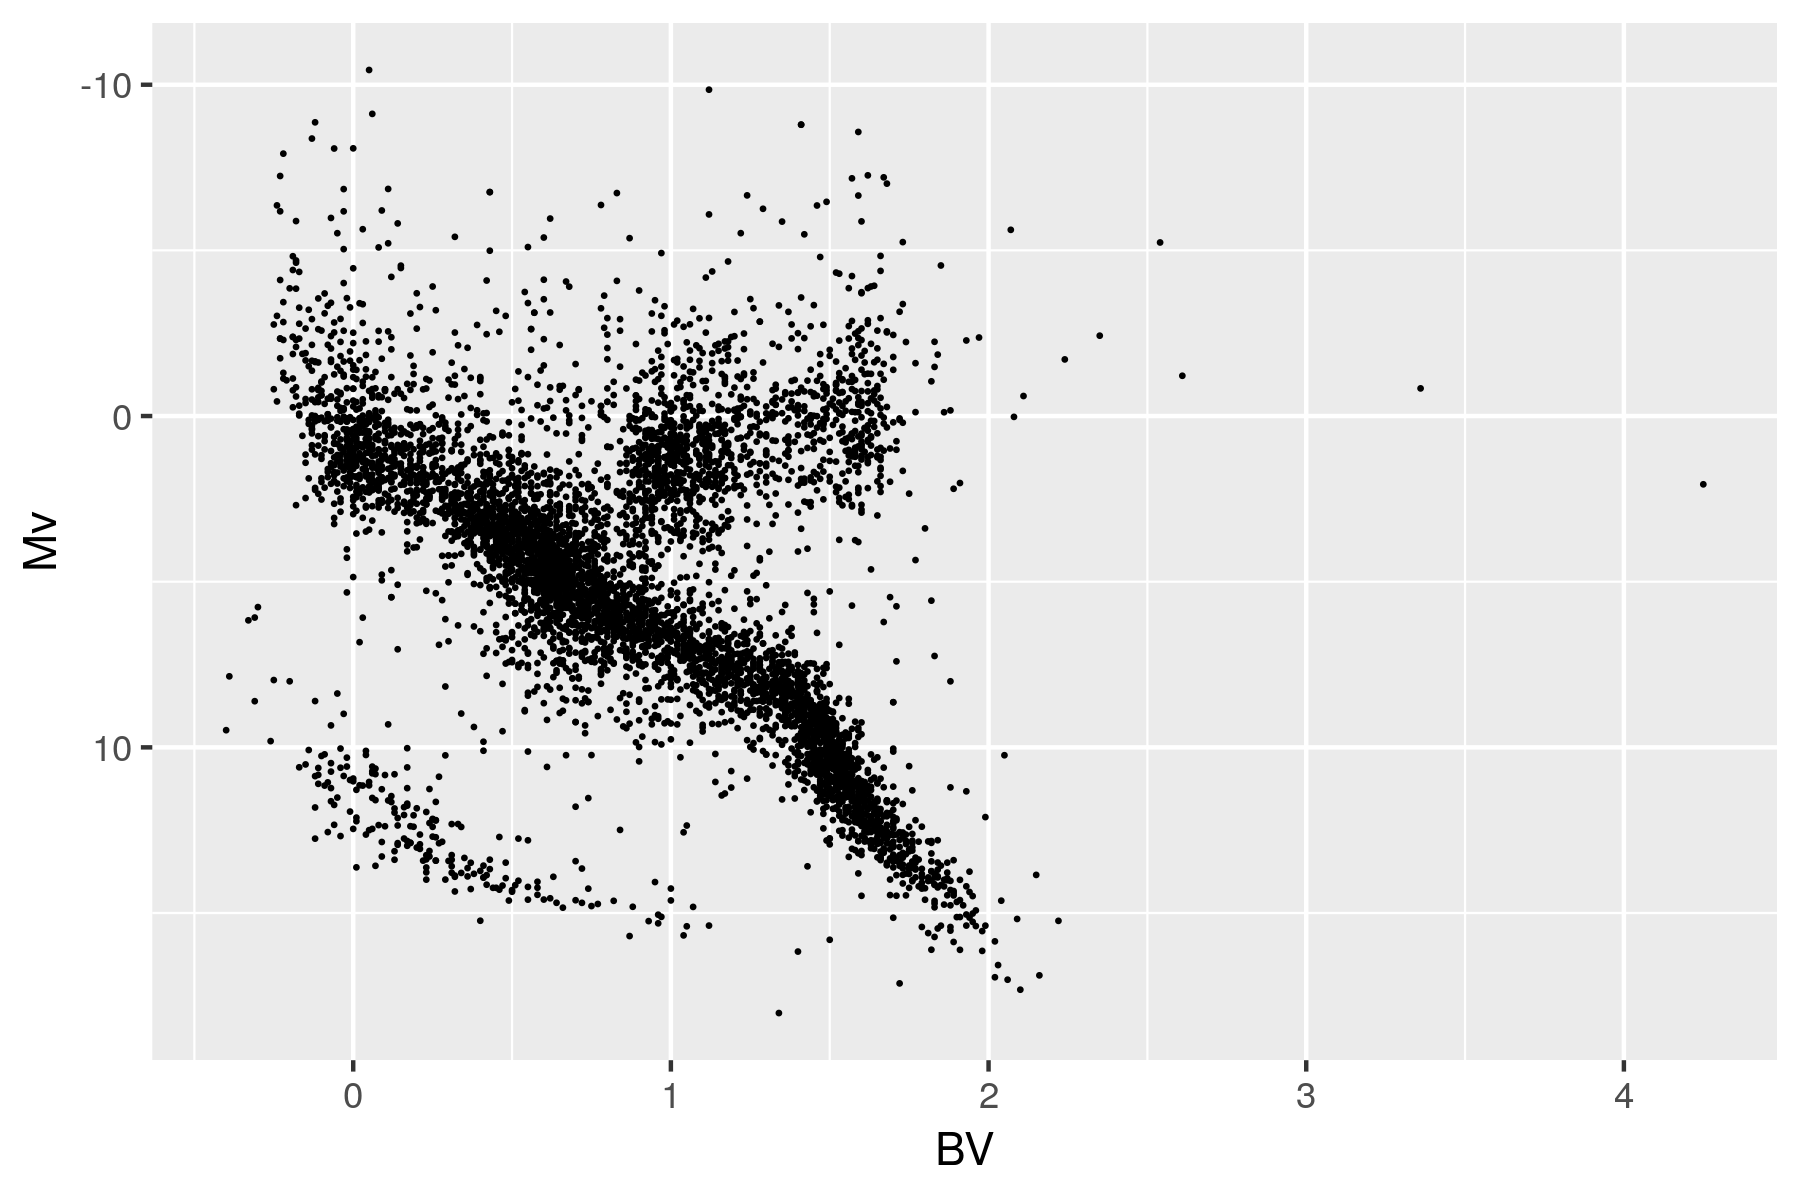

In [165]:
library(ggplot2)
options(repr.plot.height=4,repr.plot.width=6)

ggplot(hr,aes(y=Mv,x=BV))+geom_point(size=0.1)+scale_y_reverse()

In [166]:
library(dbscan)

In [167]:
hr$norm_Mv=(hr$Mv-mean(hr$Mv))/sd(hr$Mv)
hr$norm_BV=(hr$BV-mean(hr$BV))/sd(hr$BV)

DBSCAN clustering for 6219 objects.
Parameters: eps = 0.1, minPts = 15
The clustering contains 4 cluster(s) and 999 noise points.

   0    1    2    3    4 
 999 5180   15   10   15 

Available fields: cluster, eps, minPts

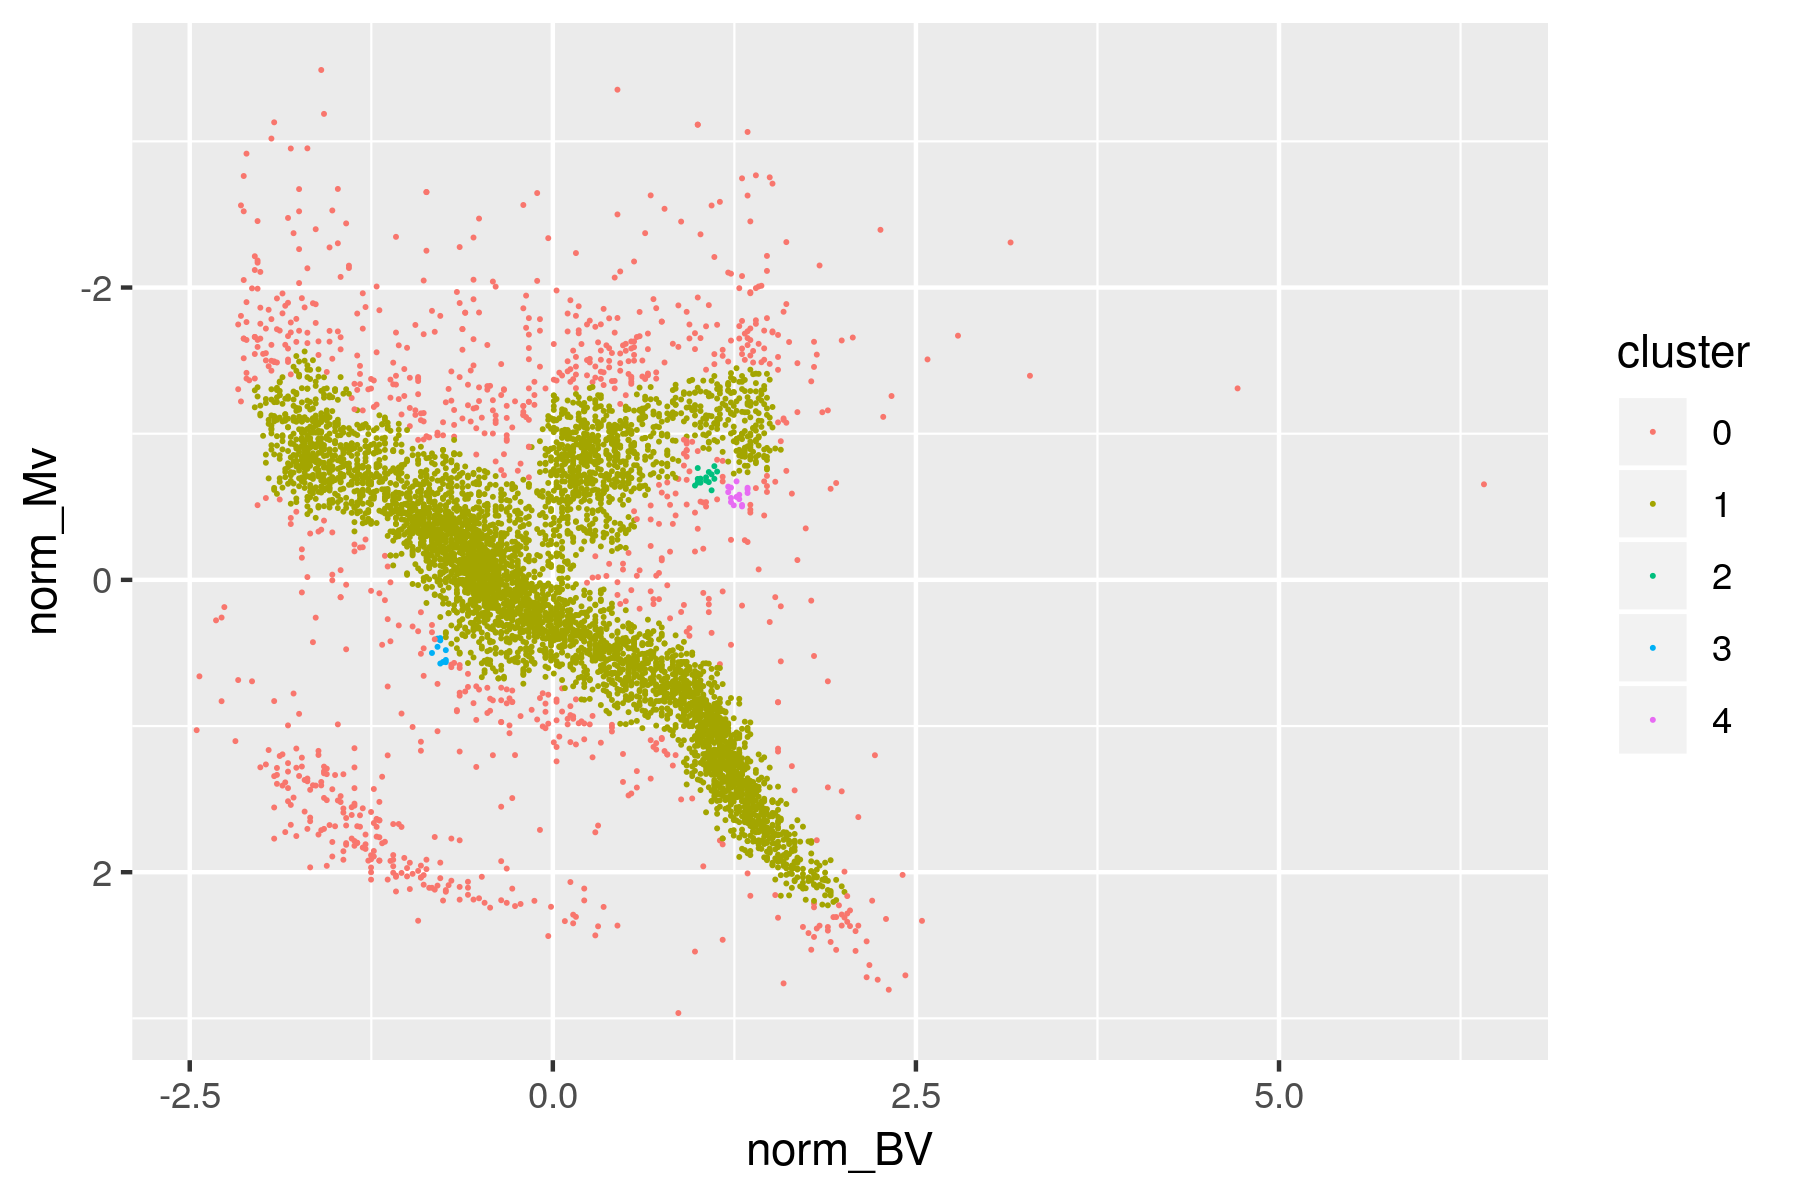

In [178]:
hr_cl<-dbscan(hr[,c("norm_Mv","norm_BV")], minPts = 15,eps=0.1, borderPoints=TRUE)
hr_cl
hr$cluster<-as.factor(hr_cl$cluster)
ggplot(hr,aes(y=norm_Mv,x=norm_BV,color=cluster))+geom_point(size=0.01)+scale_y_reverse()

## Hiercarchical DBSCAN (HDBSCAN)

HDBSCAN esencialmente calcula la jerarquía de todos los clústeres de DBSCAN* para un *minPts* dato, y luego utiliza una estabilidad basada método de extracción para encontrar cortes óptimos en la jerarquía, por lo tanto produciendo una solución plana.
      
Hay que tener en cuenta que *minPts* no solo actúa como un tamaño mínimo de clúster para detectar, pero también como un factor de suavizado de las estimaciones de densidad calculado implícitamente desde HDBSCAN.

In [179]:
cl <- hdbscan(hr[,c("norm_Mv","norm_BV")], minPts = 30,gen_simplified_tree=TRUE,gen_hdbscan_tree=TRUE)
cl

HDBSCAN clustering for 6219 objects.
Parameters: minPts = 30
The clustering contains 2 cluster(s) and 163 noise points.

   0    1    2 
 163  170 5886 

Available fields: cluster, minPts, cluster_scores, membership_prob,
                  outlier_scores, hc, hdbscan_tree, simplified_tree

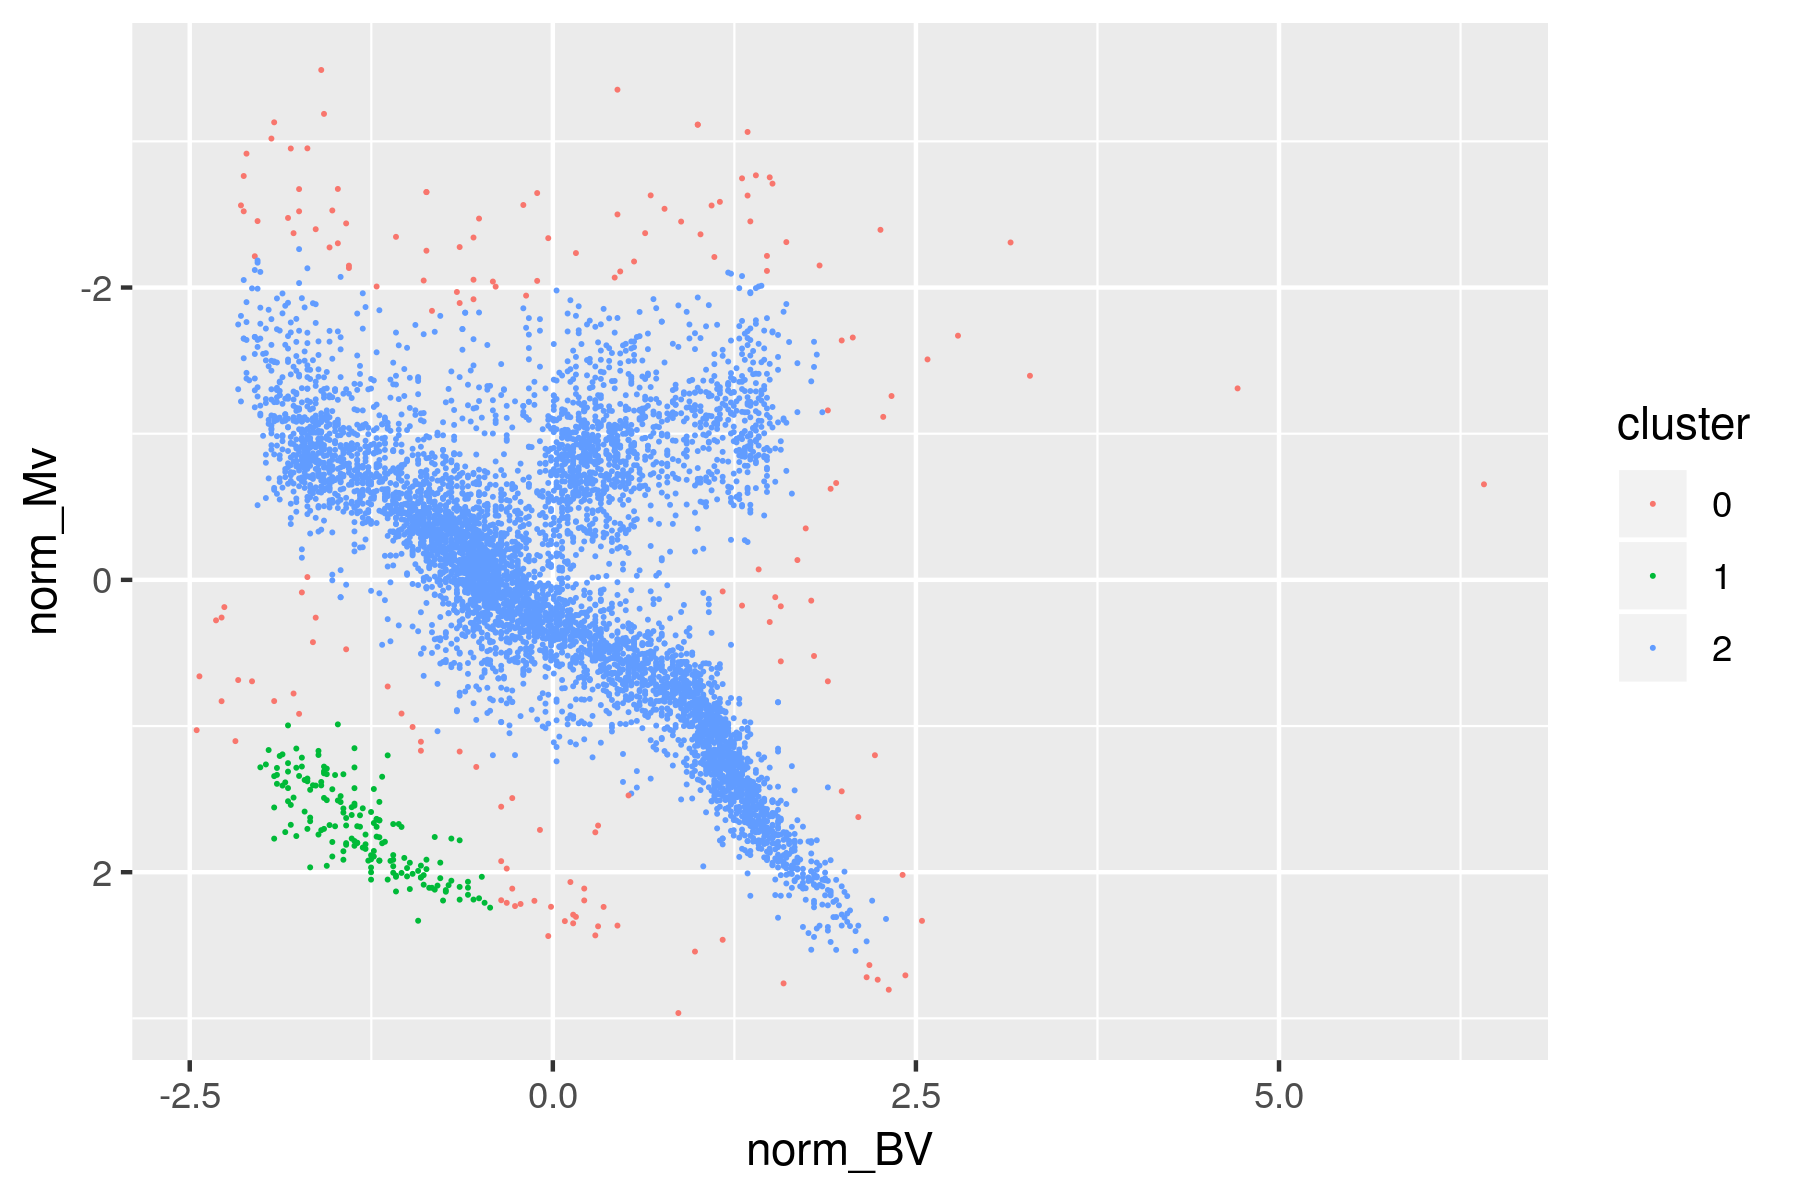

In [182]:
hr$cluster<-as.factor(cl$cluster)
ggplot(hr,aes(y=norm_Mv,x=norm_BV,color=cluster))+geom_point(size=0.01)+scale_y_reverse()

In [183]:
plot(cl$hc)

In [184]:
library("ggdendro")
hcd <- as.dendrogram(cl$hc)
ggdendrogram(cut(hcd, h = 1)$upper)


Attaching package: ‘ggdendro’


The following object is masked from ‘package:dendextend’:

    theme_dendro




In [185]:
hcd <- as.dendrogram(cl$hdbscan_tree)
ggdendrogram(cut(hcd, h = 1)$upper)

In [186]:
## cutree doesn't distinguish noise as 0, so we make a new method to do it manually 
cut_tree <- function(hcl, eps, core_dist){
  cuts <- cutree(hcl, h=eps)
  cuts[which(core_dist > eps)] <- 0 # Use core distance to distinguish noise
  cuts
}

In [187]:
core_dist <- kNNdist(hr[,c("norm_Mv","norm_BV")], k=cl$minPts-1)
kNNdistplot(hr[,c("norm_Mv","norm_BV")], k=cl$minPts-1)

In [188]:
df_clusters<-data.frame(epsilon=cl$hc$height[seq(from=1,to=length(cl$hc$height),length.out = 1000)],
                        num_clusters=NA)
df_clusters$num_clusters<-apply(df_clusters,1,function(x) length(unique(cut_tree(cl$hc, x[1], core_dist))))

In [189]:
ggplot(df_clusters,aes(x=epsilon,y=num_clusters))+geom_line()+scale_x_log10()+theme_linedraw()

In [190]:
head(df_clusters[df_clusters$epsilon>0.1 & df_clusters$epsilon<0.2 & df_clusters$num_cluster>5,])

epsilon   num_clusters
654 0.1156915 6           
655 0.1158819 6           
656 0.1160992 6           
657 0.1162997 6

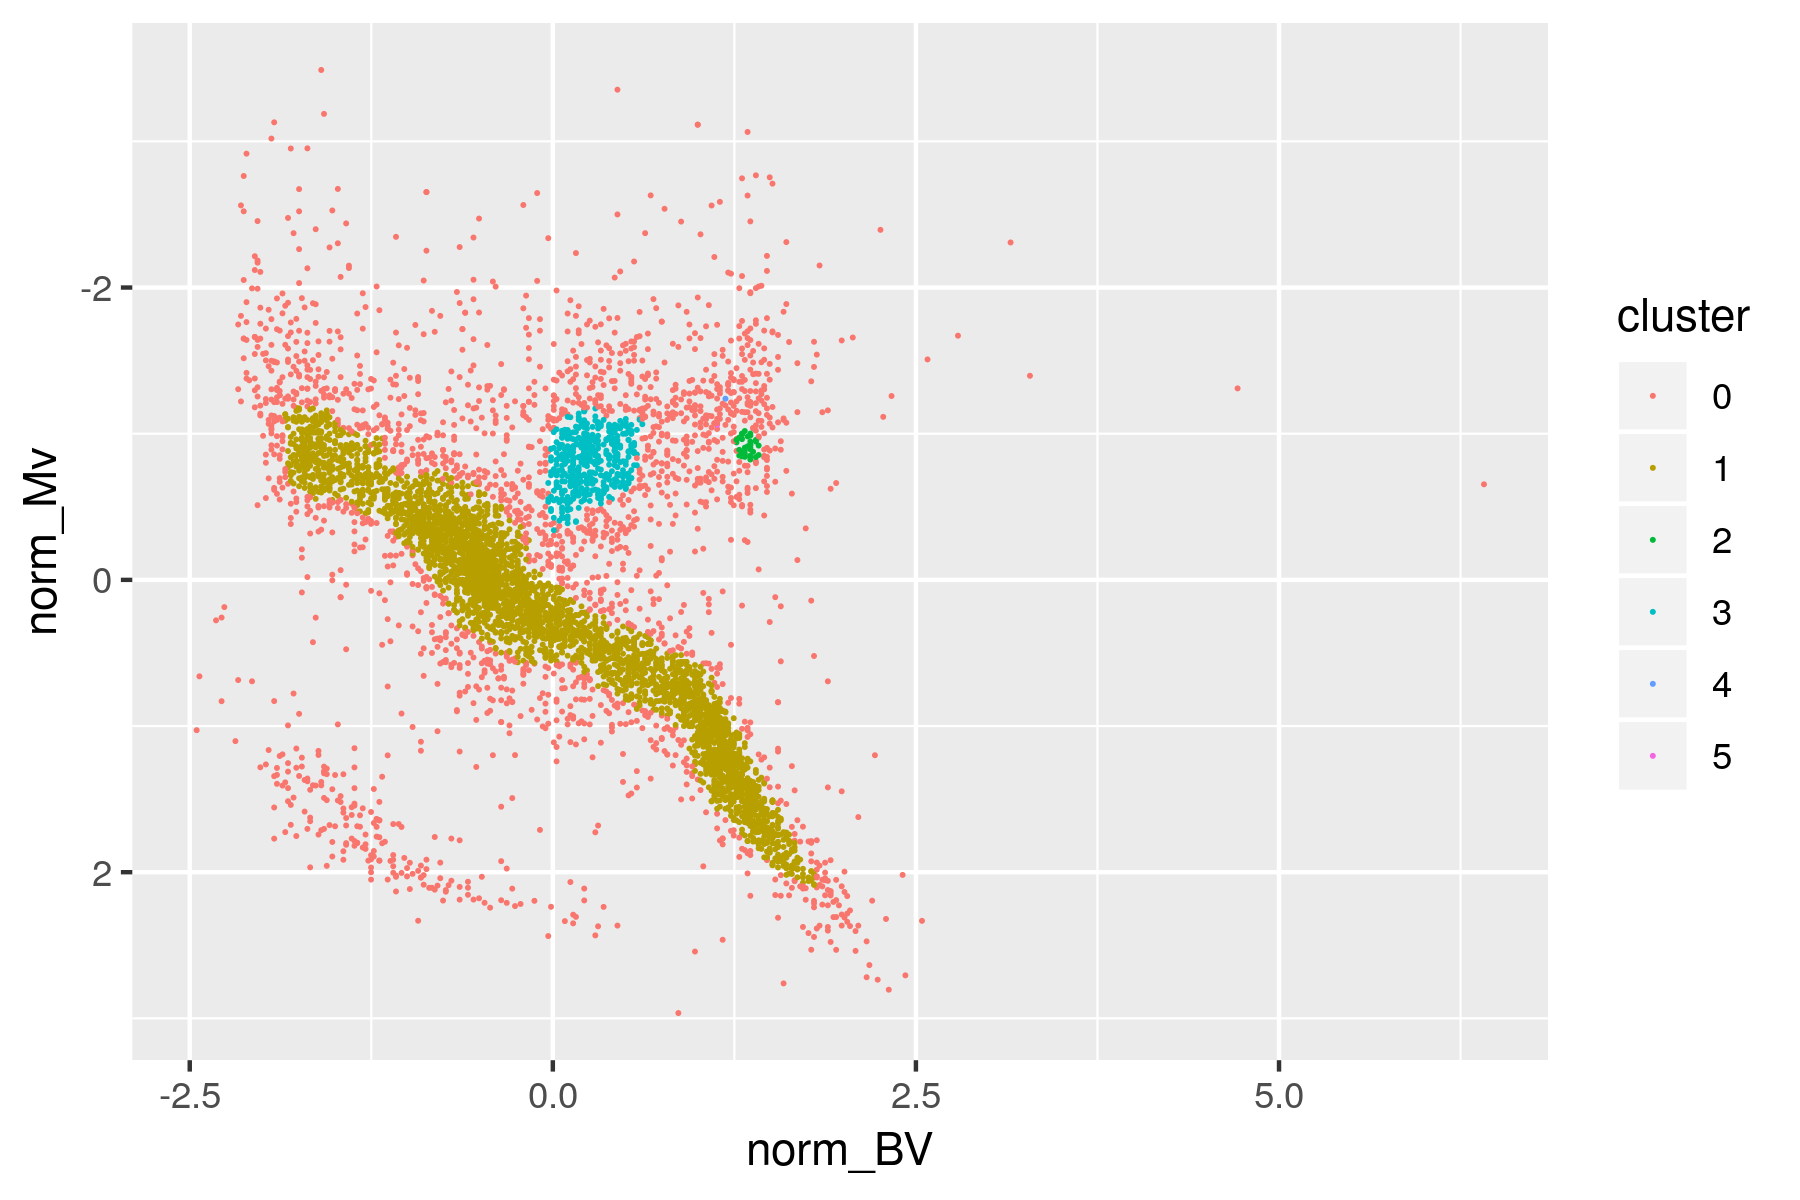

In [192]:
eps_value=0.1158819
cl_dbscan<-dbscan(hr[,c("norm_Mv","norm_BV")], minPts = cl$minPts,eps=eps_value, borderPoints=FALSE)
hr$cluster<-as.factor(cl_dbscan$cluster)
ggplot(hr,aes(y=norm_Mv,x=norm_BV,color=cluster))+geom_point(size=0.01)+scale_y_reverse()

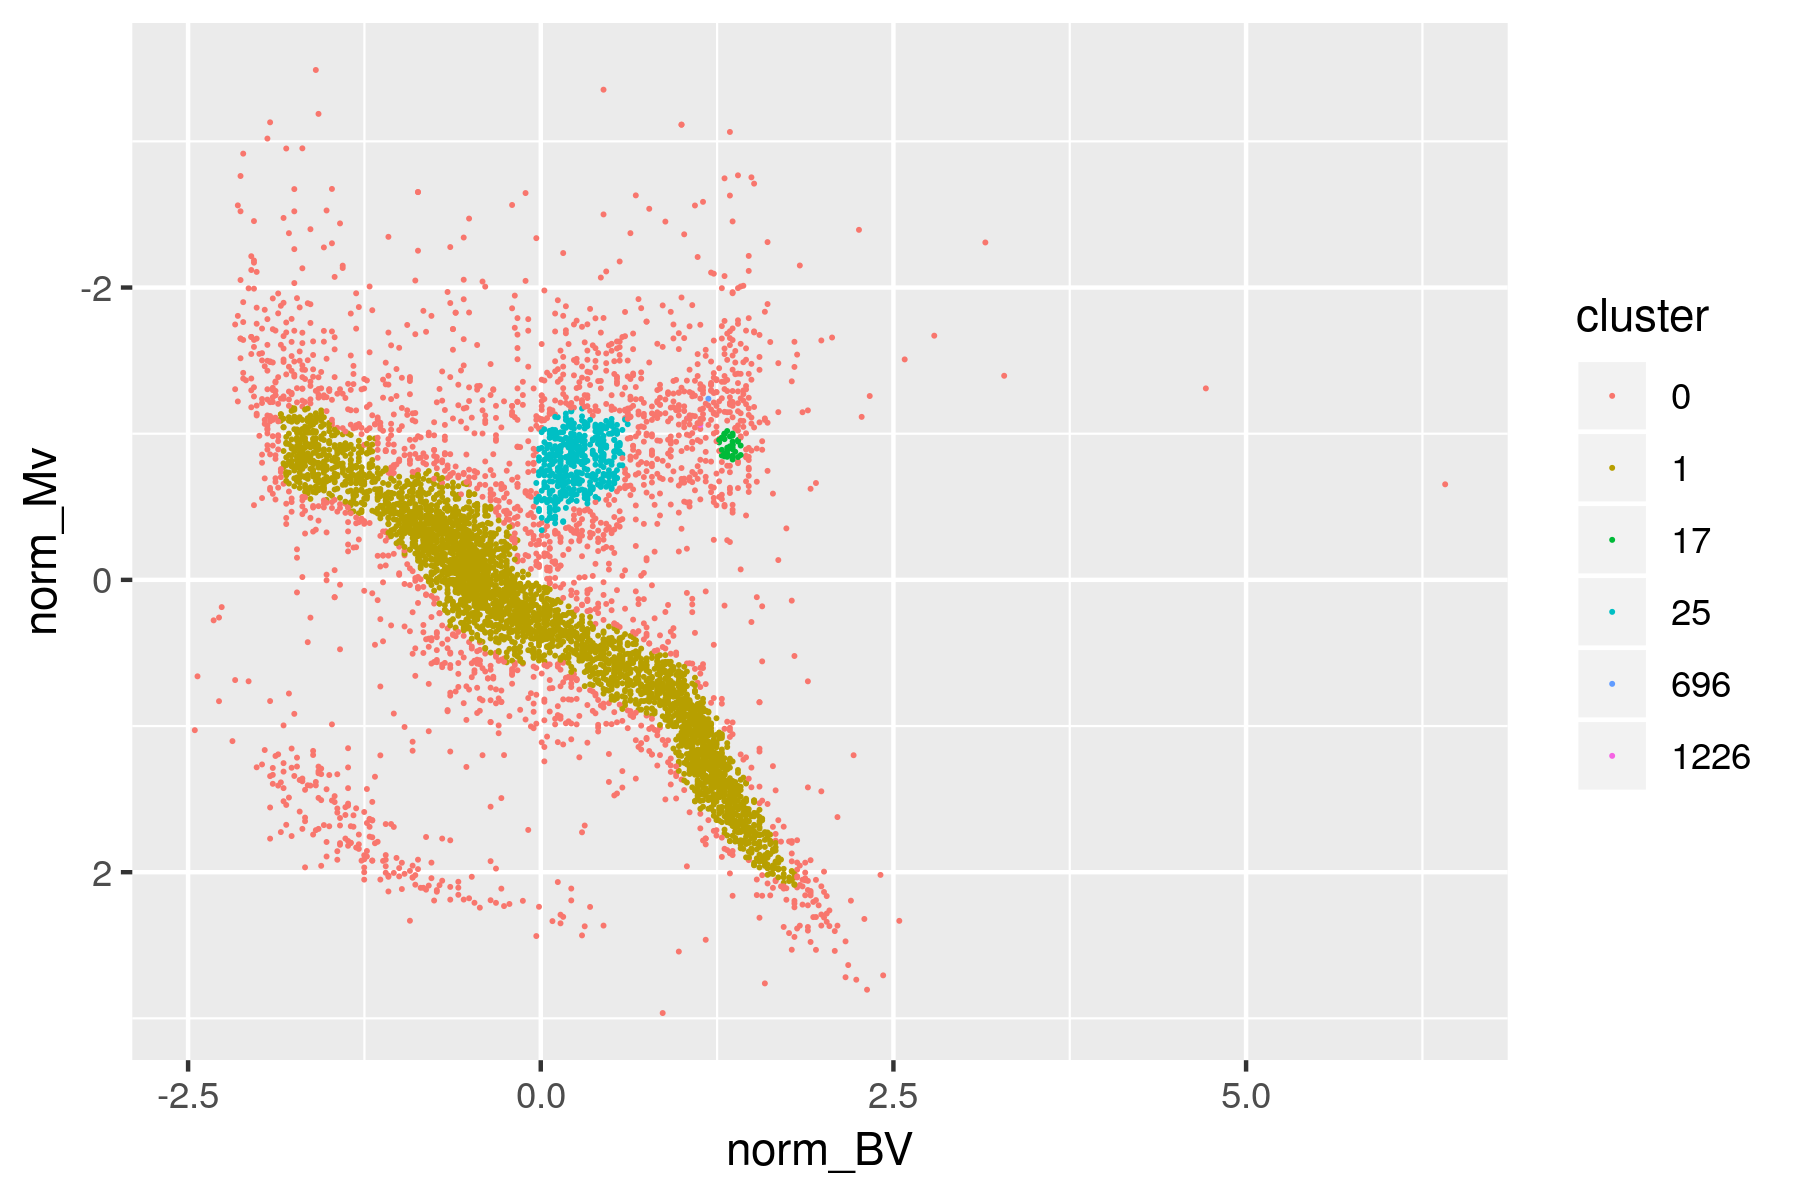

In [193]:
hr$cluster<-as.factor(cut_tree(cl$hc, eps_value, core_dist))
ggplot(hr,aes(y=norm_Mv,x=norm_BV,color=cluster))+geom_point(size=0.01)+scale_y_reverse()

In [ ]:
str(cl$hc)

In [194]:
plot(cl)

Para calcular la estabilidad definimos $\lambda=\frac{1}{\varepsilon}$. Suponiendo que vamos probando con valores $\varepsilon$ decrecientes, lo que equivale a $\lambda$ creciente. Para un cluster podemos definir los valores $\lambda_{birth}$ y $\lambda_{death}$ como el valor de $\lambda$ en el cual el cluster aparece (como división de un cluster mayor) y desaparece al dividirse en clusters más pequeños.

Podemos definir $\lambda_p$ como el valor en el intervalo $[\lambda_{birth},\lambda_{death}]$ en el cual el punto $p$ se escapa del cluster estudiado. 

Se define la estabilidad de un cluster como:
\\[
\sum_p\in{cluster} (\lambda_p - \lambda_{birth})
\\]

Finalmente se hace un recorrido de abajo a arriba del arbol. Empezando por las hojas calculamos la estabilidad de cada uno de los clusters que van saliendo a medida que subimos (disminuimos $\lambda$):

* Si estabilidad cluster >= suma estabilidad hijos : Dejamos la estabilidad del cluster como está
* Si estabilidad cluster <  suma estabilidad hijos : Definimos la estabilid del cluster como la suma de estabilidad de los hijos.

En estos diagramas se ve mejor. La anchura representa el número de puntos que hay en cada cluster en cada momento para un $\varepsilon$ dado. El área representa su estabilidad. El cluster óptimo que devuelve HDBSCAN es aquellos cuyos clusters tengan un mayor area.

En esos clusters de mayor area, se normaliza el valor $\lambda_p$ entre [0,1] para ver el grado de afinidad del punto $p$ a su cluster. Ese valor se almacena en *membership_prob*.

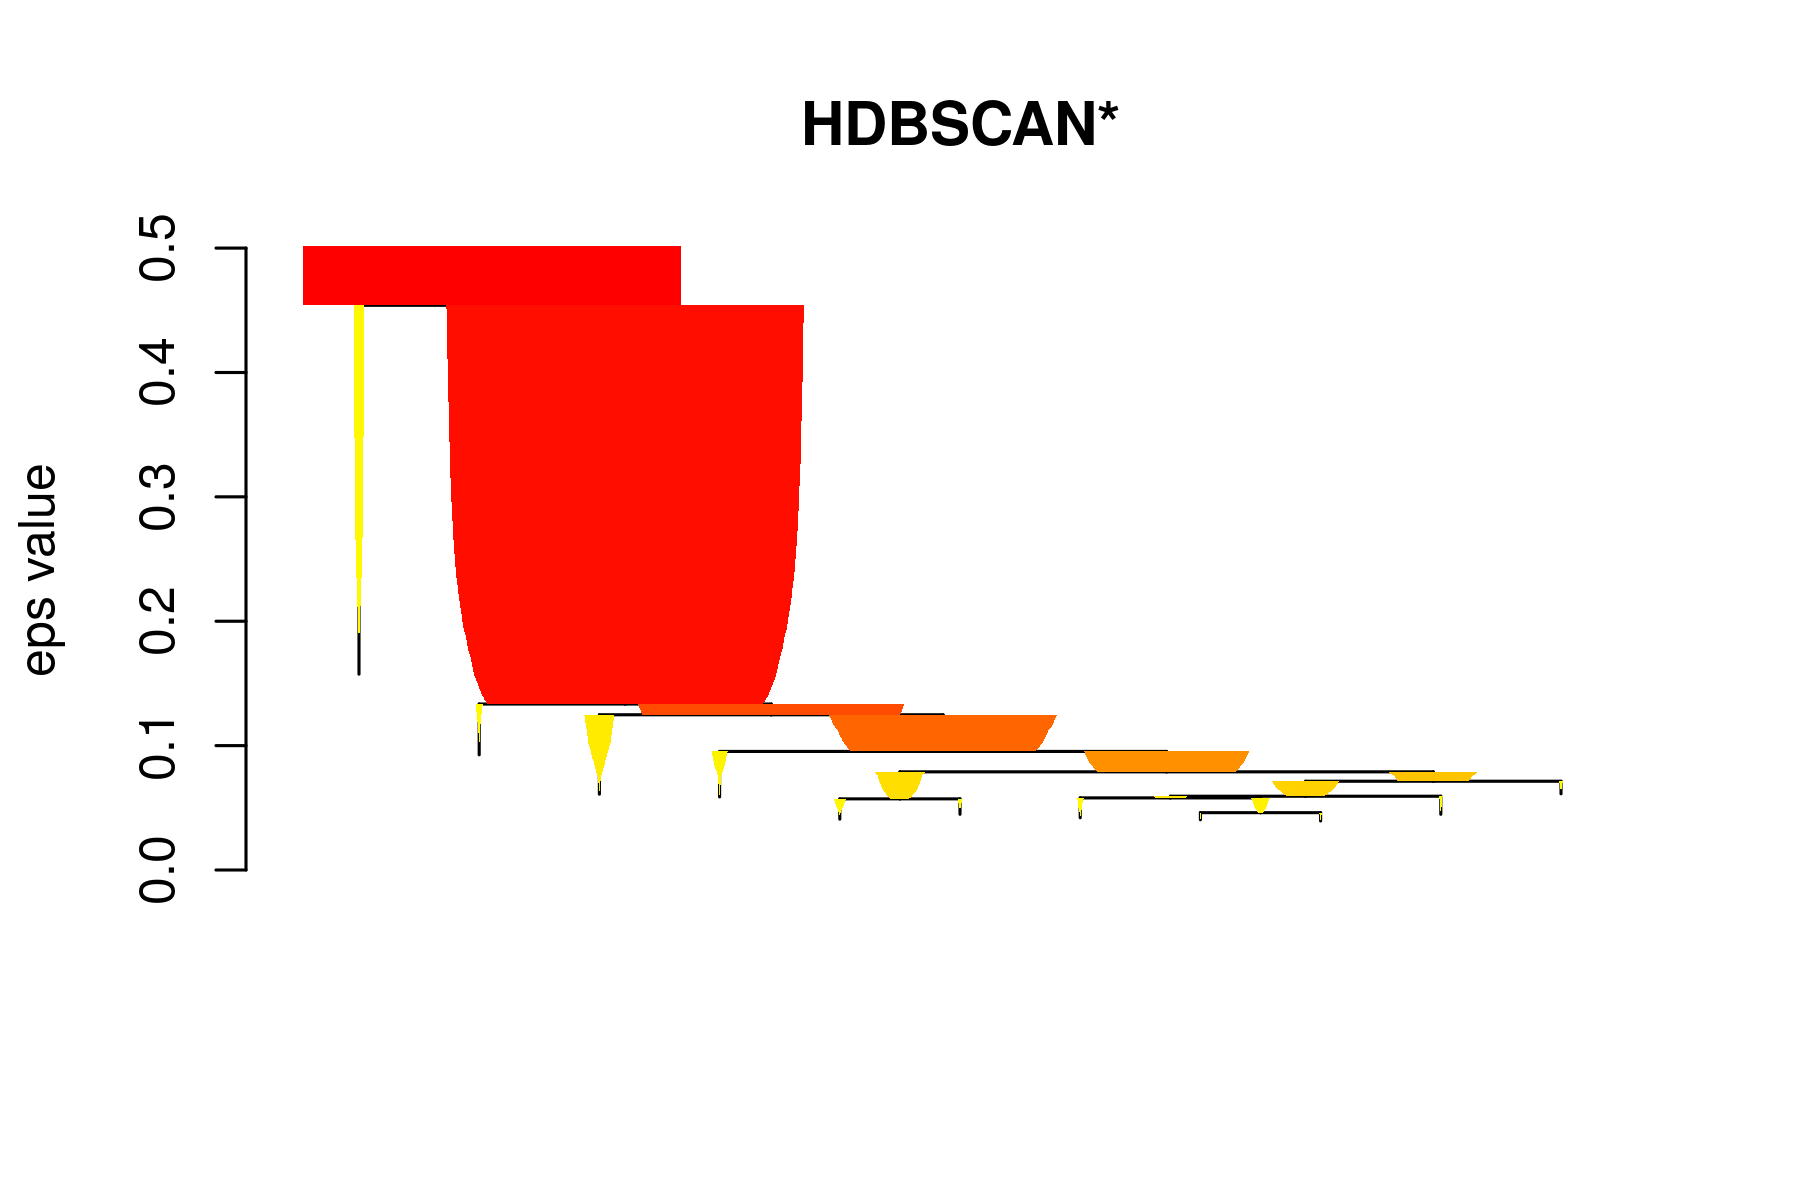

In [195]:
plot(cl,  scale=3, show_flat = F)

In [196]:
print(cl$cluster_scores)

         1          2 
  332.7035 28251.5587 


In [197]:
hr$cluster<-as.factor(cl$cluster)
hr$membership_prob <- cl$membership_prob
ggplot(hr,aes(y=norm_Mv,x=norm_BV,color=cluster,alpha=membership_prob))+geom_point(size=0.01)+scale_y_reverse()

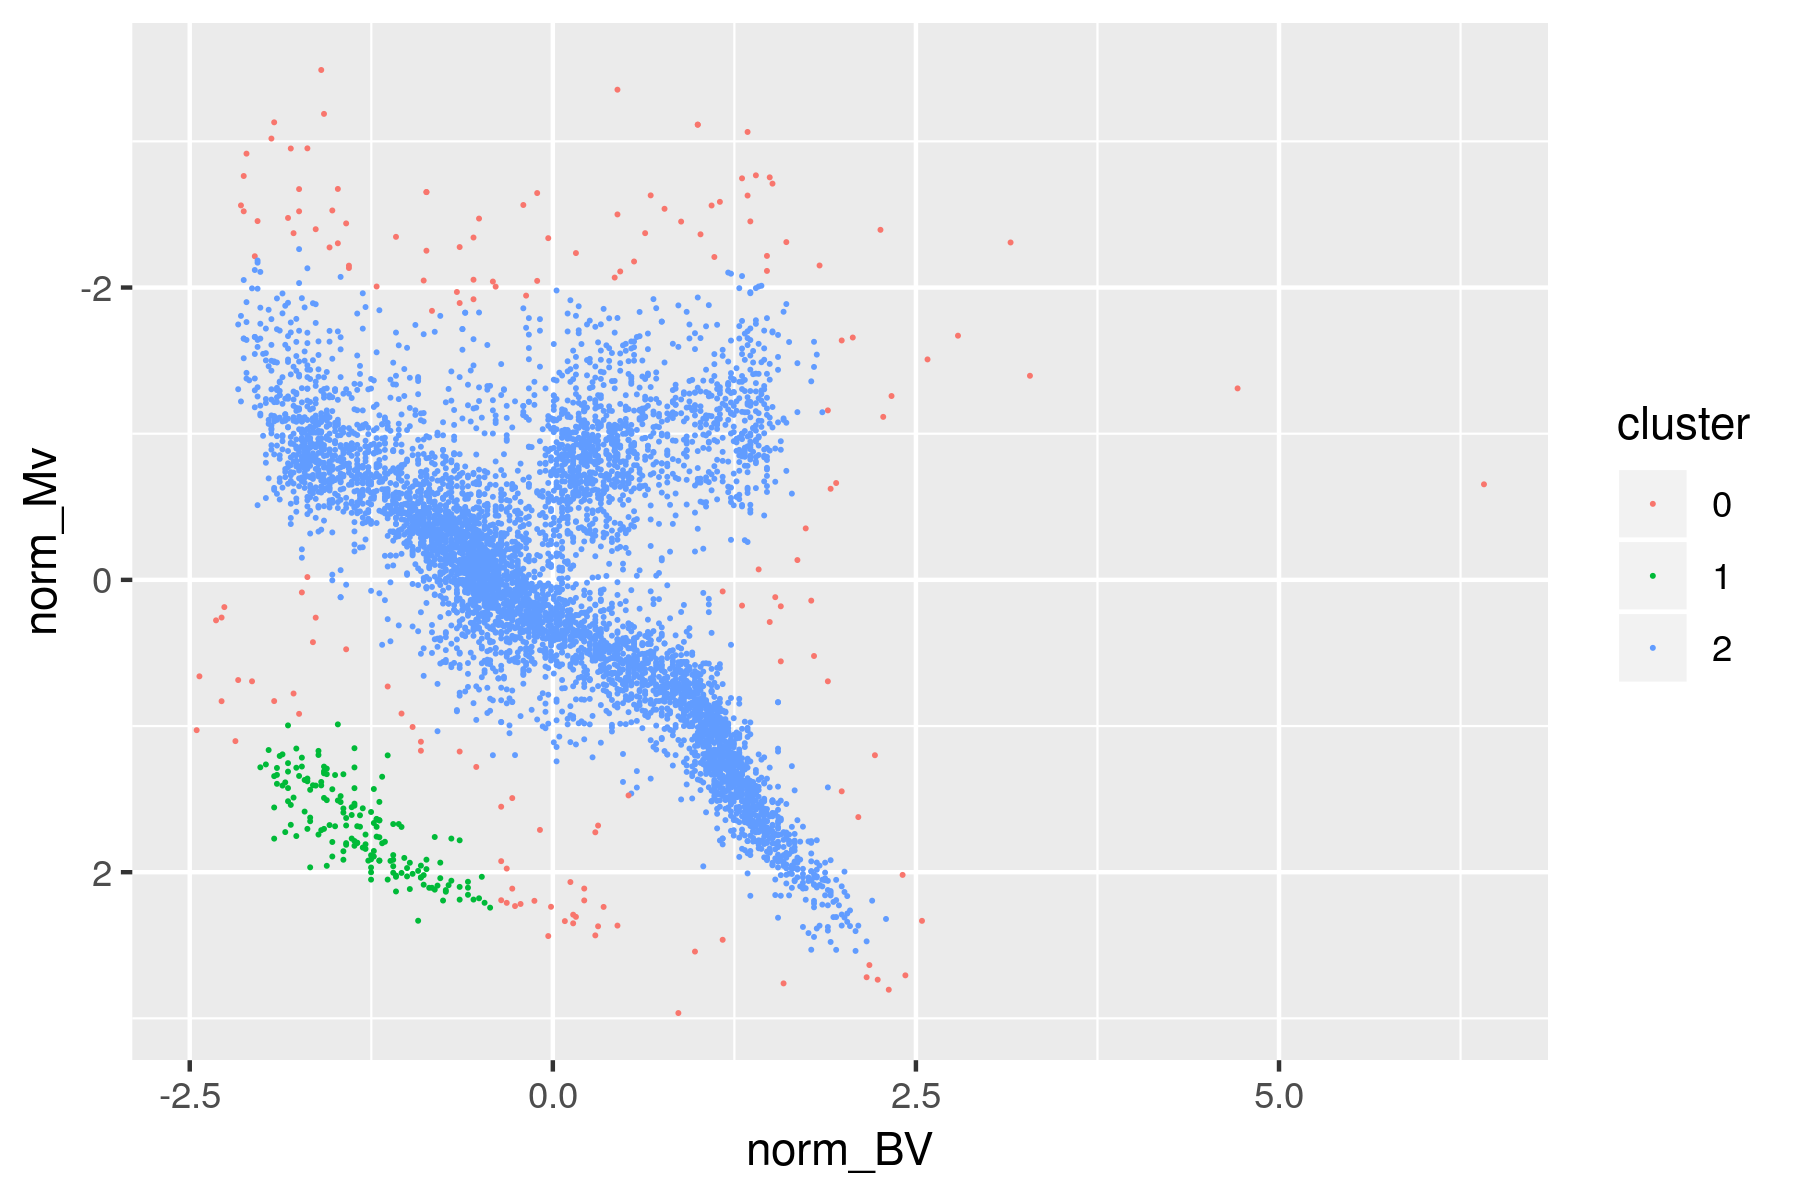

In [198]:
ggplot(hr,aes(y=norm_Mv,x=norm_BV,color=cluster))+geom_point(size=0.01)+scale_y_reverse()